In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats

end = datetime.now()
start = end - timedelta(365 * 5)

In [2]:
super_df = pd.read_excel("C:/Users/User/Desktop/PropHero Project/1.super_df.xlsx", index_col=[0,1,2,3])

In [3]:
super_df

Price_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                  
2005-01-01 Andalucía                Almería       Abrucena                          842.42   
                                                  Albox                            1265.81   
                                                  Albánchez                         942.67   
                                                  Alhama de Almería                1130.17   
                                                  Almería                              NaN   
...                                                                                    ...   
2023-10-01 Región de Murcia         Murcia        Totana                           1000.00   
                                                  Unión (La)                        933.33   
                                                  Villanueva del Río Segura         852.62   
                                                  Yecla                             743.36   
                                                  Águilas                          1237.50   

                                                                             1y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                      
2005-01-01 Andalucía                Almería       Abrucena                                 NaN   
                                                  Albox                                    NaN   
                                                  Albánchez                                NaN   
                                                  Alhama de Almería                        NaN   
                                                  Almería                                  NaN   
...                                                                                        ...   
2023-10-01 Región de Murcia         Murcia        Totana                              0.014816   
                                                  Unión (La)                          0.062826   
                                                  Villanueva del Río Segura           0.070650   
                                                  Yecla                               0.029435   
                                                  Águilas                             0.060711   

                                                                             5y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                      
2005-01-01 Andalucía                Almería       Abrucena                                 NaN   
                                                  Albox                                    NaN   
                                                  Albánchez                                NaN   
                                                  Alhama de Almería                        NaN   
                                                  Almería                                  NaN   
...                                                                                        ...   
2023-10-01 Región de Murcia         Murcia        Totana                              0.010110   
                                                  Unión (La)                          0.015957   
                                                  Villanueva del Río Segura          -0.047050   
                                                  Yecla                               0.048286   
                                                  Águilas                             0.034494   

                                                                             Rent_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                 
2005-01-01 Andalucía                Almería       Abrucena                            NaN   
                         

In [4]:
# Step 1: Group by 'Town_name' (index level 3) and count non-null values in 'Price_per_sqm' and 'Rent_per_sqm'
town_counts = super_df.groupby(level=3)[['Price_per_sqm', 'Rent_per_sqm']].count()

# Step 2: Filter to only keep towns with at least 25 non-null values in both 'Price_per_sqm' and 'Rent_per_sqm'
valid_towns = town_counts[(town_counts['Price_per_sqm'] >= 40) & (town_counts['Rent_per_sqm'] >= 40)].index

# Step 3: Filter the original DataFrame to only include the valid towns
super_df = super_df[super_df.index.get_level_values(3).isin(valid_towns)]

In [5]:
# Step 1: Group by 'Town_name' (index level 3) and get the last entry for each town
latest_data = super_df.groupby(level=3).tail(1)  # Get the last row for each 'Town_name'

# Step 2: Calculate the 95th percentile value for 'Rent_Yield'
rent_yield_threshold = latest_data['Rent_Yield'].quantile(0.99)

# Step 3: Identify towns where the latest 'Rent_Yield' exceeds the 95th percentile
outlier_towns = latest_data[latest_data['Rent_Yield'] > rent_yield_threshold].index.get_level_values(3)

# Step 4: Remove the entire time series for those towns from the original DataFrame
super_df = super_df[~super_df.index.get_level_values(3).isin(outlier_towns)]


In [6]:
super_df

Price_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                  
2005-01-01 Andalucía                Almería       Albox                            1265.81   
                                                  Alhama de Almería                1130.17   
                                                  Almería                              NaN   
                                                  Benahadux                        1614.29   
                                                  Berja                            1147.89   
...                                                                                    ...   
2023-10-01 Región de Murcia         Murcia        Totana                           1000.00   
                                                  Unión (La)                        933.33   
                                                  Villanueva del Río Segura         852.62   
                                                  Yecla                             743.36   
                                                  Águilas                          1237.50   

                                                                             1y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                      
2005-01-01 Andalucía                Almería       Albox                                    NaN   
                                                  Alhama de Almería                        NaN   
                                                  Almería                                  NaN   
                                                  Benahadux                                NaN   
                                                  Berja                                    NaN   
...                                                                                        ...   
2023-10-01 Región de Murcia         Murcia        Totana                              0.014816   
                                                  Unión (La)                          0.062826   
                                                  Villanueva del Río Segura           0.070650   
                                                  Yecla                               0.029435   
                                                  Águilas                             0.060711   

                                                                             5y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                      
2005-01-01 Andalucía                Almería       Albox                                    NaN   
                                                  Alhama de Almería                        NaN   
                                                  Almería                                  NaN   
                                                  Benahadux                                NaN   
                                                  Berja                                    NaN   
...                                                                                        ...   
2023-10-01 Región de Murcia         Murcia        Totana                              0.010110   
                                                  Unión (La)                          0.015957   
                                                  Villanueva del Río Segura          -0.047050   
                                                  Yecla                               0.048286   
                                                  Águilas                             0.034494   

                                                                             Rent_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                 
2005-01-01 Andalucía                Almería       Albox                               NaN   
                         

In [7]:
# Step 1: Group by 'Town_name' (index level 3) and get the last entry for each town
latest_data = super_df.groupby(level=3).tail(1)  # Get the last row for each 'Town_name'

# Step 2: Calculate the 99th percentile (top 1%) and 2nd percentile (bottom 2%) values for '1y_CAGR_rent_sqm'
upper_threshold = latest_data['1y_CAGR_rent_sqm'].quantile(0.98)
lower_threshold = latest_data['1y_CAGR_rent_sqm'].quantile(0.02)

# Step 3: Identify towns where the latest '1y_CAGR_rent_sqm' exceeds the 99th percentile or is below the 2nd percentile
outlier_towns = latest_data[(latest_data['1y_CAGR_rent_sqm'] > upper_threshold) | 
                            (latest_data['1y_CAGR_rent_sqm'] < lower_threshold)].index.get_level_values(3)

# Step 4: Remove the entire time series for those towns from the original DataFrame
super_df = super_df[~super_df.index.get_level_values(3).isin(outlier_towns)]


In [8]:
# Step 1: Group by 'Town_name' (index level 3) and get the last entry for each town
latest_data = super_df.groupby(level=3).tail(1)  # Get the last row for each 'Town_name'

# Step 2: Calculate the 99th percentile (top 1%) and 2nd percentile (bottom 2%) values for '1y_CAGR_rent_sqm'
upper_threshold = latest_data['1y_CAGR_price_sqm'].quantile(0.98)
lower_threshold = latest_data['1y_CAGR_price_sqm'].quantile(0.02)

# Step 3: Identify towns where the latest '1y_CAGR_rent_sqm' exceeds the 99th percentile or is below the 2nd percentile
outlier_towns = latest_data[(latest_data['1y_CAGR_price_sqm'] > upper_threshold) | 
                            (latest_data['1y_CAGR_price_sqm'] < lower_threshold)].index.get_level_values(3)

# Step 4: Remove the entire time series for those towns from the original DataFrame
super_df = super_df[~super_df.index.get_level_values(3).isin(outlier_towns)]

In [9]:
super_df

Price_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                  
2005-01-01 Andalucía                Almería       Albox                            1265.81   
                                                  Alhama de Almería                1130.17   
                                                  Almería                              NaN   
                                                  Benahadux                        1614.29   
                                                  Berja                            1147.89   
...                                                                                    ...   
2023-10-01 Región de Murcia         Murcia        Totana                           1000.00   
                                                  Unión (La)                        933.33   
                                                  Villanueva del Río Segura         852.62   
                                                  Yecla                             743.36   
                                                  Águilas                          1237.50   

                                                                             1y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                      
2005-01-01 Andalucía                Almería       Albox                                    NaN   
                                                  Alhama de Almería                        NaN   
                                                  Almería                                  NaN   
                                                  Benahadux                                NaN   
                                                  Berja                                    NaN   
...                                                                                        ...   
2023-10-01 Región de Murcia         Murcia        Totana                              0.014816   
                                                  Unión (La)                          0.062826   
                                                  Villanueva del Río Segura           0.070650   
                                                  Yecla                               0.029435   
                                                  Águilas                             0.060711   

                                                                             5y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                      
2005-01-01 Andalucía                Almería       Albox                                    NaN   
                                                  Alhama de Almería                        NaN   
                                                  Almería                                  NaN   
                                                  Benahadux                                NaN   
                                                  Berja                                    NaN   
...                                                                                        ...   
2023-10-01 Región de Murcia         Murcia        Totana                              0.010110   
                                                  Unión (La)                          0.015957   
                                                  Villanueva del Río Segura          -0.047050   
                                                  Yecla                               0.048286   
                                                  Águilas                             0.034494   

                                                                             Rent_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                                 
2005-01-01 Andalucía                Almería       Albox                               NaN   
                         

In [10]:
# Ensure that the DataFrame is sorted by 'Date' and 'Province_Name'
df = super_df.copy().sort_index()


In [11]:
kpis = super_df.columns.to_list()

# Filtering the Top Provinces to invest in

In [12]:
# Step 1: Group by 'Region_Name' (index level 1) and get the last entry for each region
latest_data = df.groupby(level=1).tail(1)  # Group by region (level 1)

# Step 2: Get the top 10 regions for each of the four metrics

# Top 10 by 'Rent_Yield'
top_10_rent_yield = latest_data.nlargest(10, 'Rent_Yield').index.get_level_values(1)

# Top 10 by '5y_CAGR_price_sqm'
top_10_cagr_price = latest_data.nlargest(10, '5y_CAGR_price_sqm').index.get_level_values(1)

# Top 10 by '5y_CAGR_rent_sqm'
top_10_cagr_rent = latest_data.nlargest(10, '5y_CAGR_rent_sqm').index.get_level_values(1)

# Top 10 by 'Capital Flow in (€)'
top_10_capital_flow = latest_data.nlargest(10, 'Capital Flow in (€)').index.get_level_values(1)

# Step 3: Find the intersection of all the top 10 lists (regions that are in all top 10s)
common_top_10_regions = set(top_10_rent_yield).intersection(top_10_capital_flow, top_10_cagr_price, top_10_cagr_rent)

# Step 4: Create a new DataFrame containing only the regions in the intersection
top_regions = df[df.index.get_level_values(1).isin(common_top_10_regions)]


In [13]:
regions = top_regions.index.get_level_values(1).unique()

print(regions)

Index(['Castilla y León', 'Comunidad Valenciana', 'Región de Murcia'], dtype='object', name='Autonomus_Community_Name')


# Filter out the top cities from the top provinces to invest in

In [14]:
# Step 1: Group by 'Province_Name' (index level 2) and get the last entry for each province
latest_data = top_regions.groupby(level=2).tail(1)  # Assuming 'Province_Name' is at level 2

# Step 2: Get the top 10 provinces for each of the four metrics

# Top 10 by 'Rent_Yield'
top_10_rent_yield = latest_data.nlargest(10, 'Rent_Yield').index.get_level_values(2)

# Top 10 by '5y_CAGR_price_sqm'
top_10_cagr_price = latest_data.nlargest(10, '5y_CAGR_price_sqm').index.get_level_values(2)

# Top 10 by '5y_CAGR_rent_sqm'
top_10_cagr_rent = latest_data.nlargest(10, '5y_CAGR_rent_sqm').index.get_level_values(2)

# Top 10 by 'Capital Flow in (€)'
top_10_capital_flow = latest_data.nlargest(10, 'Capital Flow in (€)').index.get_level_values(2)

# Step 3: Find the intersection of all the top 10 lists (provinces that are in all top 10s)
common_top_10_provinces = set(top_10_rent_yield).intersection(top_10_capital_flow, top_10_cagr_price, top_10_cagr_rent)

# Step 4: Create a new DataFrame containing only the provinces in the intersection
top_provinces = df[df.index.get_level_values(2).isin(common_top_10_provinces)]


In [15]:
provinces = top_provinces.index.get_level_values(2).unique()

print(provinces)

Index(['Burgos', 'Palencia', 'Valladolid', 'Ávila', 'Alicante', 'Valencia',
       'Murcia'],
      dtype='object', name='Province_Name')


In [136]:
latest_data

Price_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                         
2023-10-01 Comunidad Valenciana     Valencia      Valencia               2231.370   
                                    Alicante      Alicante/Alacant       1903.400   
                                                  Torrevieja             1767.860   
           Región de Murcia         Murcia        Murcia                 1220.395   
           Comunidad Valenciana     Alicante      Elche/Elx              1273.580   
                                                  Benidorm               2439.990   
           Castilla y León          Valladolid    Valladolid             1540.725   
           Comunidad Valenciana     Alicante      Dénia                  2458.330   
           Región de Murcia         Murcia        Cartagena              1250.000   
           Comunidad Valenciana     Alicante      Santa Pola             1876.400   

                                                                    1y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                             
2023-10-01 Comunidad Valenciana     Valencia      Valencia                   0.095549   
                                    Alicante      Alicante/Alacant           0.080462   
                                                  Torrevieja                 0.077622   
           Región de Murcia         Murcia        Murcia                     0.035100   
           Comunidad Valenciana     Alicante      Elche/Elx                  0.025939   
                                                  Benidorm                   0.071995   
           Castilla y León          Valladolid    Valladolid                -0.022103   
           Comunidad Valenciana     Alicante      Dénia                      0.078215   
           Región de Murcia         Murcia        Cartagena                  0.022729   
           Comunidad Valenciana     Alicante      Santa Pola                 0.072882   

                                                                    5y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                             
2023-10-01 Comunidad Valenciana     Valencia      Valencia                   0.070275   
                                    Alicante      Alicante/Alacant           0.072779   
                                                  Torrevieja                 0.066701   
           Región de Murcia         Murcia        Murcia                     0.035666   
           Comunidad Valenciana     Alicante      Elche/Elx                  0.046078   
                                                  Benidorm                   0.045185   
           Castilla y León          Valladolid    Valladolid                 0.021737   
           Comunidad Valenciana     Alicante      Dénia                      0.063286   
           Región de Murcia         Murcia        Cartagena                  0.033708   
           Comunidad Valenciana     Alicante      Santa Pola                 0.054898   

                                                                    Rent_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                        
2023-10-01 Comunidad Valenciana     Valencia      Valencia                13.875   
                                    Alicante      Alicante/Alacant        11.060   
                                                  Torrevieja               9.880   
           Región de Murcia         Murcia        Murcia                   8.250   
           Comunidad Valenciana     Alicante      Elche/Elx                7.780   
                                                  Benidorm                13.510   
           Castilla y León          Valladolid    Valladolid               8.060   
           Comunidad Valenciana     Alicante      Dénia                   10.000   
           Región de Murcia         Murcia        Cartagena          

In [16]:
# Step 1: Group by 'Province_Name' (index level 1) and get the last entry for each province
latest_data = top_provinces.groupby(level=3).tail(1)

# Step 2: Get the top 10 regions for each of the four metrics

# Top 10 by 'Rent_Yield'
top_10_rent_yield = latest_data.nlargest(10, 'Rent_Yield').index.get_level_values(3)

# Top 10 by '5y_CAGR_price_sqm'
top_10_cagr_price = latest_data.nlargest(10, '5y_CAGR_price_sqm').index.get_level_values(3)

# Top 10 by '5y_CAGR_rent_sqm'
top_10_cagr_rent = latest_data.nlargest(10, '5y_CAGR_rent_sqm').index.get_level_values(3)

# Top 10 by 'Capital Flow in (€)'
top_10_capital_flow = latest_data.nlargest(10, 'Capital Flow in (€)').index.get_level_values(3)

# Step 3: Find the intersection of all the top 10 lists (regions that are in all top 10s)
common_top_10_cities = set(top_10_rent_yield).intersection(top_10_capital_flow, top_10_cagr_price, top_10_cagr_rent)

# Step 4: Create a new DataFrame containing only the regions in the intersection
top_cities = df[df.index.get_level_values(3).isin(common_top_10_cities)]


In [17]:
cities = top_cities.index.get_level_values(3).unique()

print(cities)

Index([], dtype='object', name='Town_name')


In [18]:
top_provinces.columns

Index(['Price_per_sqm', '1y_CAGR_price_sqm', '5y_CAGR_price_sqm',
       'Rent_per_sqm', '1y_CAGR_rent_sqm', '5y_CAGR_rent_sqm',
       'Housing_Transactions', '1y_Change_housing_transactions',
       '3y_Change_housing_transactions', 'Default_Risk',
       '3y_Change_default_risk', 'Time_to_Sell', '3y_Change_time2sell',
       'Time_to_Rent', '3y_Change_time2rent', 'Rent_Yield',
       '5y_Change_Rent_Yield', 'Capital Flow in (€)',
       '5y_Change_Capital Flow in (€)'],
      dtype='object')

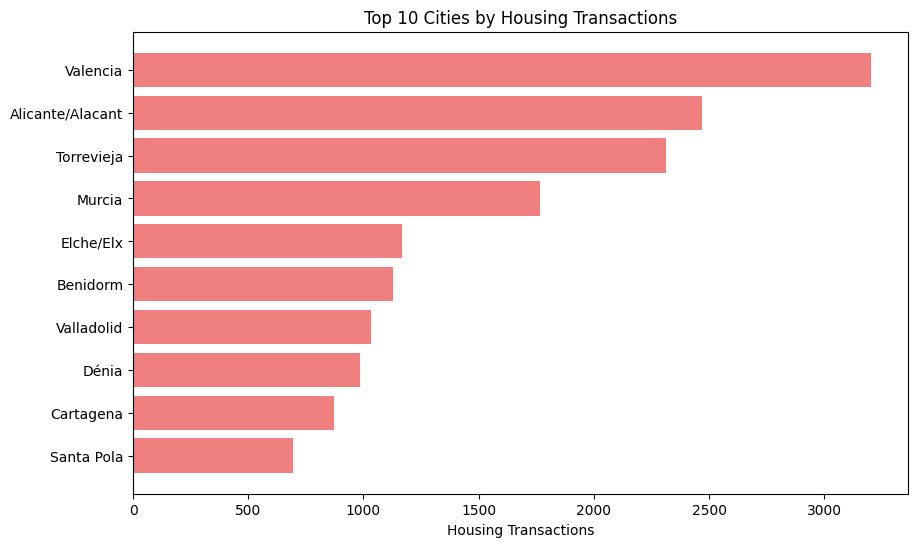

In [19]:
# Step 1: Group by 'City_Name' (index level 3) and get the last entry for each city
latest_data = top_provinces.groupby(level=3).tail(1)

# Step 2: Drop NaNs in 'Housing_Transactions'
latest_data = latest_data.dropna(subset=['Housing_Transactions'])

# Step 3: Sort by the 'Housing_Transactions' to get the top 10 cities
top_10_cities = latest_data.nlargest(10, 'Housing_Transactions')

# Step 4: Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_cities.index.get_level_values(3), top_10_cities['Housing_Transactions'], color='lightcoral')
plt.xlabel('Housing Transactions')
plt.title('Top 10 Cities by Housing Transactions')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest transactions on top
plt.show()


In [20]:
top_10_cities_values = top_10_cities.index.get_level_values(3).unique().to_list()

top_10_cities

Price_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                         
2023-10-01 Comunidad Valenciana     Valencia      Valencia               2231.370   
                                    Alicante      Alicante/Alacant       1903.400   
                                                  Torrevieja             1767.860   
           Región de Murcia         Murcia        Murcia                 1220.395   
           Comunidad Valenciana     Alicante      Elche/Elx              1273.580   
                                                  Benidorm               2439.990   
           Castilla y León          Valladolid    Valladolid             1540.725   
           Comunidad Valenciana     Alicante      Dénia                  2458.330   
           Región de Murcia         Murcia        Cartagena              1250.000   
           Comunidad Valenciana     Alicante      Santa Pola             1876.400   

                                                                    1y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                             
2023-10-01 Comunidad Valenciana     Valencia      Valencia                   0.095549   
                                    Alicante      Alicante/Alacant           0.080462   
                                                  Torrevieja                 0.077622   
           Región de Murcia         Murcia        Murcia                     0.035100   
           Comunidad Valenciana     Alicante      Elche/Elx                  0.025939   
                                                  Benidorm                   0.071995   
           Castilla y León          Valladolid    Valladolid                -0.022103   
           Comunidad Valenciana     Alicante      Dénia                      0.078215   
           Región de Murcia         Murcia        Cartagena                  0.022729   
           Comunidad Valenciana     Alicante      Santa Pola                 0.072882   

                                                                    5y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                             
2023-10-01 Comunidad Valenciana     Valencia      Valencia                   0.070275   
                                    Alicante      Alicante/Alacant           0.072779   
                                                  Torrevieja                 0.066701   
           Región de Murcia         Murcia        Murcia                     0.035666   
           Comunidad Valenciana     Alicante      Elche/Elx                  0.046078   
                                                  Benidorm                   0.045185   
           Castilla y León          Valladolid    Valladolid                 0.021737   
           Comunidad Valenciana     Alicante      Dénia                      0.063286   
           Región de Murcia         Murcia        Cartagena                  0.033708   
           Comunidad Valenciana     Alicante      Santa Pola                 0.054898   

                                                                    Rent_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                        
2023-10-01 Comunidad Valenciana     Valencia      Valencia                13.875   
                                    Alicante      Alicante/Alacant        11.060   
                                                  Torrevieja               9.880   
           Región de Murcia         Murcia        Murcia                   8.250   
           Comunidad Valenciana     Alicante      Elche/Elx                7.780   
                                                  Benidorm                13.510   
           Castilla y León          Valladolid    Valladolid               8.060   
           Comunidad Valenciana     Alicante      Dénia                   10.000   
           Región de Murcia         Murcia        Cartagena          

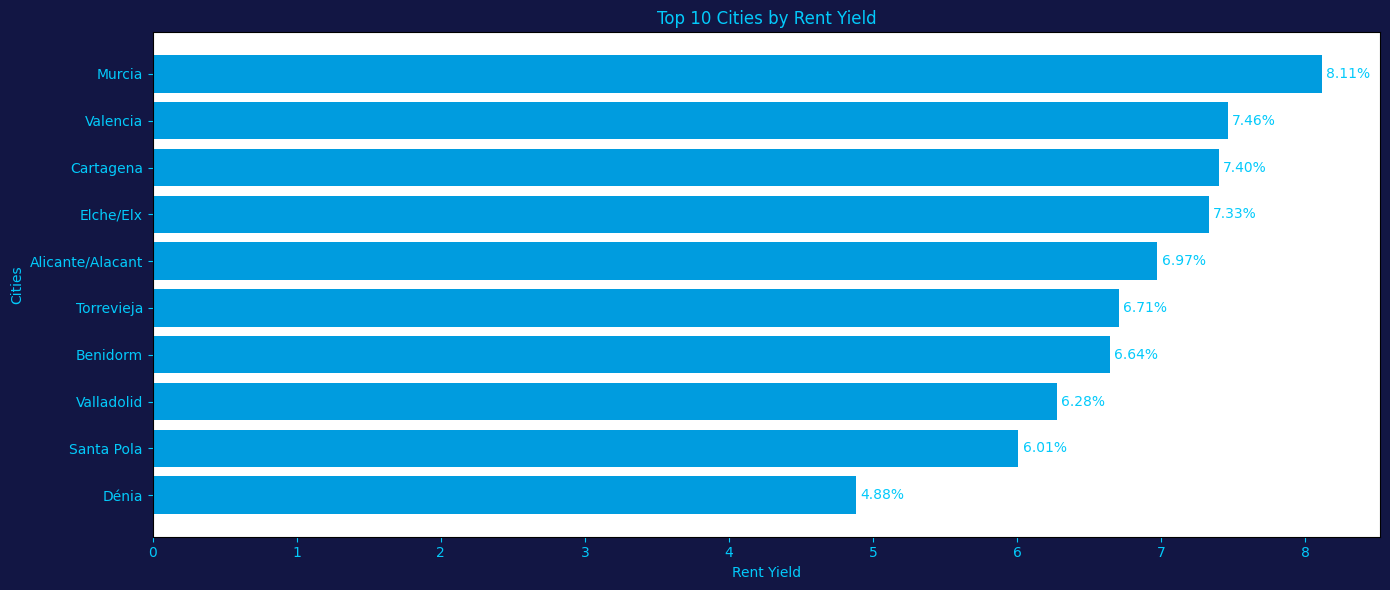

In [21]:
# Drop NaNs in 'Rent_Yield'
top_10_cities = top_10_cities.dropna(subset=['Rent_Yield'])

# Sort the cities by 'Rent_Yield' in descending order
top_10_by_rent_yield = top_10_cities.nlargest(10, 'Rent_Yield')

# Plotting the horizontal bar chart for Rent Yield
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('#121644')  # Set background color

# Horizontal bar chart with bars in company blue
bars = ax.barh(top_10_by_rent_yield.index.get_level_values(3), top_10_by_rent_yield['Rent_Yield'], color='#009CDF')

# Set labels and titles with company light blue
ax.set_xlabel('Rent Yield', color='#03CAFB')
ax.set_ylabel('Cities', color='#03CAFB')
ax.set_title('Top 10 Cities by Rent Yield', color='#03CAFB')

# Customize tick labels and axes
ax.tick_params(axis='x', colors='#03CAFB')
ax.tick_params(axis='y', colors='#03CAFB')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest Rent Yield on top

# Annotating the bars with the actual Rent Yield values
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}%', 
                xy=(width, bar.get_y() + bar.get_height() / 2), 
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center', color='#03CAFB')

plt.tight_layout()
plt.show()


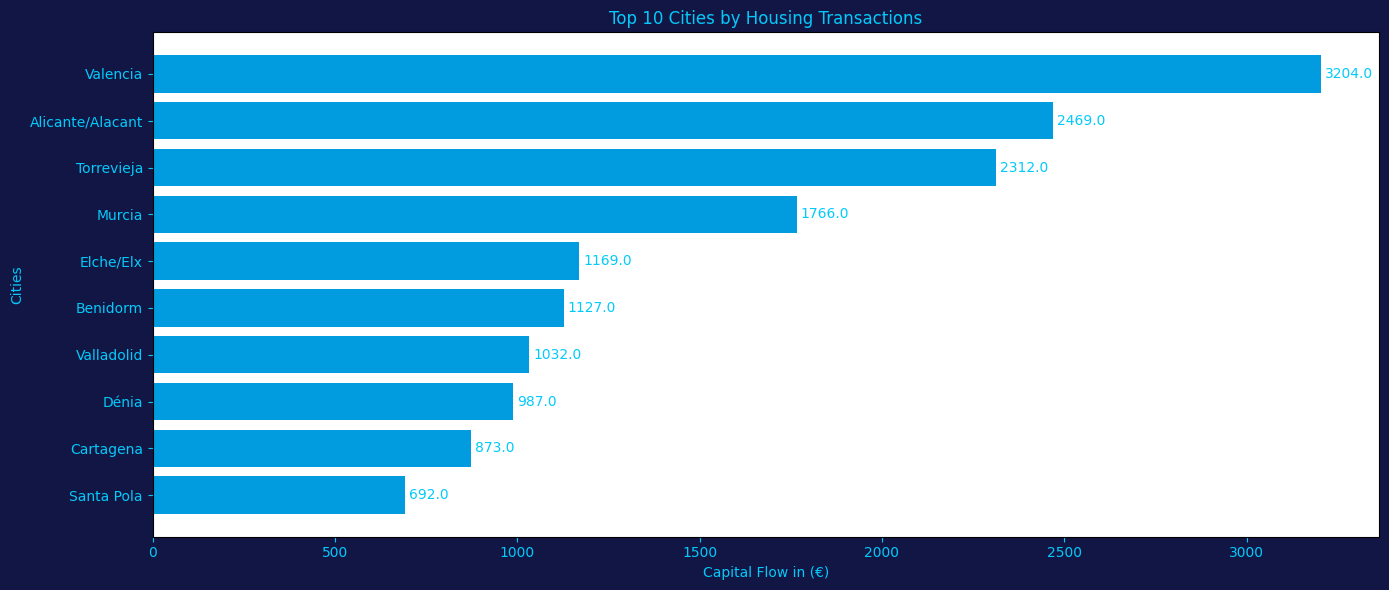

In [54]:
# Drop NaNs in 'Rent_Yield'
top_10_cities = top_10_cities.dropna(subset=['Housing_Transactions'])

# Sort the cities by 'Rent_Yield' in descending order
top_10_by_rent_yield = top_10_cities.nlargest(10, 'Housing_Transactions')

# Plotting the horizontal bar chart for Rent Yield
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('#121644')  # Set background color

# Horizontal bar chart with bars in company blue
bars = ax.barh(top_10_by_rent_yield.index.get_level_values(3), top_10_by_rent_yield['Housing_Transactions'], color='#009CDF')

# Set labels and titles with company light blue
ax.set_xlabel('Capital Flow in (€)', color='#03CAFB')
ax.set_ylabel('Cities', color='#03CAFB')
ax.set_title('Top 10 Cities by Housing Transactions', color='#03CAFB')

# Customize tick labels and axes
ax.tick_params(axis='x', colors='#03CAFB')
ax.tick_params(axis='y', colors='#03CAFB')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest Rent Yield on top

# Annotating the bars with the actual Rent Yield values
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}', 
                xy=(width, bar.get_y() + bar.get_height() / 2), 
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center', color='#03CAFB')

plt.tight_layout()
plt.show()


In [46]:
top_10_cities.columns

Index(['Price_per_sqm', '1y_CAGR_price_sqm', '5y_CAGR_price_sqm',
       'Rent_per_sqm', '1y_CAGR_rent_sqm', '5y_CAGR_rent_sqm',
       'Housing_Transactions', '1y_Change_housing_transactions',
       '3y_Change_housing_transactions', 'Default_Risk',
       '3y_Change_default_risk', 'Time_to_Sell', '3y_Change_time2sell',
       'Time_to_Rent', '3y_Change_time2rent', 'Rent_Yield',
       '5y_Change_Rent_Yield', 'Capital Flow in (€)',
       '5y_Change_Capital Flow in (€)'],
      dtype='object')

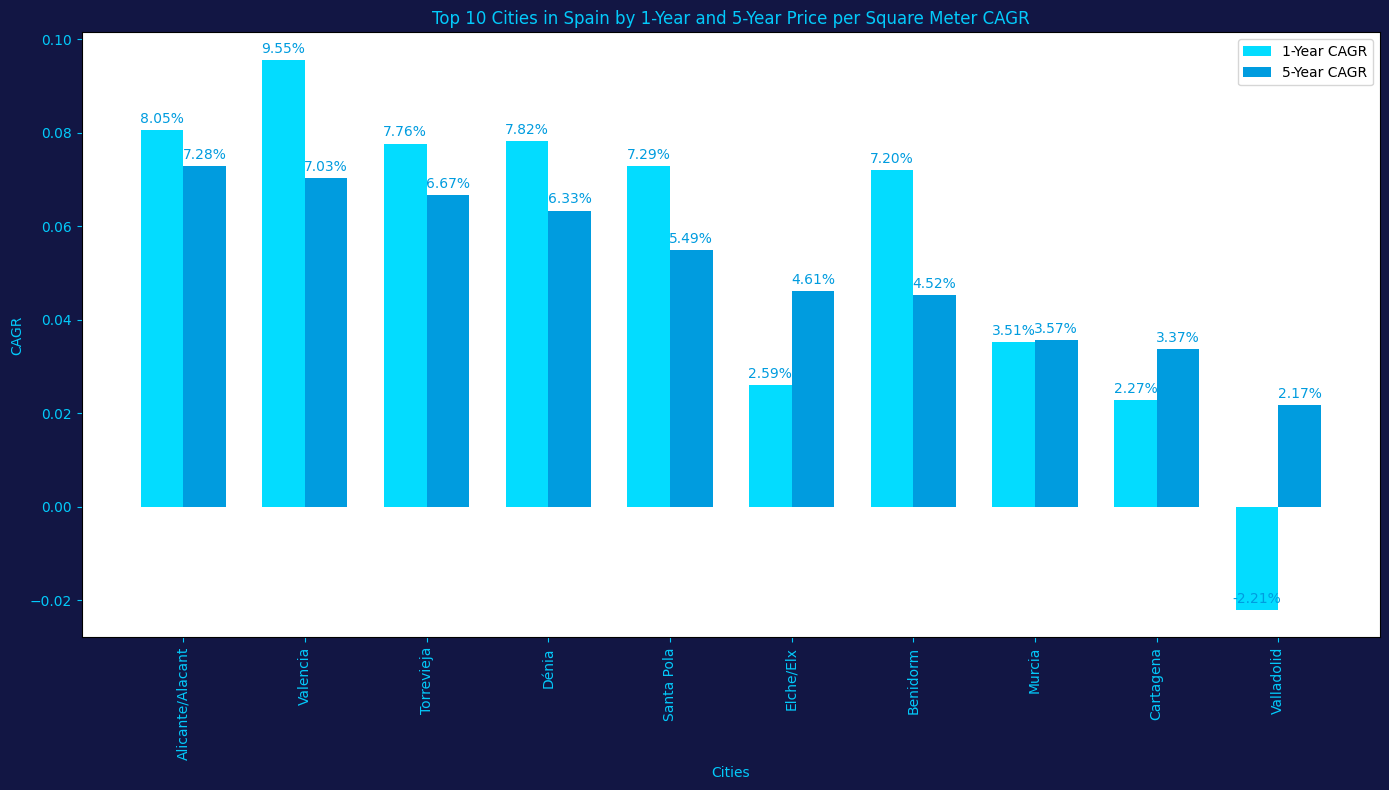

<Figure size 640x480 with 0 Axes>

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Filter to get the latest data for each province (assuming the latest date is at the end)
latest_data = top_10_cities.groupby(level=3).tail(1)

# Drop rows with NaN values in either of the CAGR columns
latest_data = latest_data.dropna(subset=['1y_CAGR_price_sqm', '5y_CAGR_price_sqm'])

# Sort the DataFrame by 5y_CAGR to get the top 10 cities
latest_data = latest_data.sort_values(by='5y_CAGR_price_sqm', ascending=False).head(10)

# Plotting
provinces = latest_data.index.get_level_values(3)
ind = np.arange(len(provinces))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#121644')  # Set background color

# Bar chart for 1-Year CAGR
bar1 = ax.bar(ind - width/2, latest_data['1y_CAGR_price_sqm'], width, label='1-Year CAGR', color='#03DCFF')

# Bar chart for 5-Year CAGR
bar2 = ax.bar(ind + width/2, latest_data['5y_CAGR_price_sqm'], width, label='5-Year CAGR', color='#009CDF')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cities', color='#03CAFB')
ax.set_ylabel('CAGR', color='#03CAFB')
ax.set_title('Top 10 Cities in Spain by 1-Year and 5-Year Price per Square Meter CAGR', color='#03CAFB')
ax.set_xticks(ind)
ax.set_xticklabels(provinces, rotation=90)
ax.legend()

# Customize tick labels and axes
ax.tick_params(axis='x', colors='#03CAFB')
ax.tick_params(axis='y', colors='#03CAFB')

# Annotate bars with values
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='#009CDF')

autolabel(bar1)
autolabel(bar2)

# Customize background colors
fig.patch.set_facecolor('#121644')

plt.tight_layout()
plt.show()


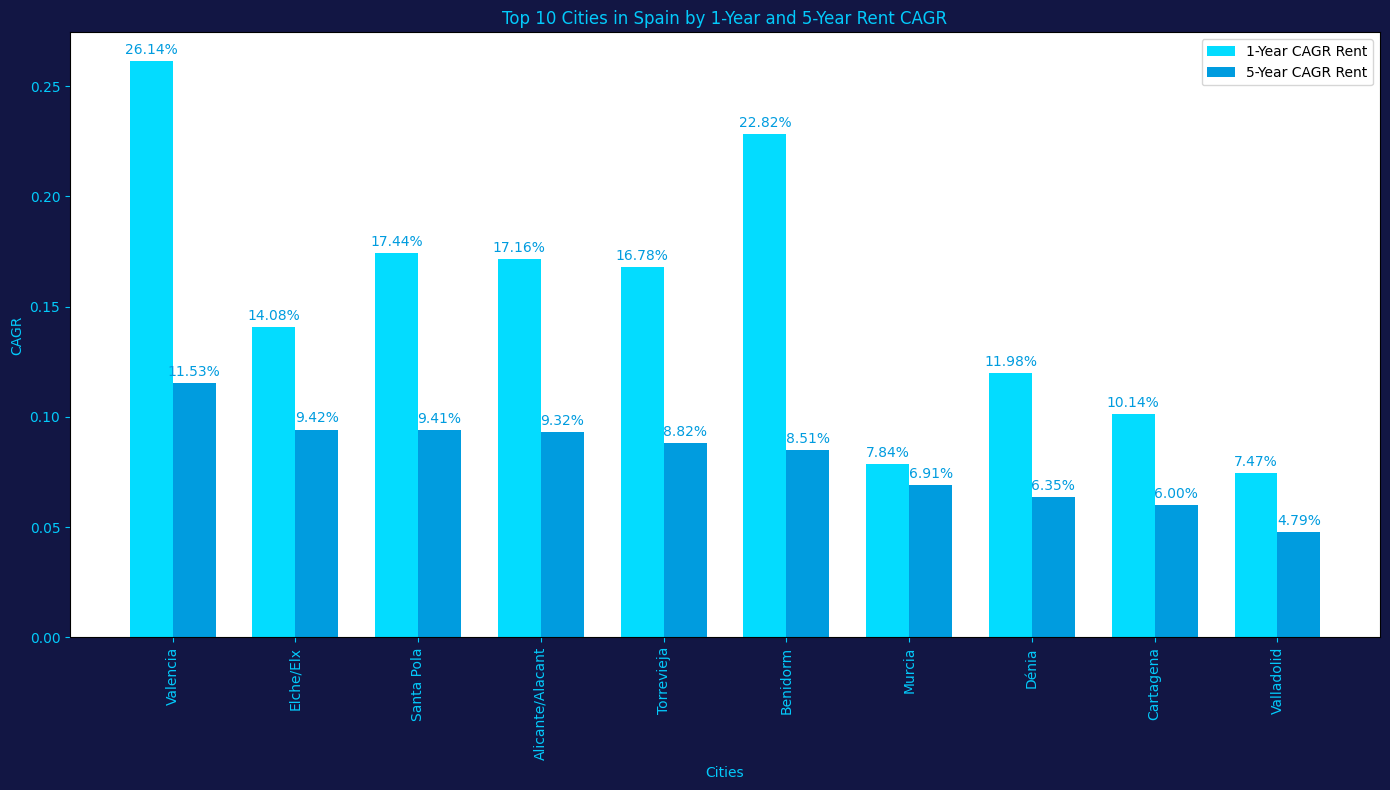

In [44]:
# Filter to get the latest data for each province (assuming the latest date is at the end)
latest_data = top_10_cities.groupby(level=3).tail(1)

# Drop rows with NaN values in either of the CAGR columns
latest_data = latest_data.dropna(subset=['1y_CAGR_rent_sqm', '5y_CAGR_rent_sqm'])

# Sort the DataFrame by 5y_CAGR_rent_sqm to get the top 10 provinces
latest_data = latest_data.sort_values(by='5y_CAGR_rent_sqm', ascending=False).head(10)

# Plotting
provinces = latest_data.index.get_level_values(3)
ind = np.arange(len(provinces))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#121644')  # Set background color

# Bar chart for 1-Year CAGR Rent
bar1 = ax.bar(ind - width/2, latest_data['1y_CAGR_rent_sqm'], width, label='1-Year CAGR Rent', color='#03DCFF')

# Bar chart for 5-Year CAGR Rent
bar2 = ax.bar(ind + width/2, latest_data['5y_CAGR_rent_sqm'], width, label='5-Year CAGR Rent', color='#009CDF')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cities', color='#03CAFB')
ax.set_ylabel('CAGR', color='#03CAFB')
ax.set_title('Top 10 Cities in Spain by 1-Year and 5-Year Rent CAGR', color='#03CAFB')
ax.set_xticks(ind)
ax.set_xticklabels(provinces, rotation=90)
ax.legend()

# Customize tick labels and axes
ax.tick_params(axis='x', colors='#03CAFB')
ax.tick_params(axis='y', colors='#03CAFB')

# Annotate bars with values
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='#009CDF')

autolabel(bar1)
autolabel(bar2)

# Customize background colors
fig.patch.set_facecolor('#121644')

plt.tight_layout()
plt.show()



In [ ]:
top_10_cities.columns

Index(['Price_per_sqm', '1y_CAGR_price_sqm', '5y_CAGR_price_sqm',
       'Rent_per_sqm', '1y_CAGR_rent_sqm', '5y_CAGR_rent_sqm',
       'Housing_Transactions', '1y_Change_housing_transactions',
       '3y_Change_housing_transactions', 'Default_Risk',
       '3y_Change_default_risk', 'Time_to_Sell', '3y_Change_time2sell',
       'Time_to_Rent', '3y_Change_time2rent', 'Rent_Yield',
       '5y_Change_Rent_Yield', 'Capital Flow in (€)',
       '5y_Change_Capital Flow in (€)'],
      dtype='object')

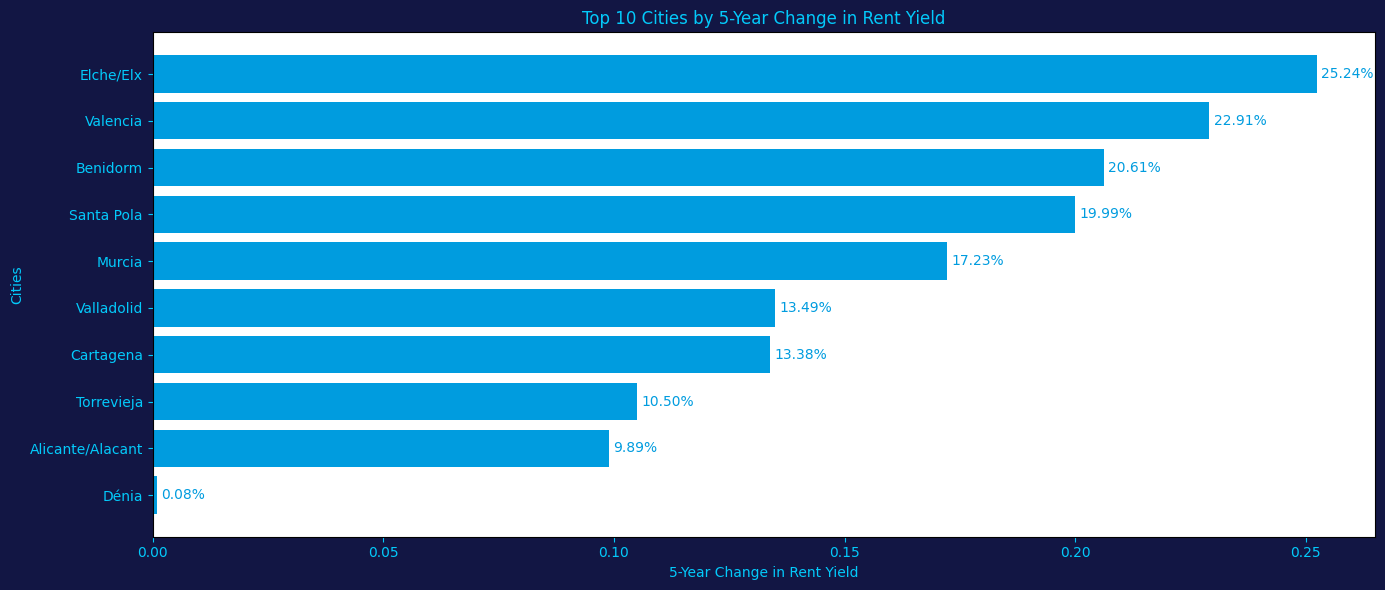

In [ ]:
# Drop NaNs in '5y_Change_Rent_Yield'
latest_data = top_10_cities.dropna(subset=['5y_Change_Rent_Yield'])

# Sort by the '5y_Change_Rent_Yield' to get the top 10 cities
top_5_cities = latest_data.nlargest(10, '5y_Change_Rent_Yield')

# Plotting the horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor('#121644')  # Set the background color

# Horizontal bar chart with bars in white
bars = ax.barh(top_5_cities.index.get_level_values(3), top_5_cities['5y_Change_Rent_Yield'], color='#009CDF')

# Set labels and titles with the company color palette
ax.set_xlabel('5-Year Change in Rent Yield', color='#03CAFB')
ax.set_ylabel('Cities', color='#03CAFB')
ax.set_title('Top 10 Cities by 5-Year Change in Rent Yield', color='#03CAFB')

# Customize tick labels and axes
ax.tick_params(axis='x', colors='#03CAFB')
ax.tick_params(axis='y', colors='#03CAFB')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top

# Annotating the bars with the actual rent yield values
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.2%}', 
                xy=(width, bar.get_y() + bar.get_height() / 2), 
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center', color='#009CDF')

plt.tight_layout()
plt.show()


In [ ]:
top_10_cities_values = top_10_cities.index.get_level_values(3).unique().to_list()

top_10_cities_values

['Valencia',
 'Alicante/Alacant',
 'Torrevieja',
 'Murcia',
 'Elche/Elx',
 'Benidorm',
 'Valladolid',
 'Dénia',
 'Cartagena',
 'Santa Pola']

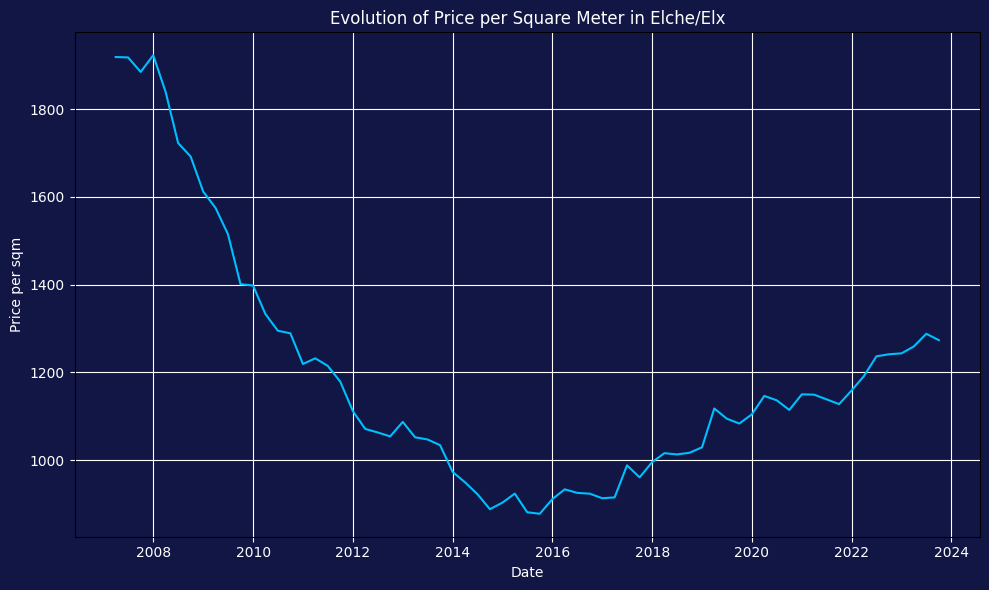

In [63]:
# Filtering based on the 'Province_Name' level in the index
filtered_df = top_provinces.loc[top_provinces.index.get_level_values(3) == 'Elche/Elx']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the 'Price_per_sqm' with the requested color
ax.plot(filtered_df.index.get_level_values(0), filtered_df['Price_per_sqm'], color='#00BFFF', label='Price per sqm')

# Setting background color of the figure and chart to company blue
fig.patch.set_facecolor('#121644')
ax.set_facecolor('#121644')

# Setting x and y axis labels and grid to white
ax.set_xlabel('Date', color='white')
ax.set_ylabel('Price per sqm', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(True, color='white')

# Setting title
ax.set_title('Evolution of Price per Square Meter in Elche/Elx', color='white')

plt.tight_layout()
plt.show()


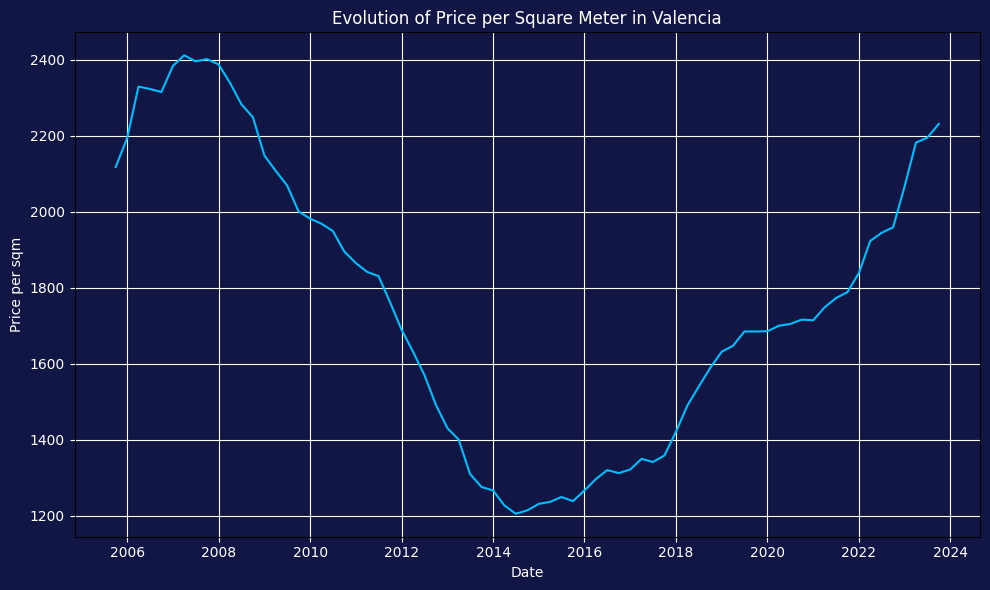

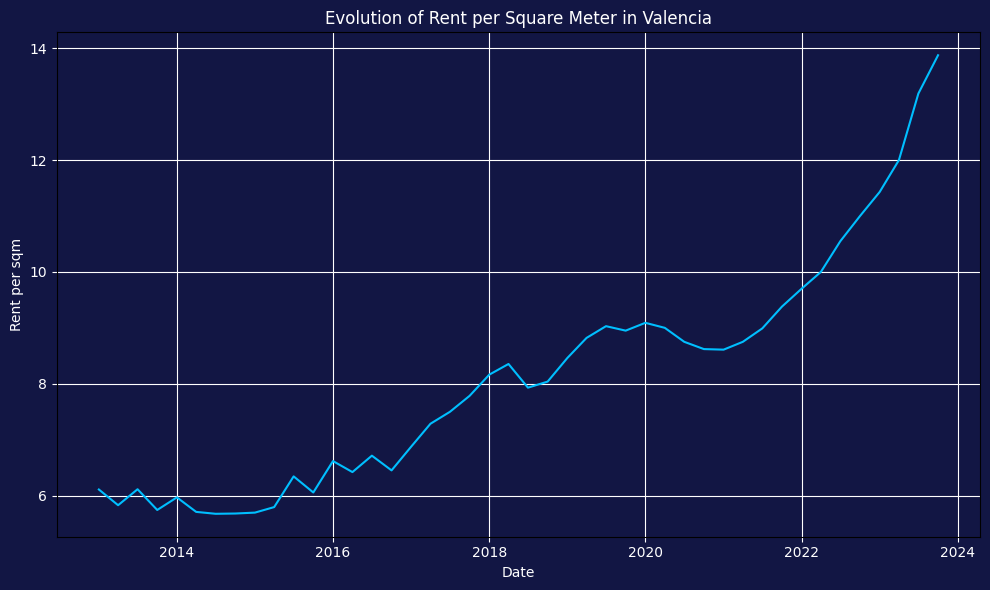

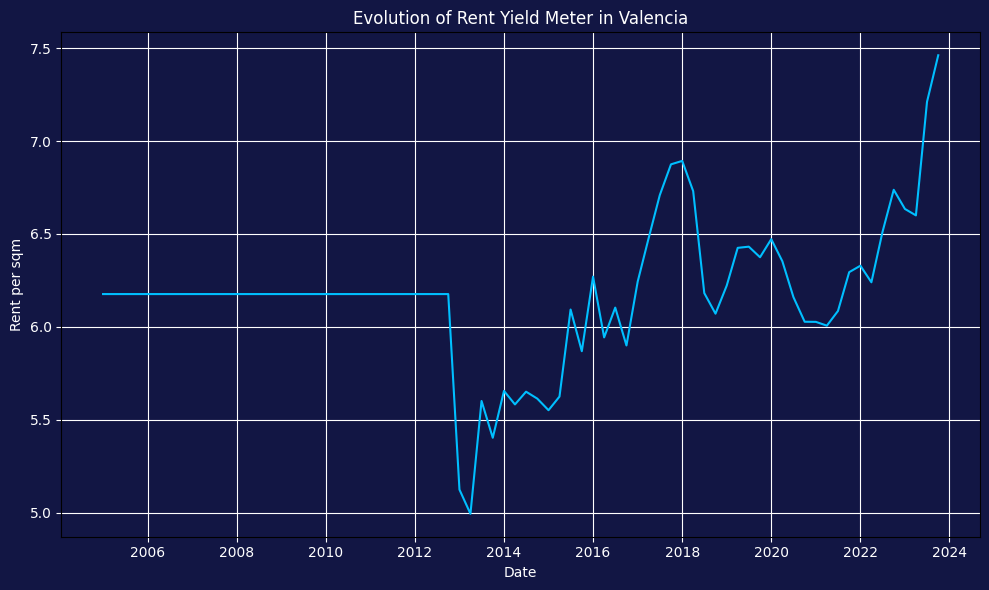

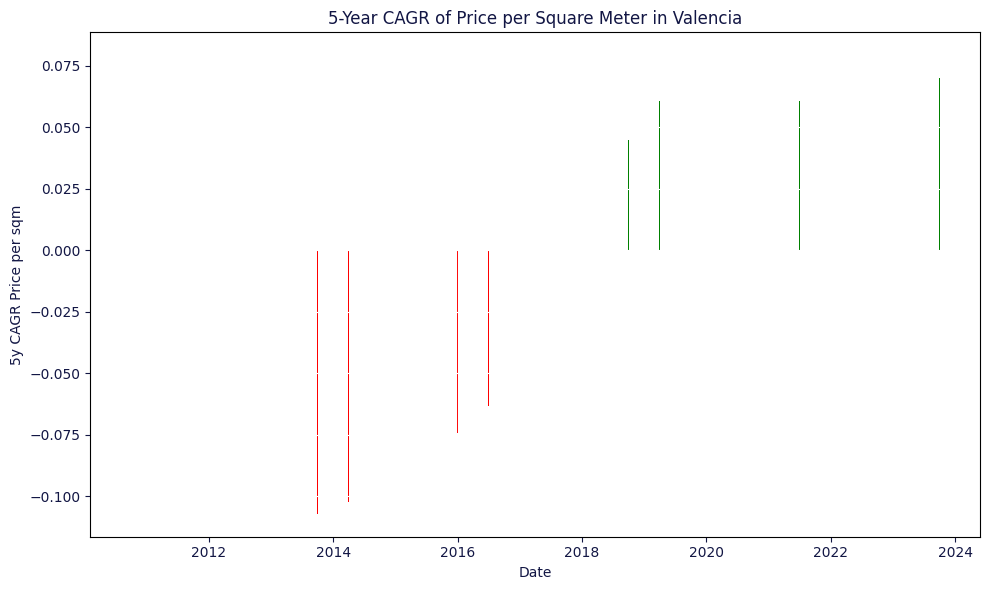

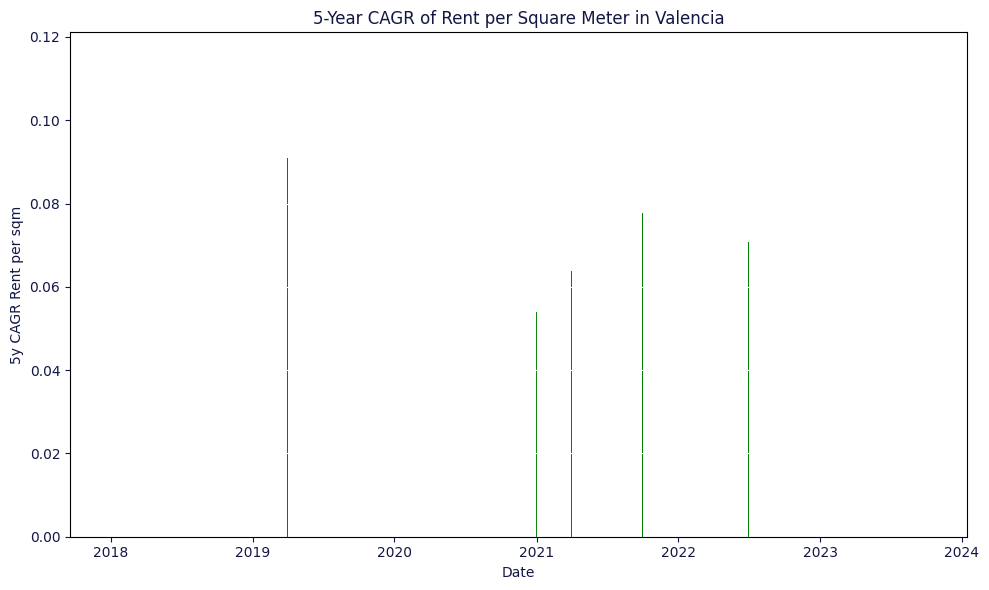

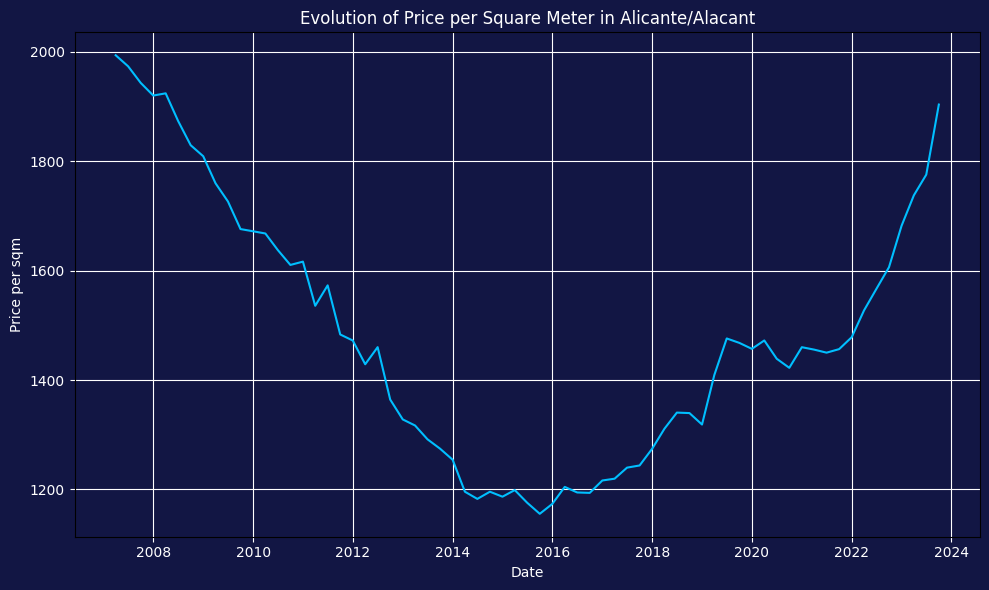

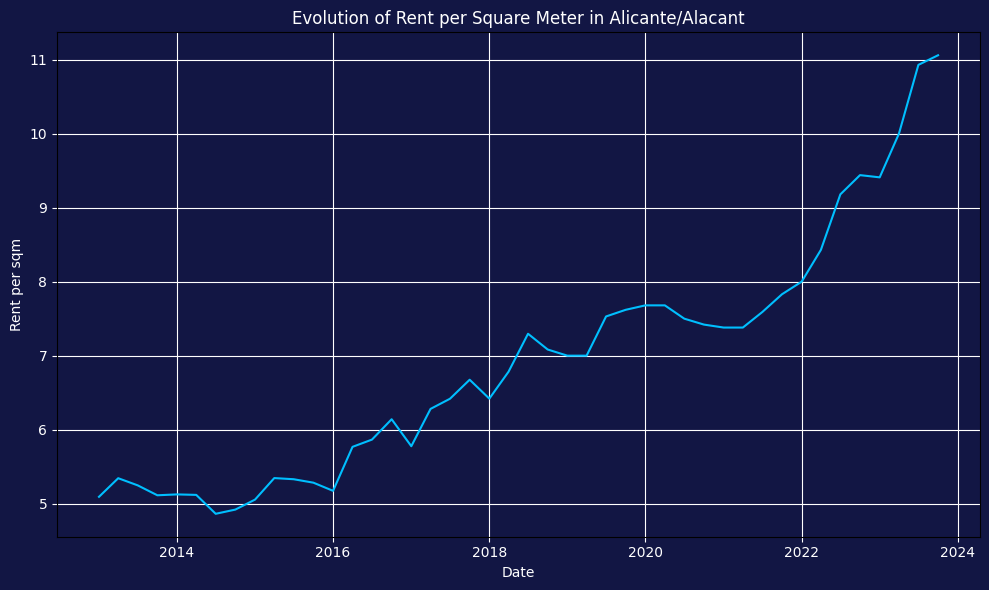

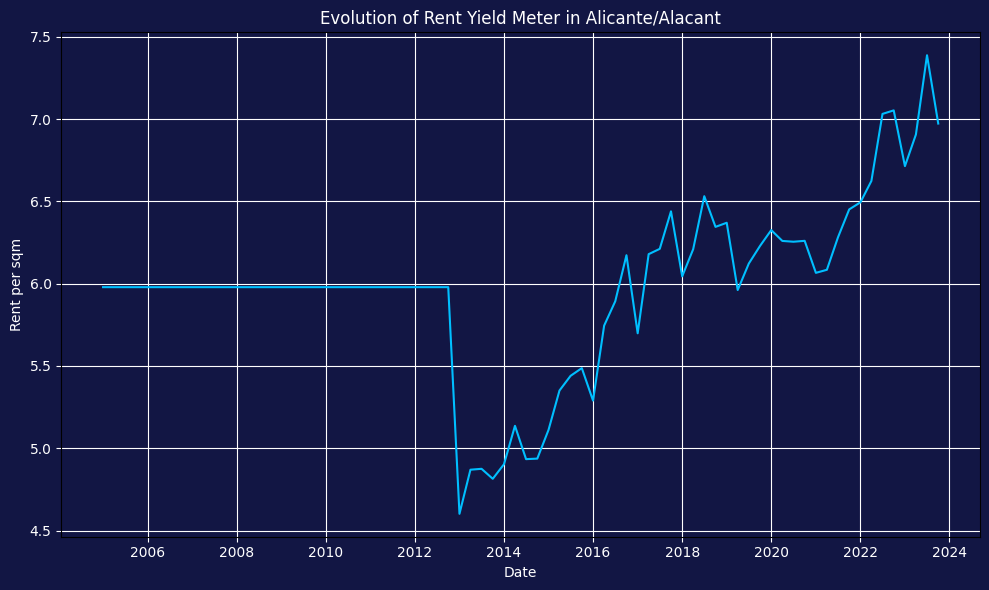

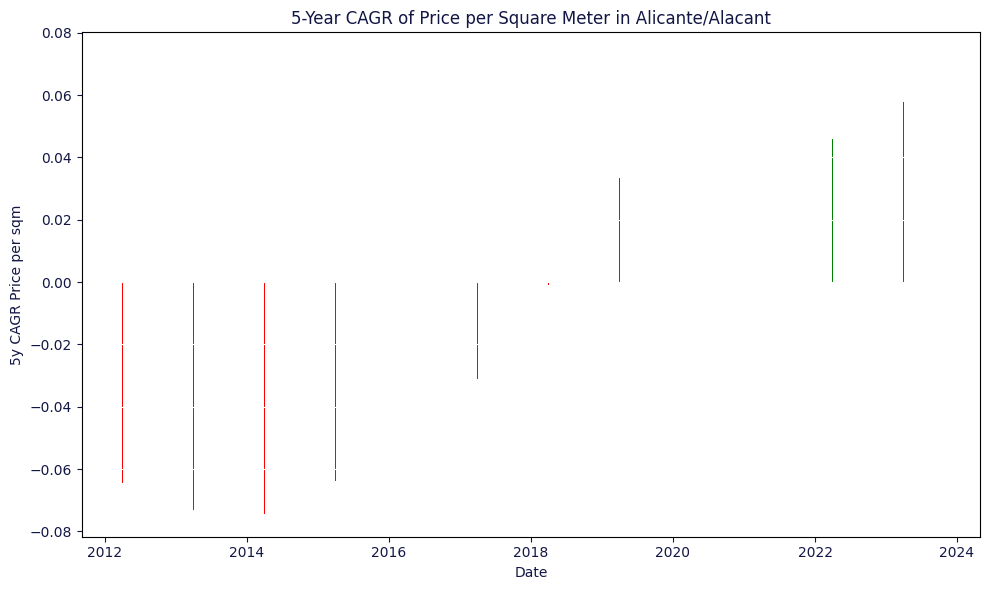

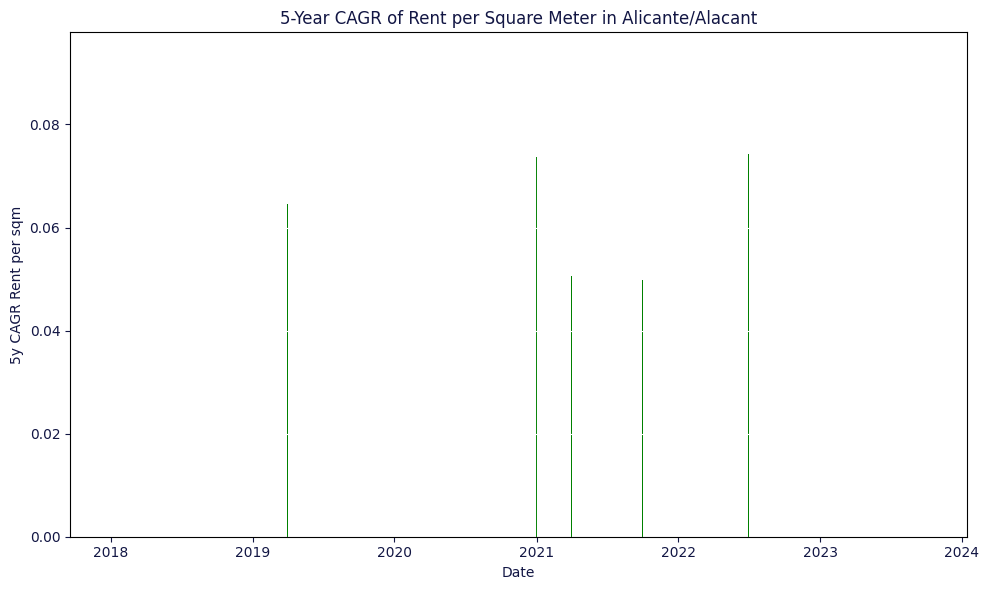

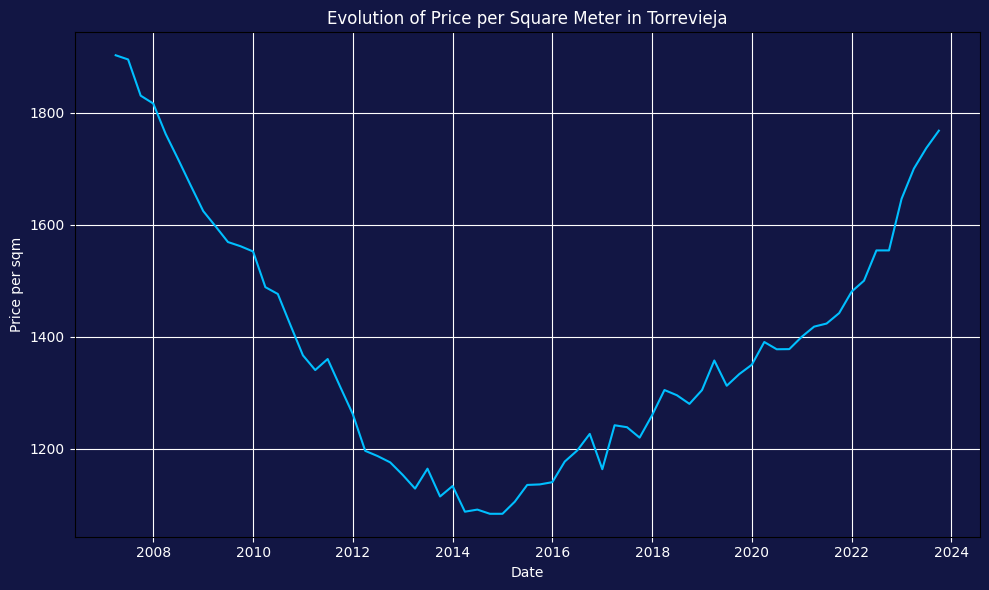

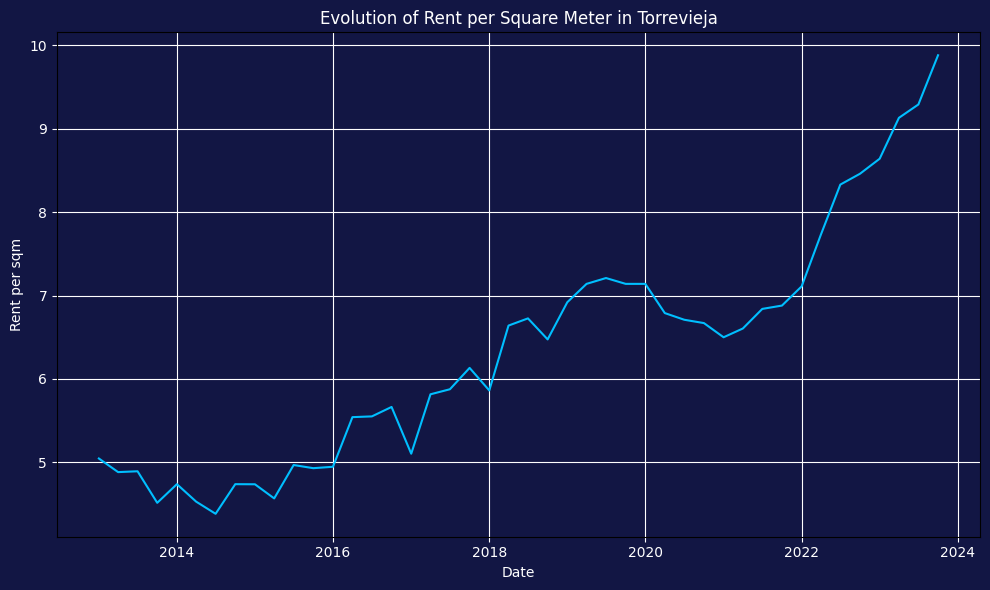

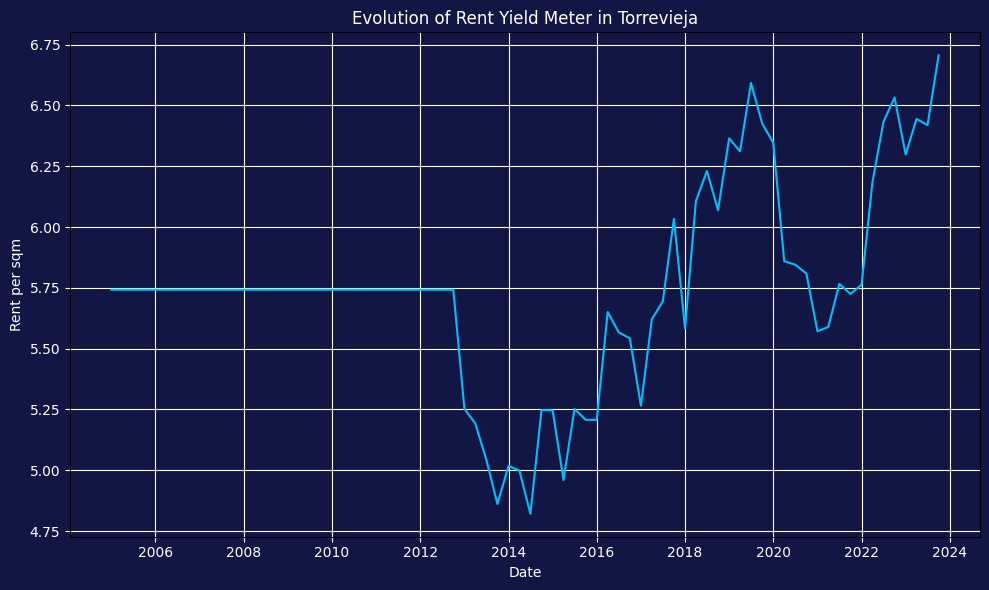

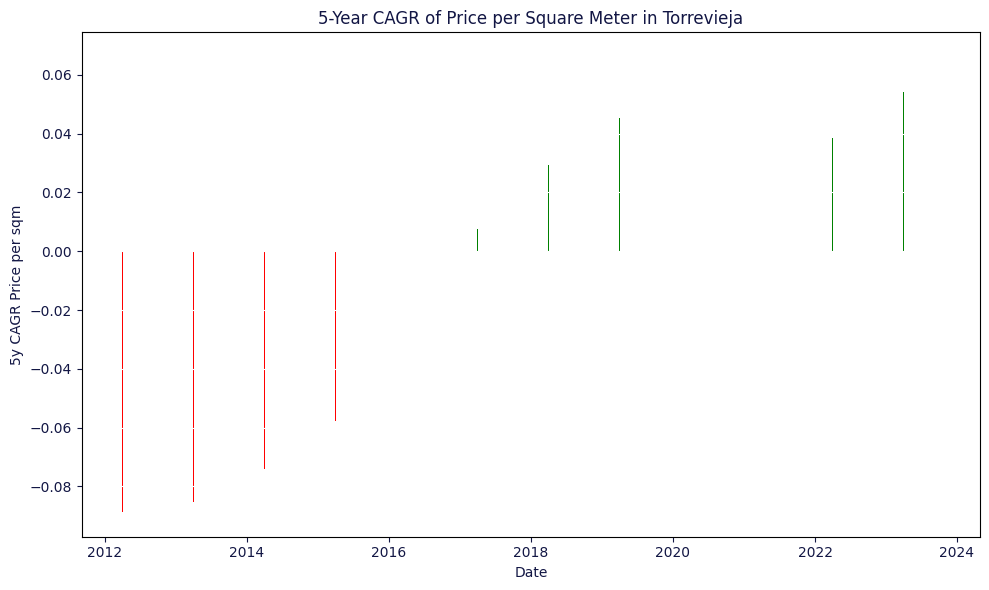

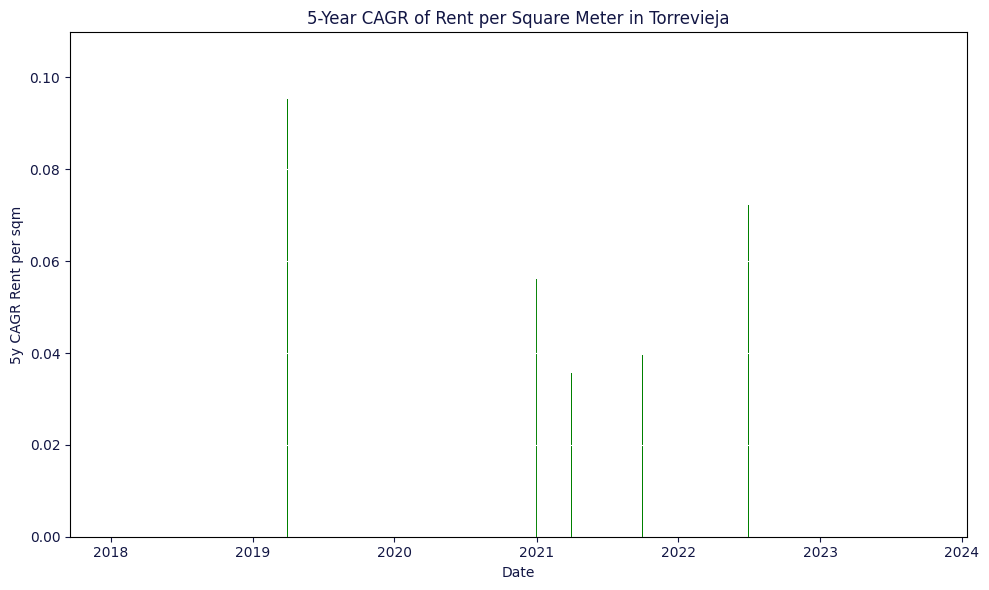

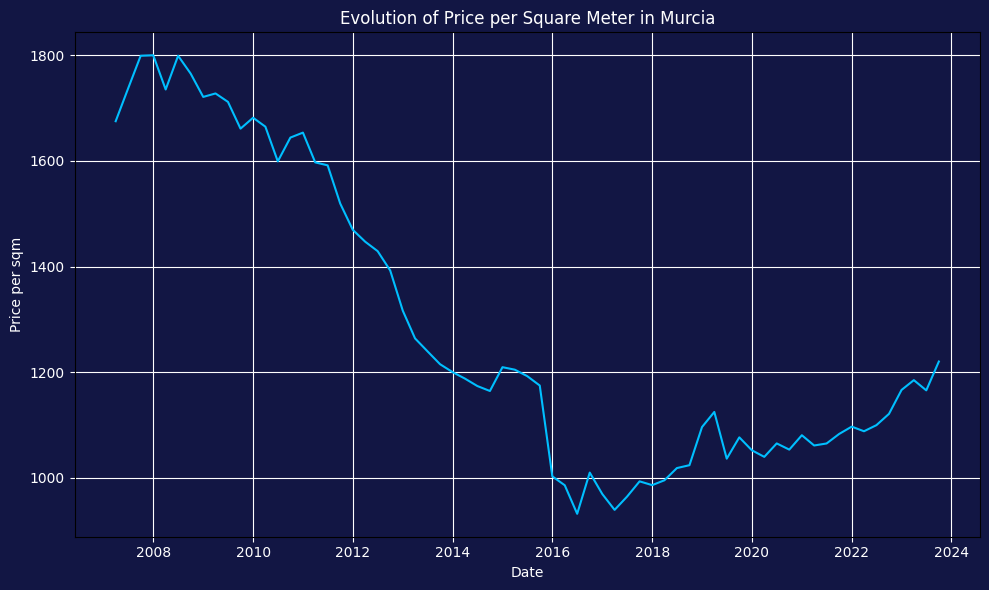

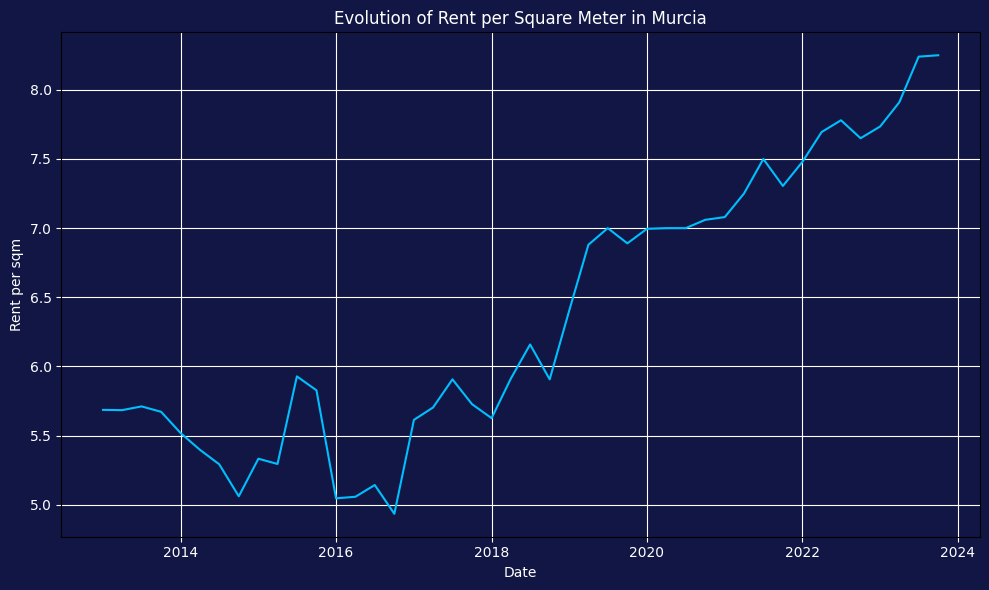

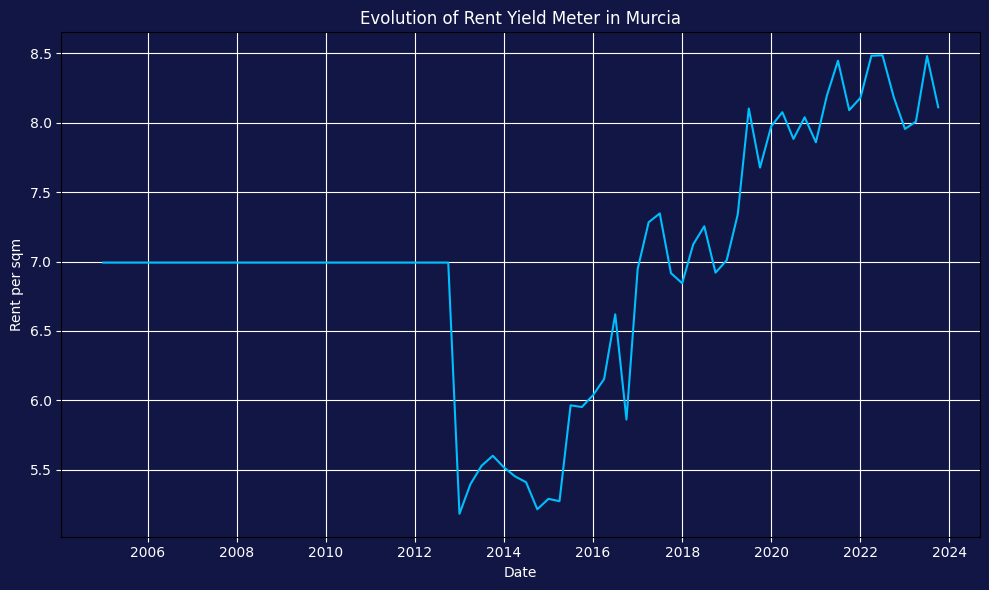

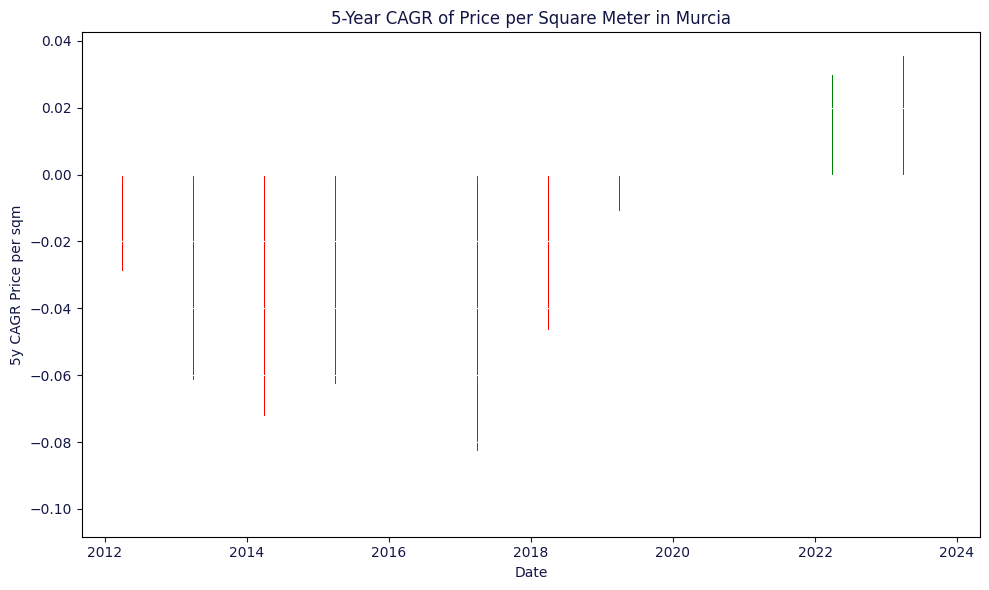

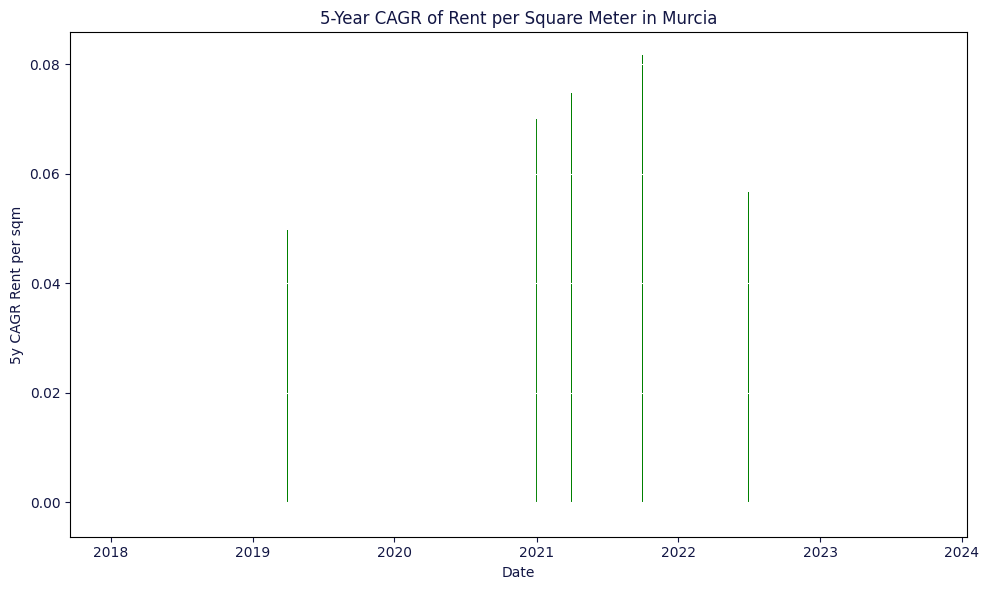

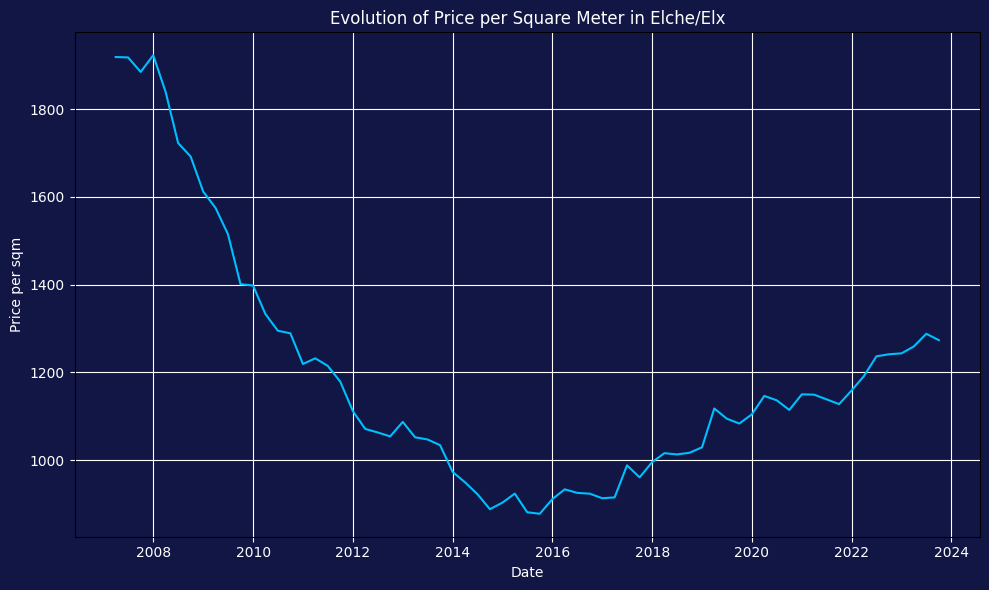

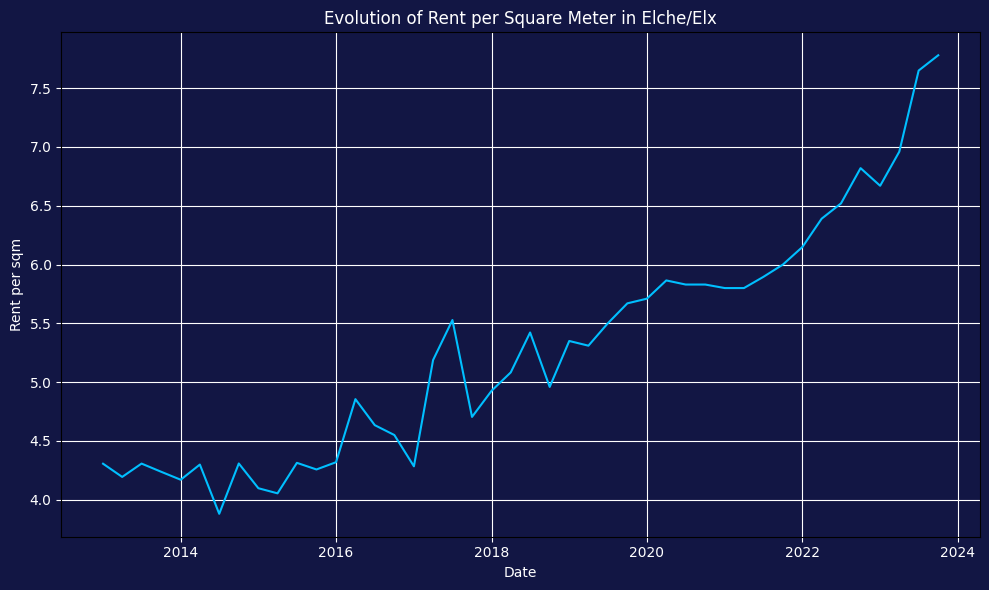

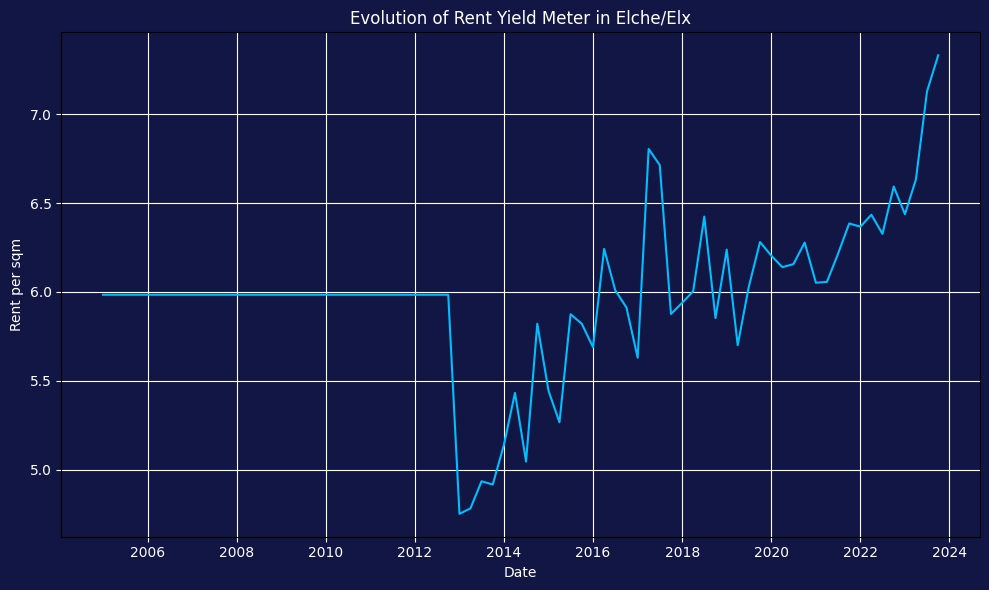

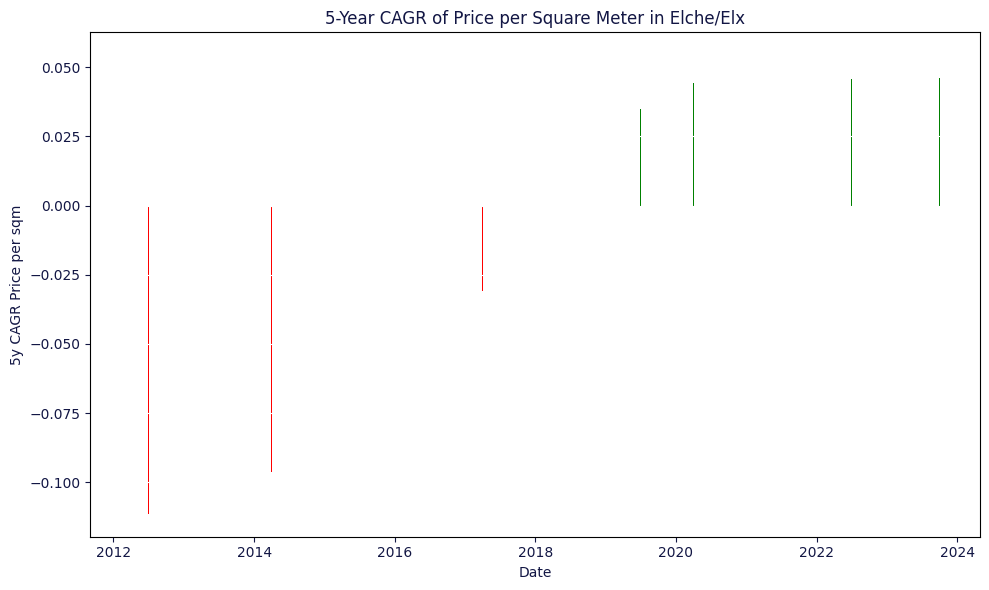

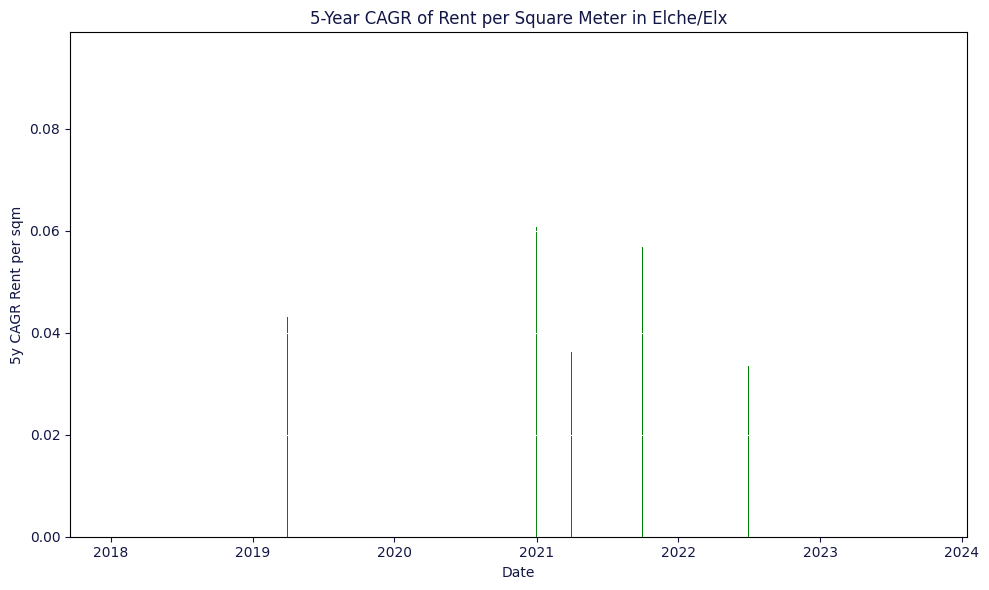

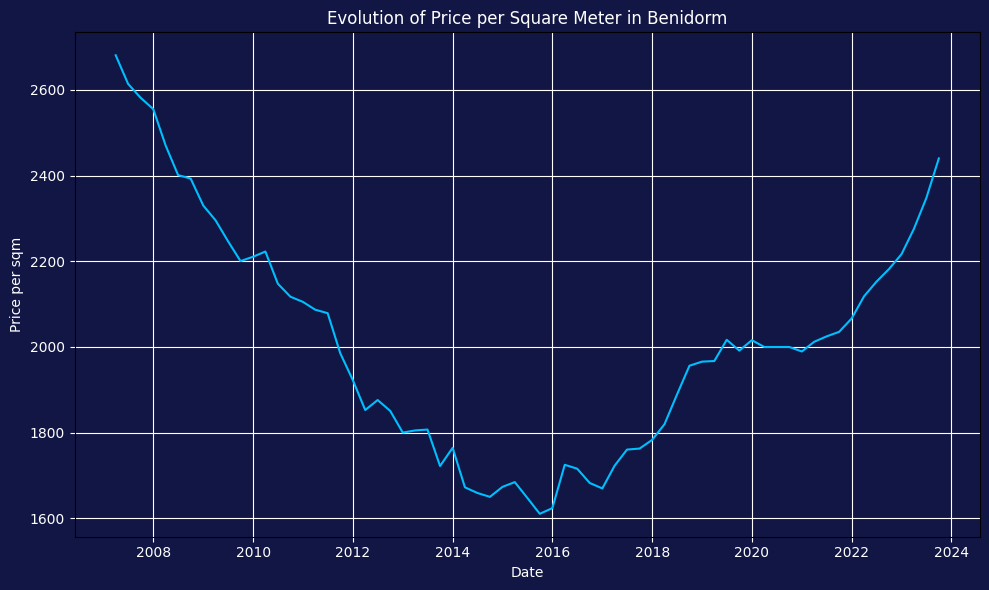

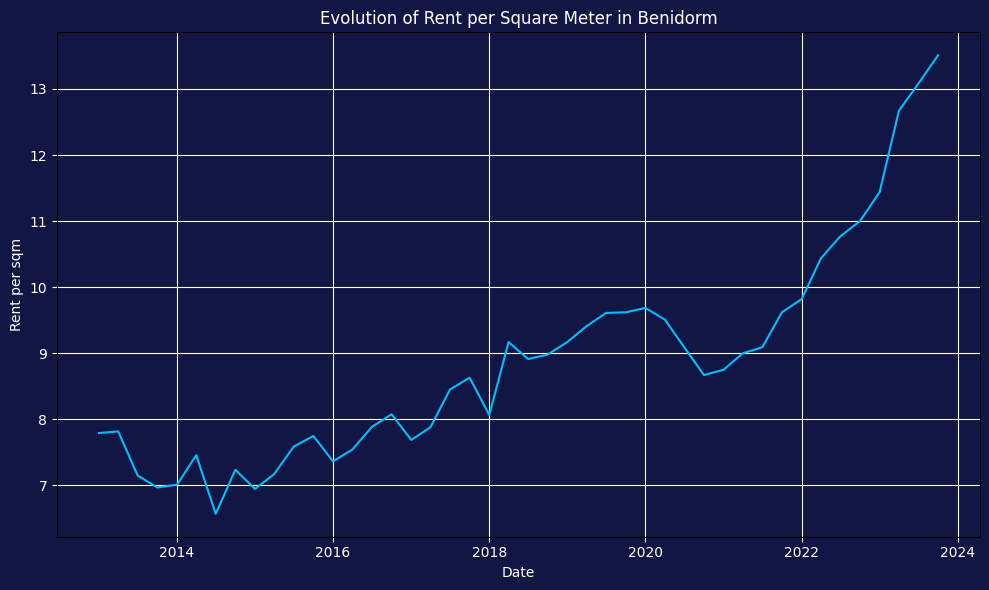

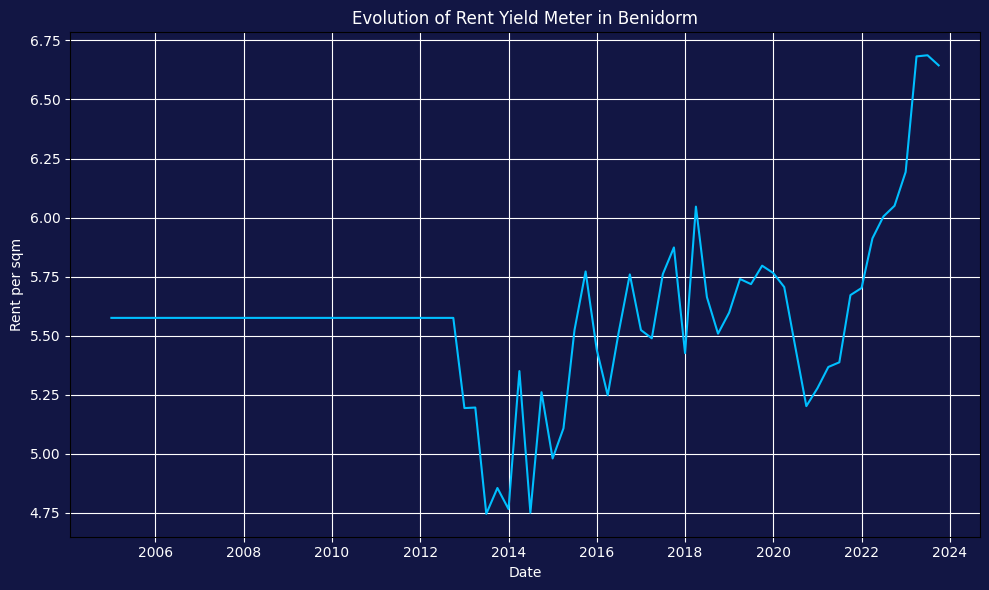

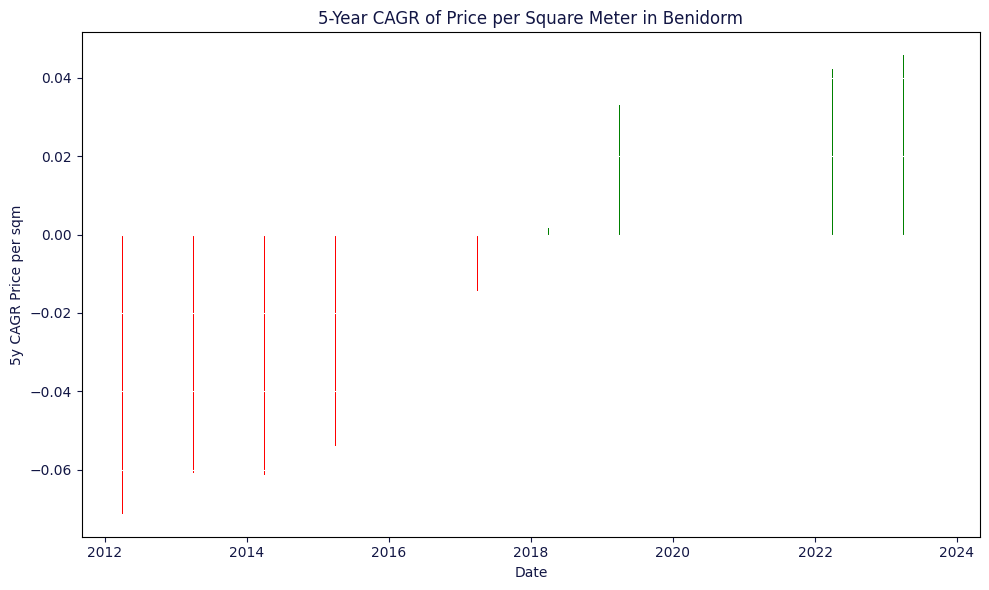

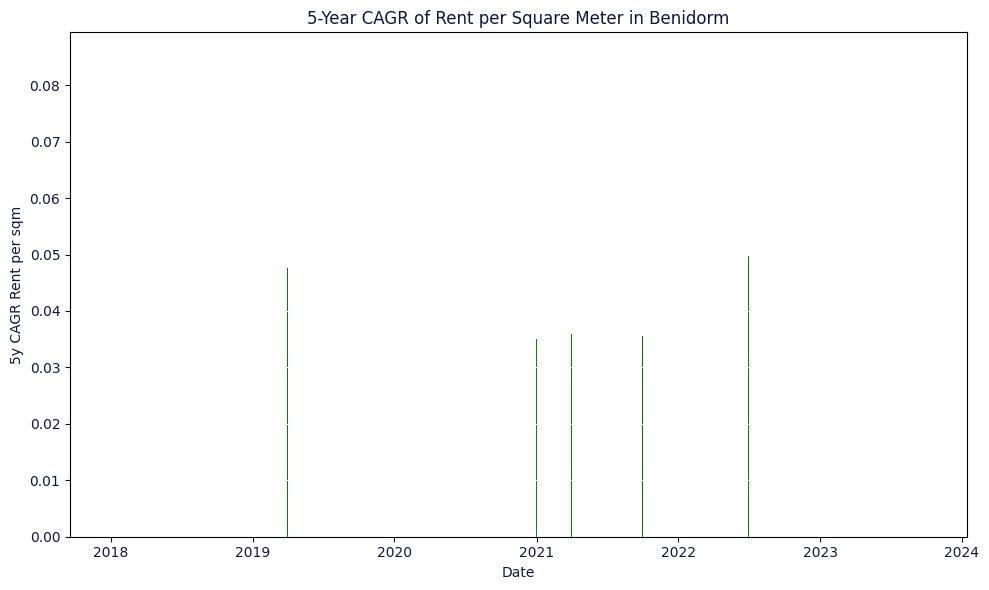

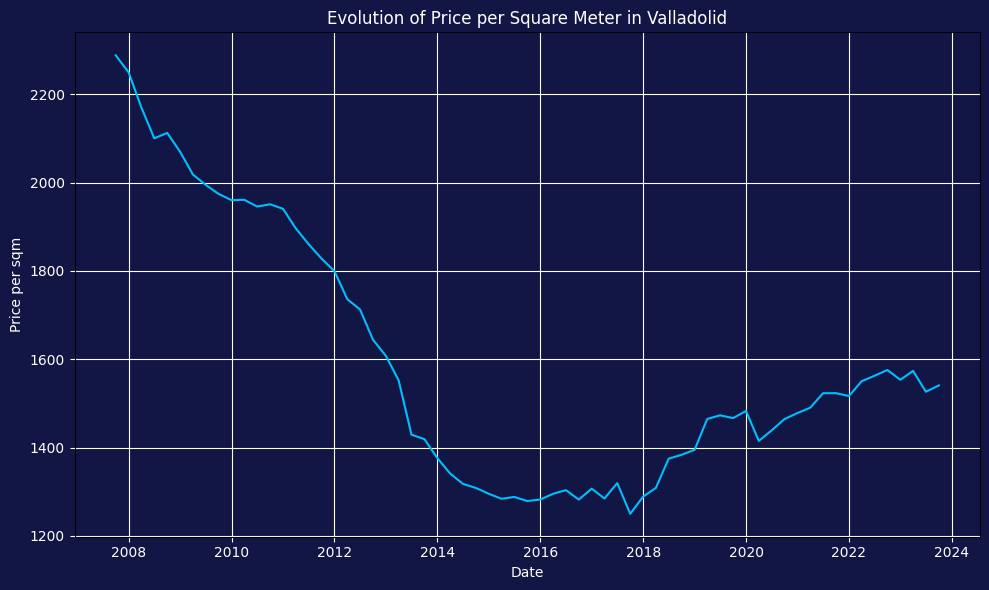

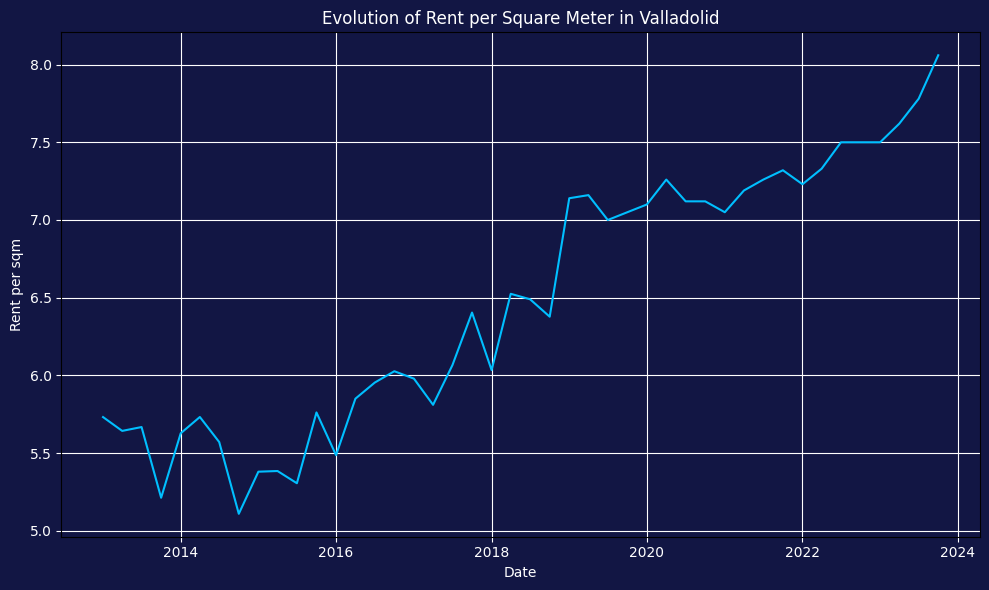

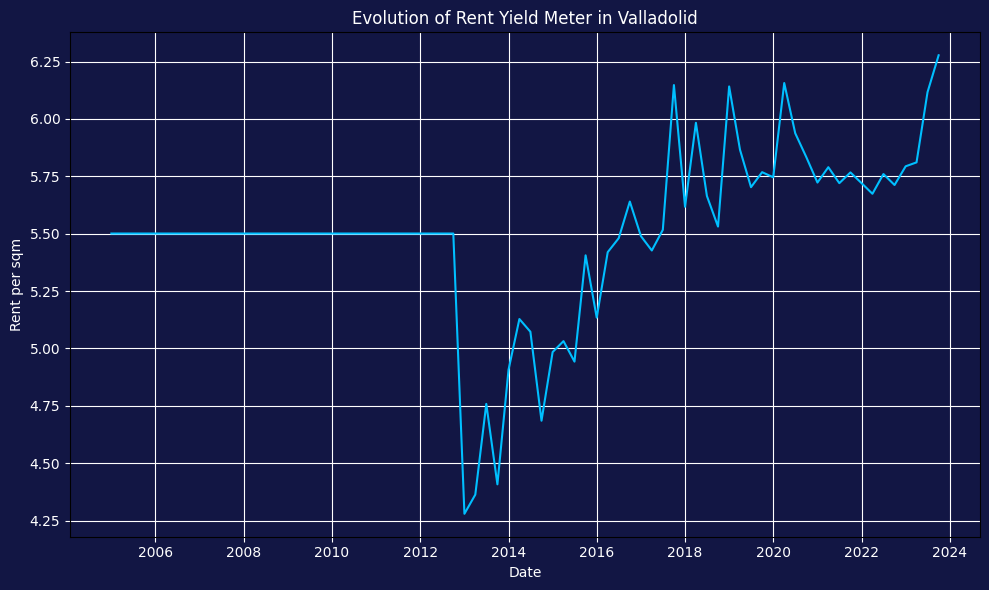

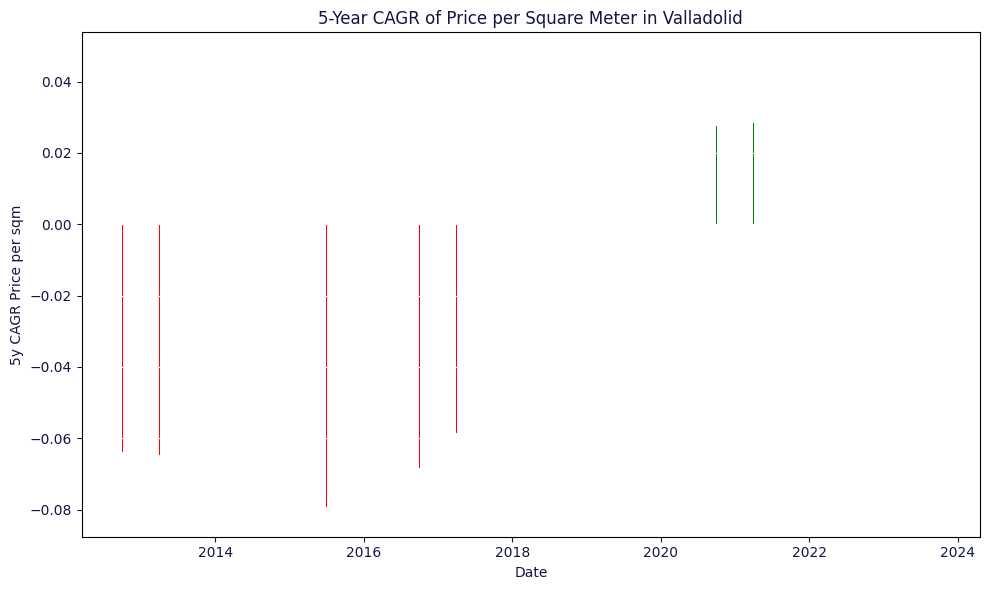

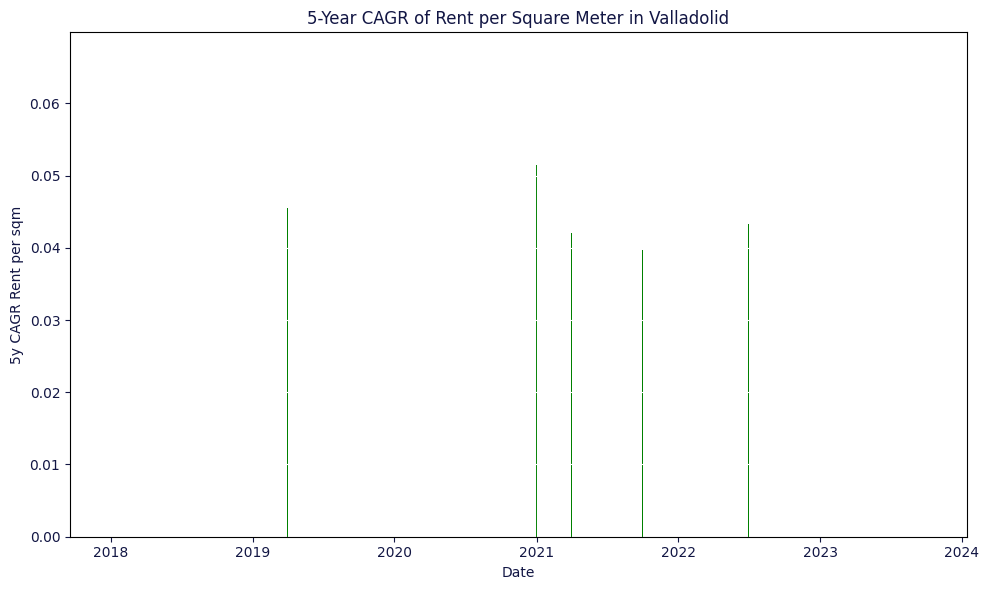

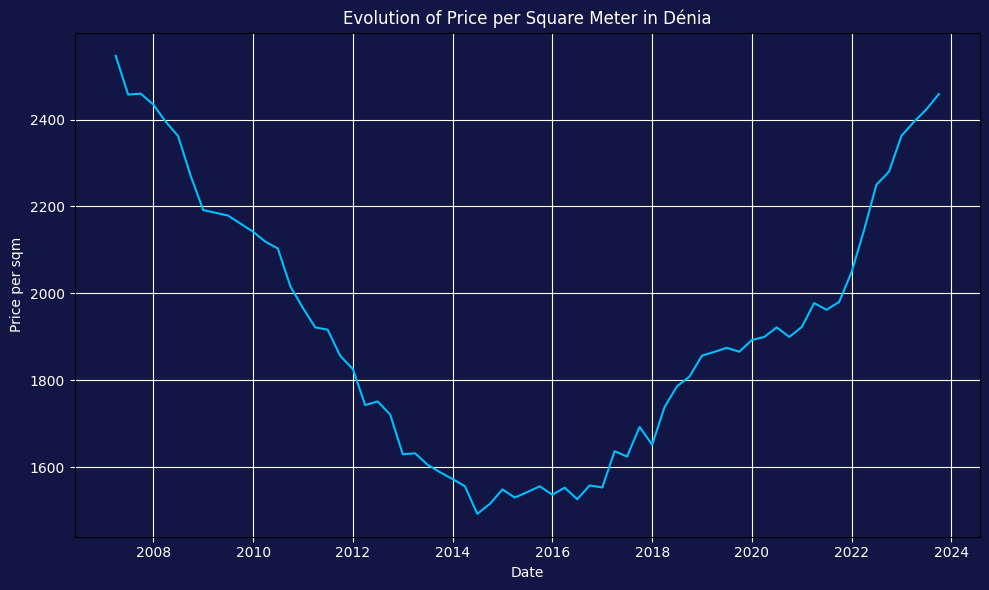

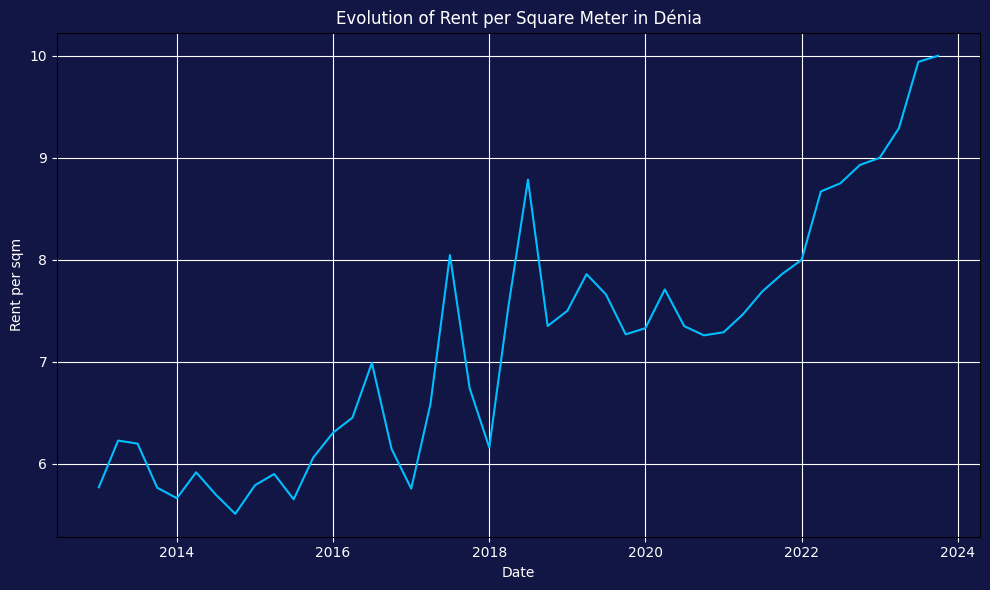

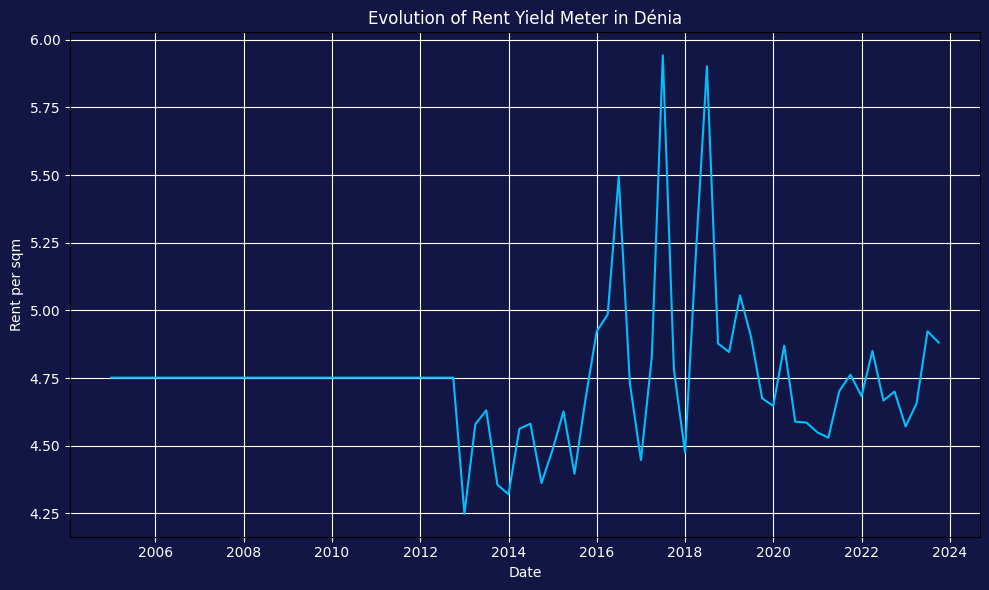

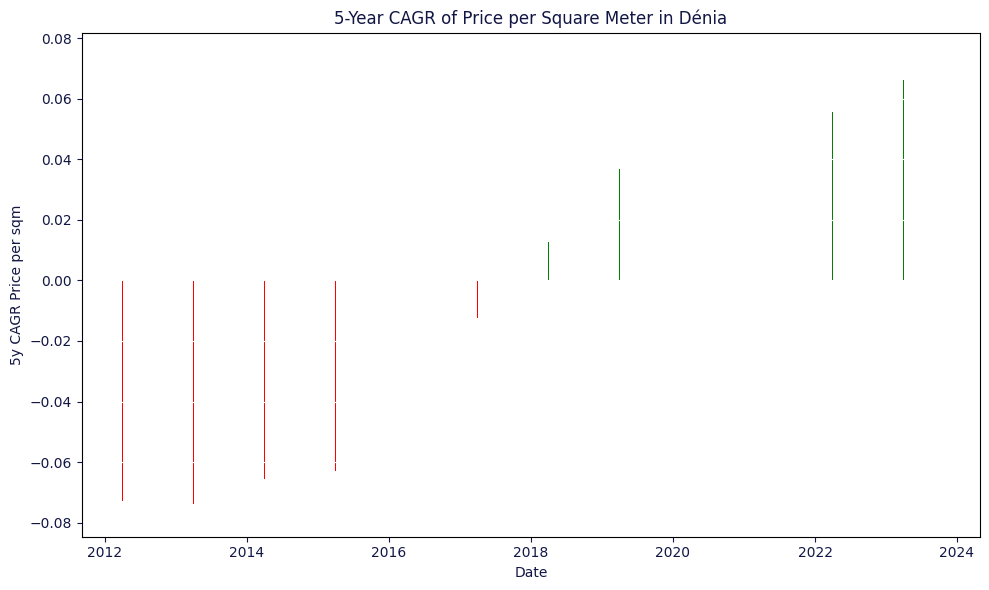

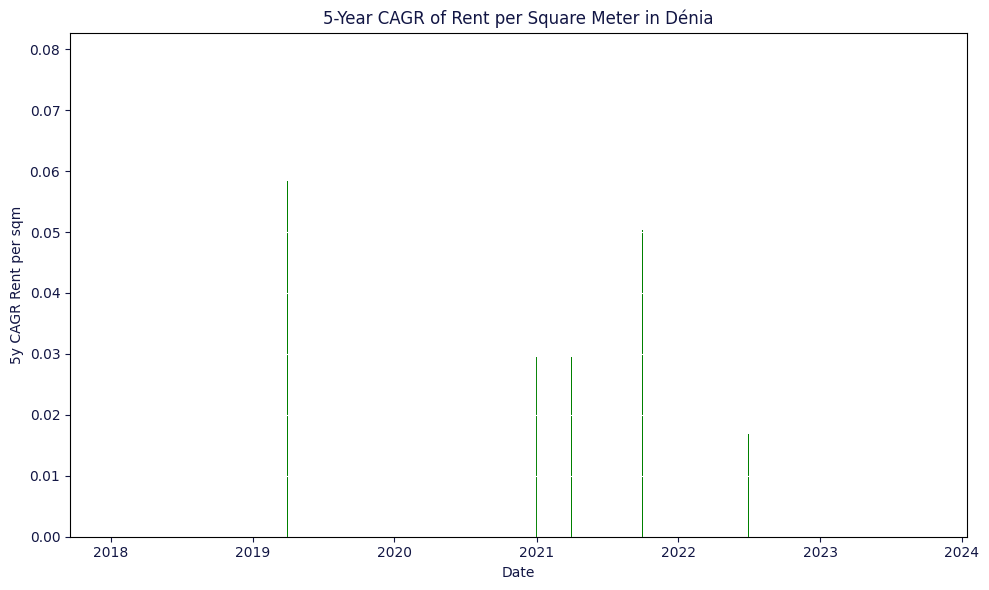

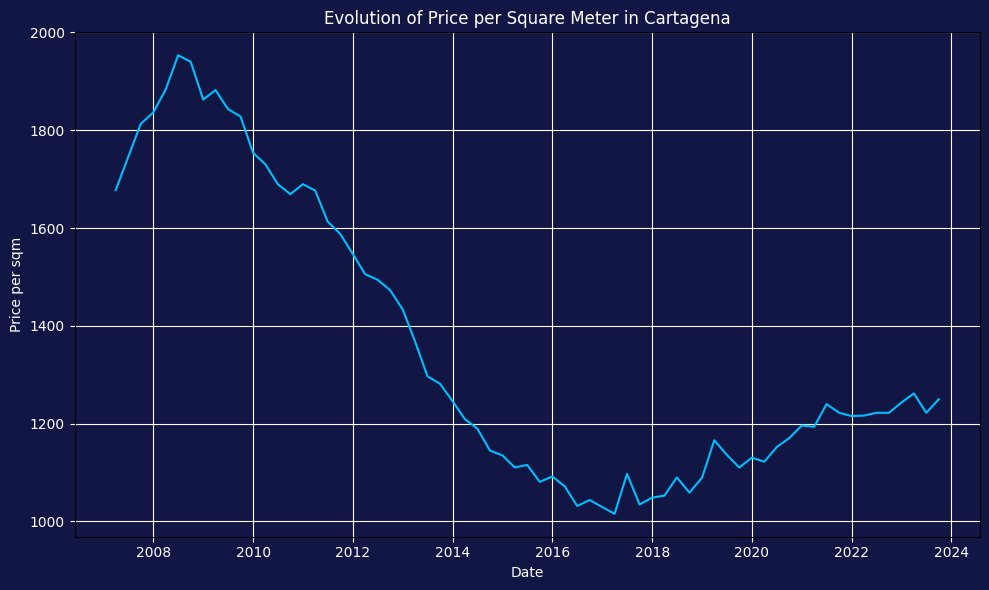

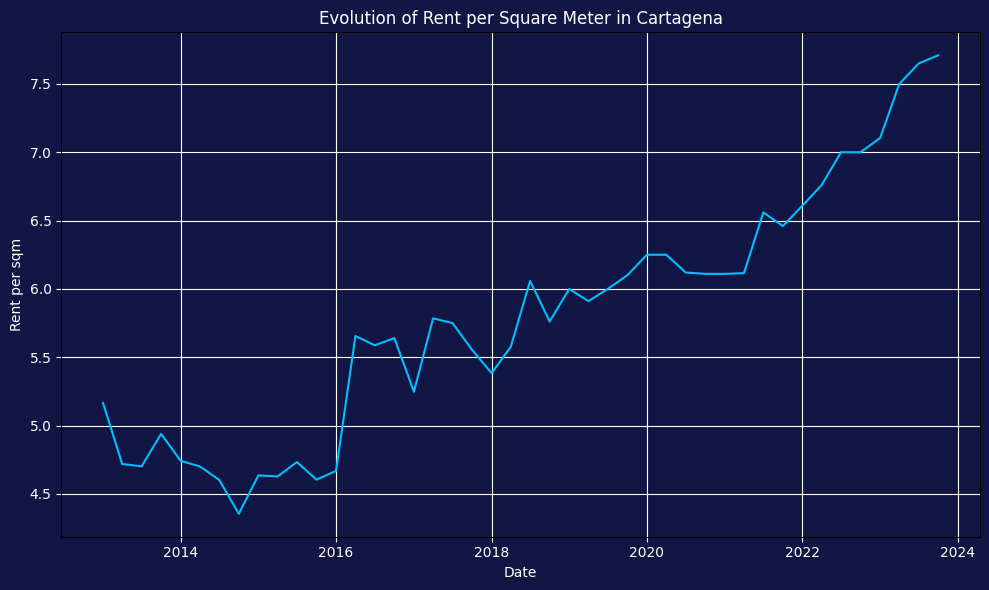

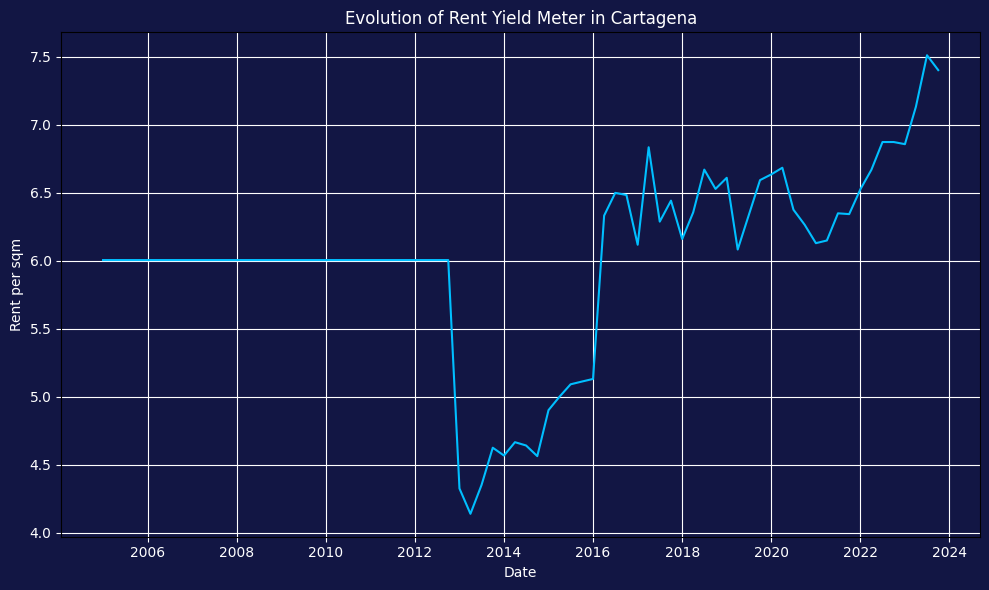

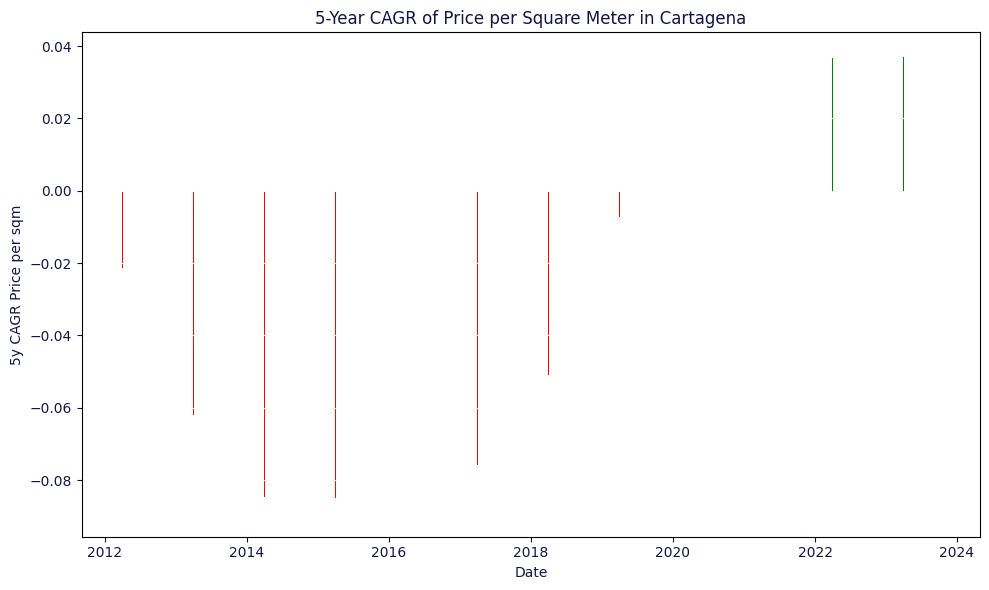

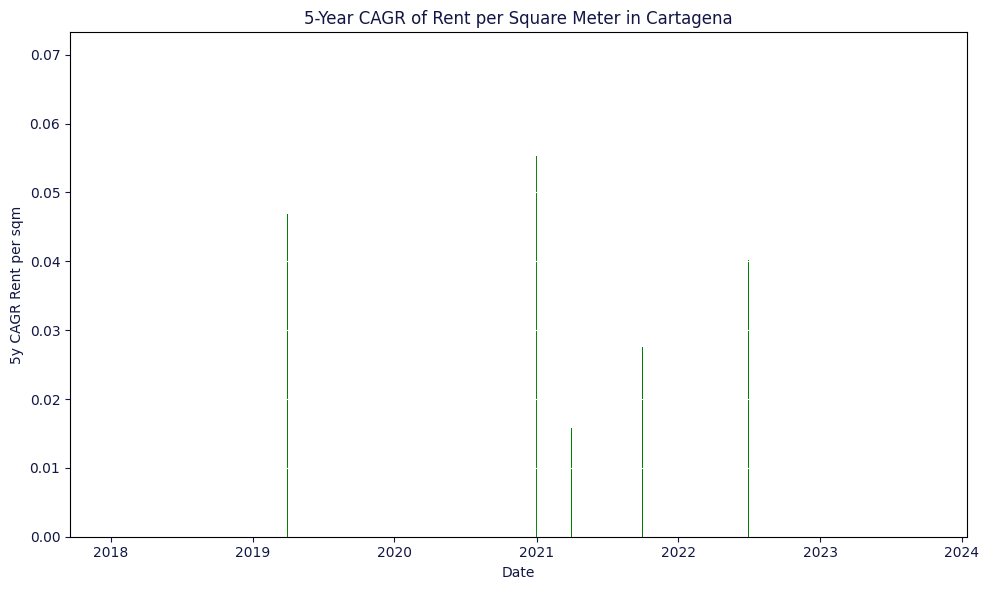

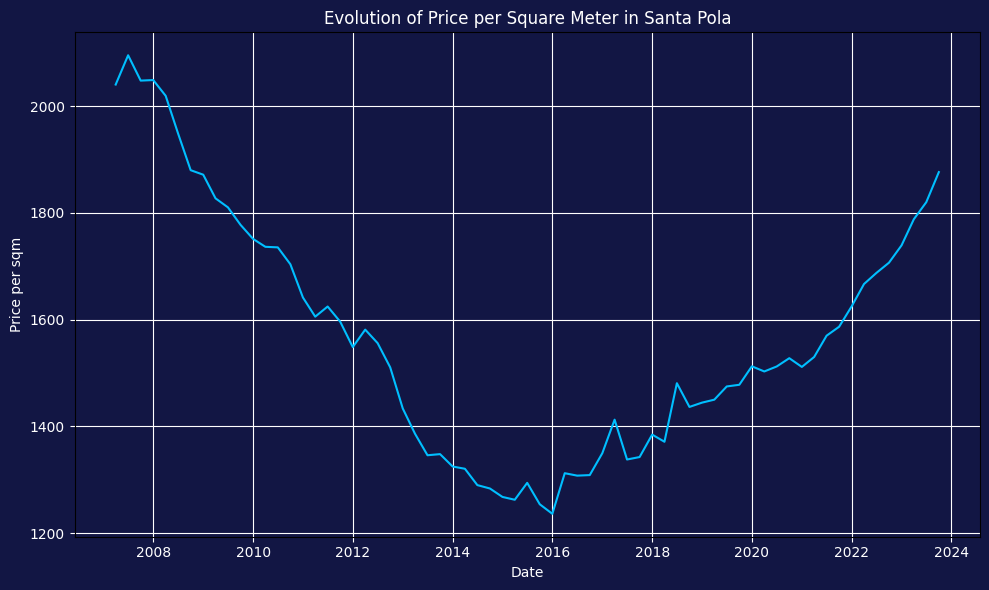

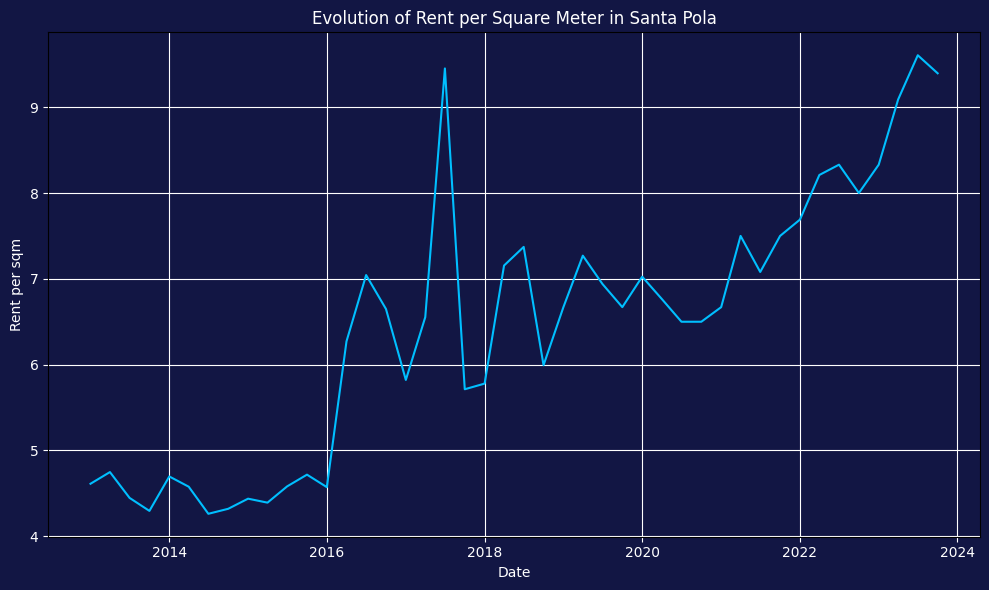

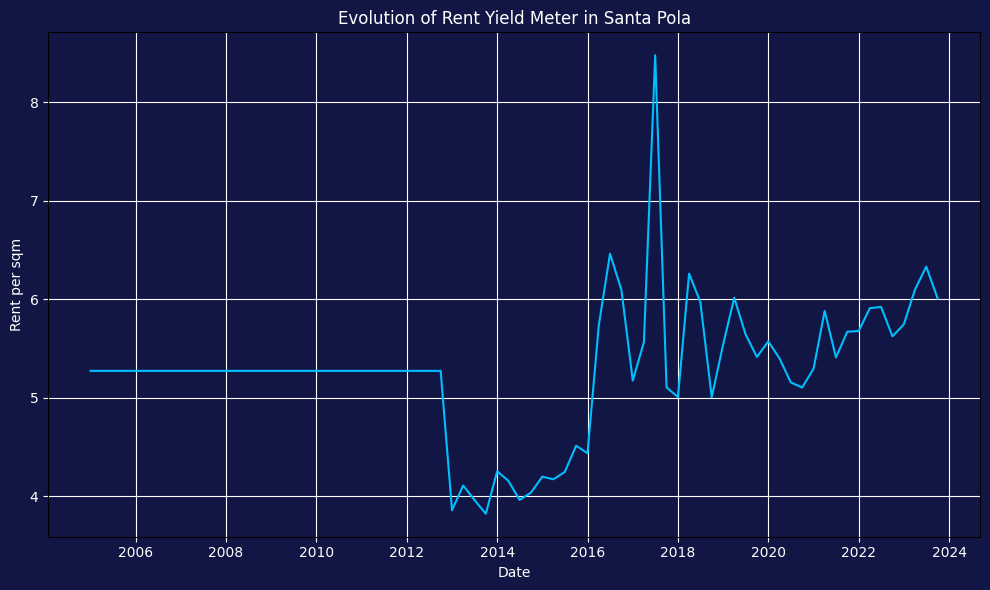

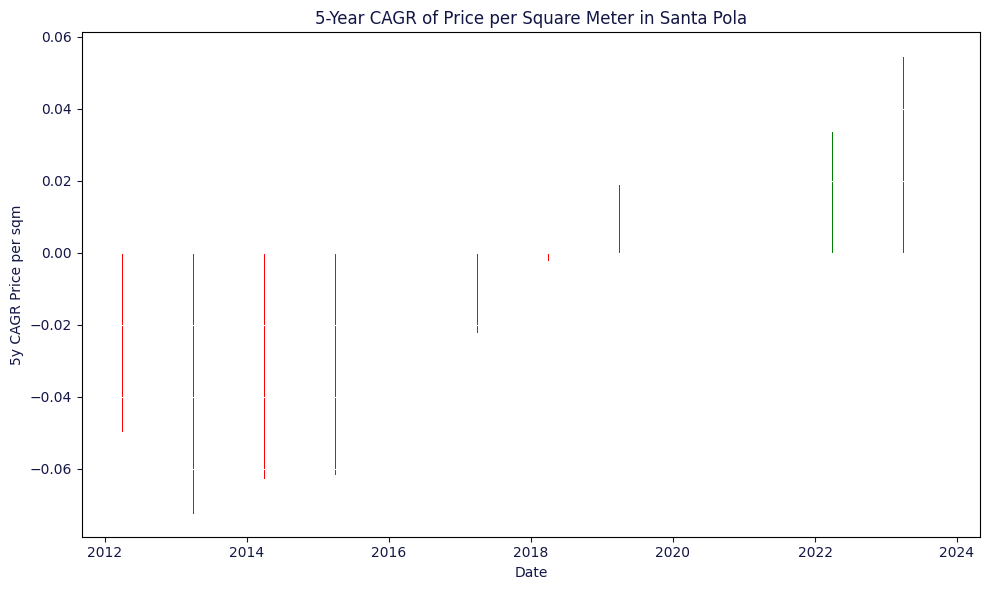

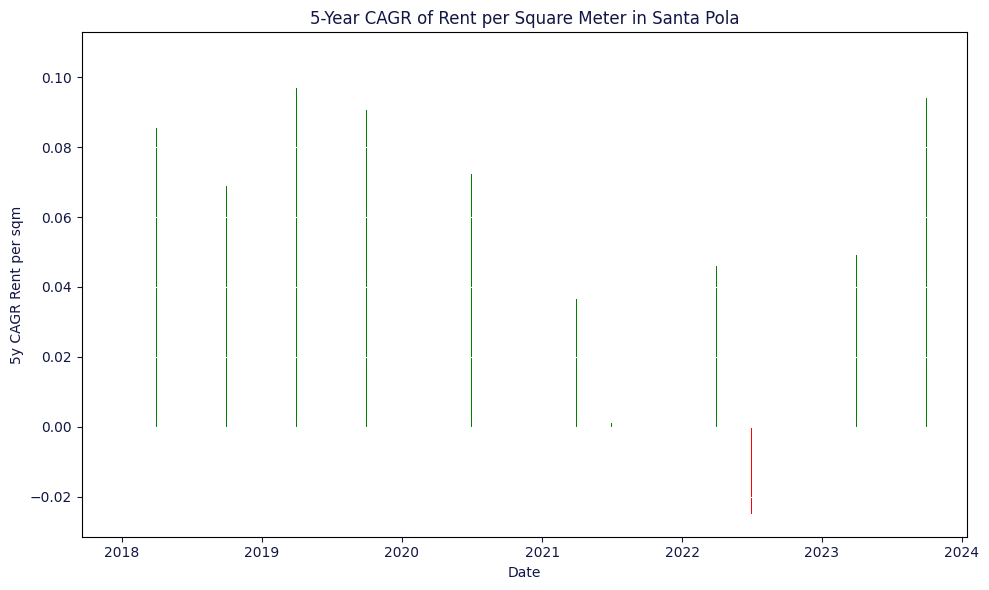

In [76]:
# Function to create visualizations for each city
def create_visualizations(top_10_cities_values):
    for city in top_10_cities_values:
        # Filter data for the specific city (index level 3 is 'Town_name')
        filtered_df = top_provinces.loc[top_provinces.index.get_level_values(3) == city]

        # Plotting Price_per_sqm as a line chart
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(filtered_df.index.get_level_values(0), filtered_df['Price_per_sqm'], color='#00BFFF', label='Price per sqm')
        fig.patch.set_facecolor('#121644')
        ax.set_facecolor('#121644')
        ax.set_xlabel('Date', color='white')
        ax.set_ylabel('Price per sqm', color='white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(True, color='white')
        ax.set_title(f'Evolution of Price per Square Meter in {city}', color='white')
        plt.tight_layout()
        plt.show()

        # Plotting Rent_per_sqm as a line chart
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(filtered_df.index.get_level_values(0), filtered_df['Rent_per_sqm'], color='#00BFFF', label='Rent per sqm')
        fig.patch.set_facecolor('#121644')
        ax.set_facecolor('#121644')
        ax.set_xlabel('Date', color='white')
        ax.set_ylabel('Rent per sqm', color='white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(True, color='white')
        ax.set_title(f'Evolution of Rent per Square Meter in {city}', color='white')
        plt.tight_layout()
        plt.show()

        # Plotting Rent_Yield as a line chart
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(filtered_df.index.get_level_values(0), filtered_df['Rent_Yield'], color='#00BFFF', label='Rent Yield')
        fig.patch.set_facecolor('#121644')
        ax.set_facecolor('#121644')
        ax.set_xlabel('Date', color='white')
        ax.set_ylabel('Rent per sqm', color='white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(True, color='white')
        ax.set_title(f'Evolution of Rent Yield Meter in {city}', color='white')
        plt.tight_layout()
        plt.show()


        # Plotting 5y_CAGR_price_sqm as a bar chart (green for positive, red for negative)
        fig, ax = plt.subplots(figsize=(10, 6))
        cagr_price = filtered_df['5y_CAGR_price_sqm']
        colors = ['green' if val > 0 else 'red' for val in cagr_price]
        ax.bar(filtered_df.index.get_level_values(0), cagr_price, color=colors)
        fig.patch.set_facecolor('white')
        ax.set_facecolor('white')
        ax.set_xlabel('Date', color='#121644')
        ax.set_ylabel('5y CAGR Price per sqm', color='#121644')
        ax.tick_params(axis='x', colors='#121644')
        ax.tick_params(axis='y', colors='#121644')
        ax.grid(True, color='white')
        ax.set_title(f'5-Year CAGR of Price per Square Meter in {city}', color='#121644')
        plt.tight_layout()
        plt.show()

        # Plotting 5y_CAGR_rent_sqm as a bar chart (green for positive, red for negative)
        fig, ax = plt.subplots(figsize=(10, 6))
        cagr_rent = filtered_df['5y_CAGR_rent_sqm']
        colors = ['green' if val > 0 else 'red' for val in cagr_rent]
        ax.bar(filtered_df.index.get_level_values(0), cagr_rent, color=colors)
        fig.patch.set_facecolor('white')
        ax.set_facecolor('white')
        ax.set_xlabel('Date', color='#121644')
        ax.set_ylabel('5y CAGR Rent per sqm', color='#121644')
        ax.tick_params(axis='x', colors='#121644')
        ax.tick_params(axis='y', colors='#121644')
        ax.grid(True, color='white')
        ax.set_title(f'5-Year CAGR of Rent per Square Meter in {city}', color='#121644')
        plt.tight_layout()
        plt.show()

# Call the function for the top 10 cities
create_visualizations(top_10_cities_values)


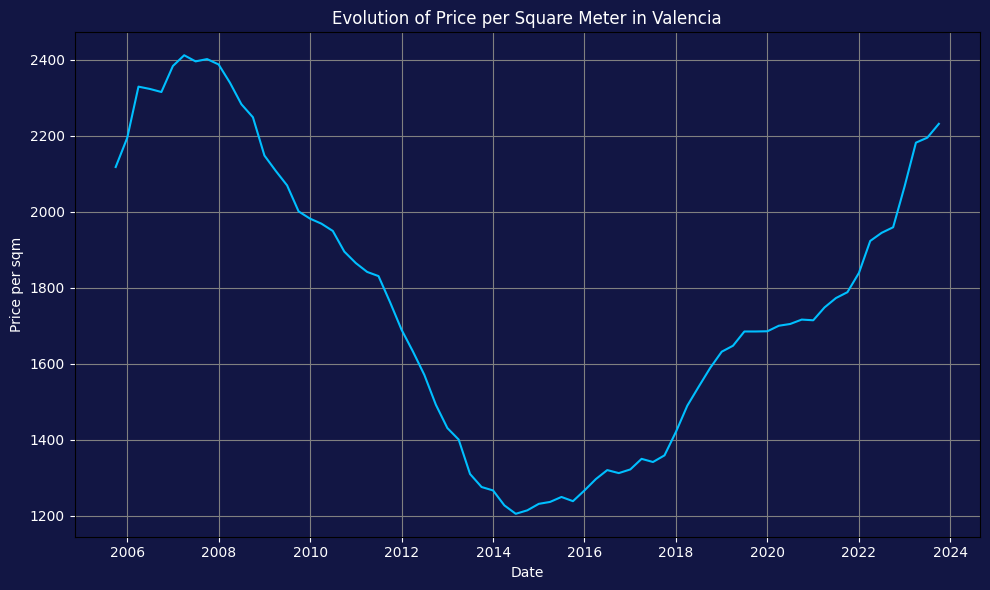

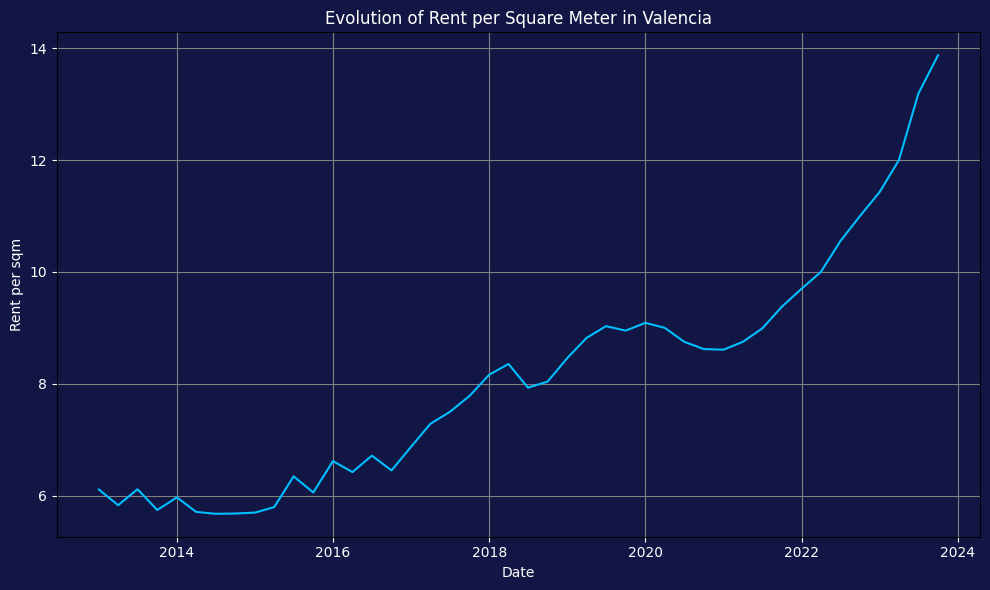

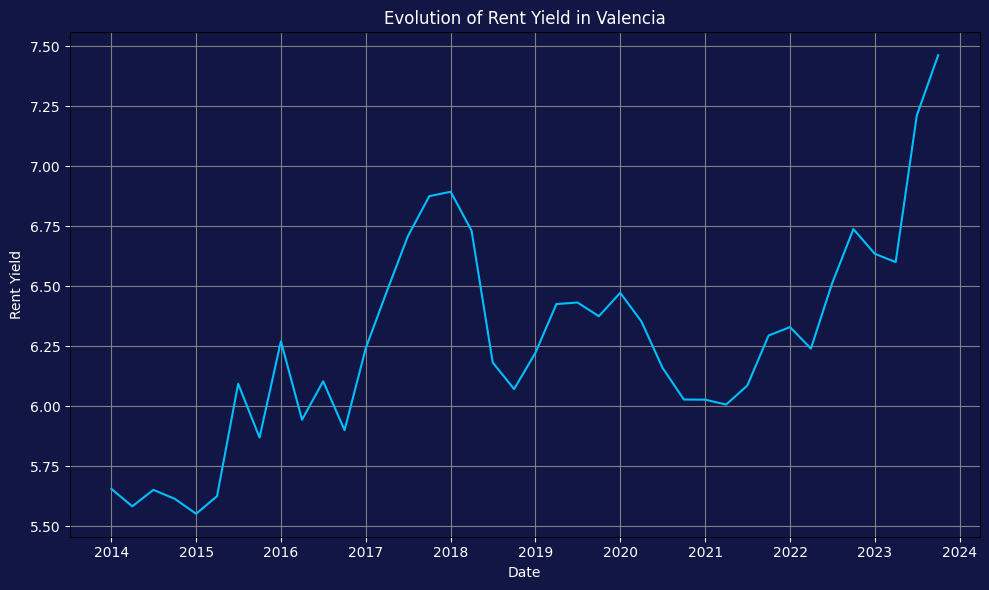

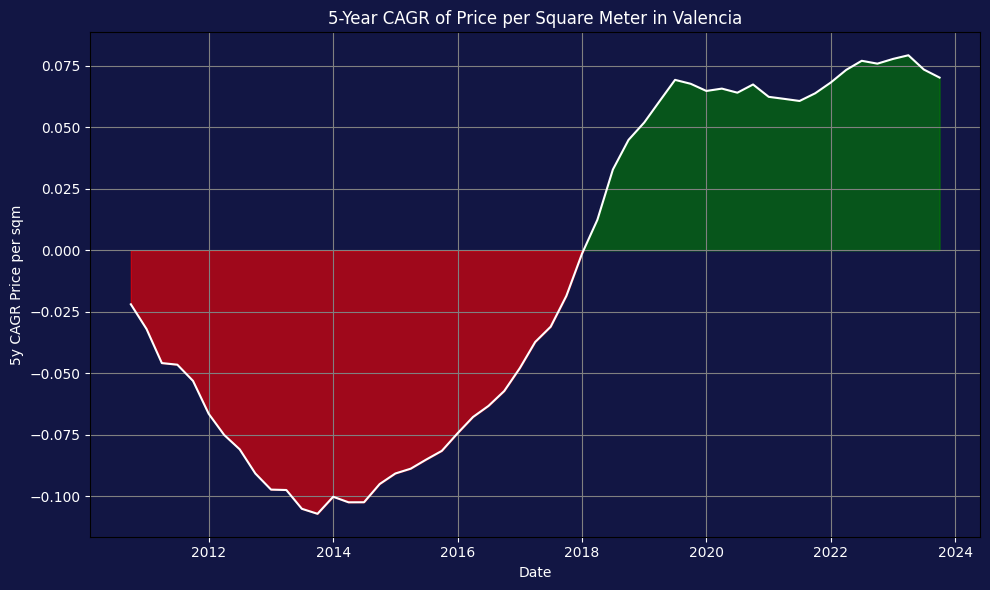

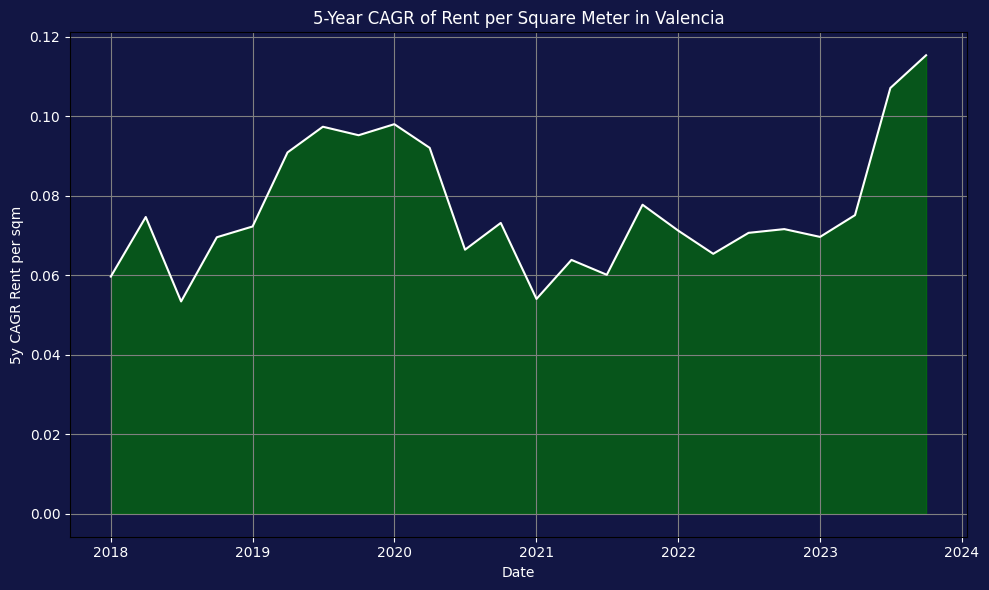

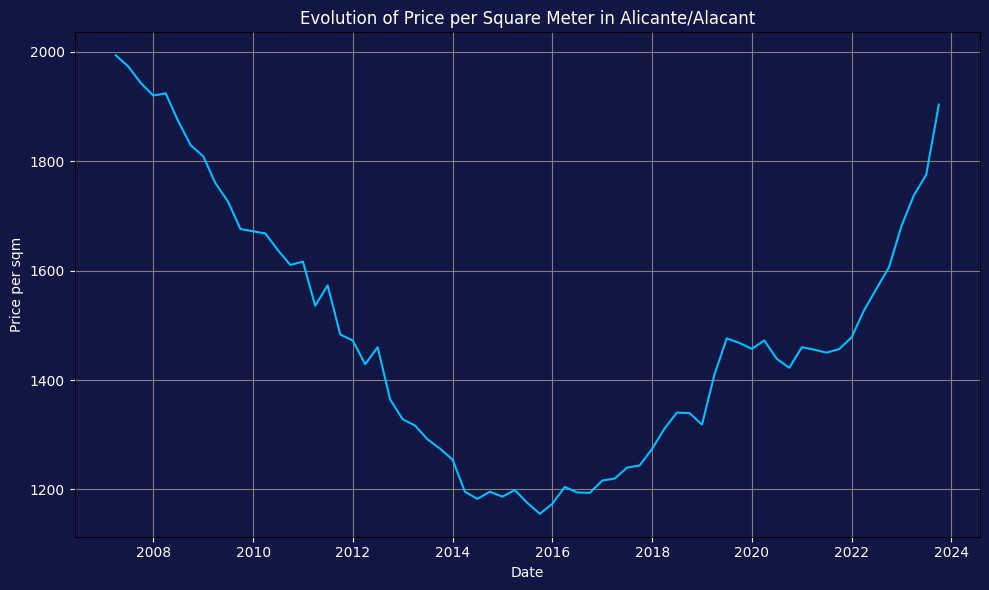

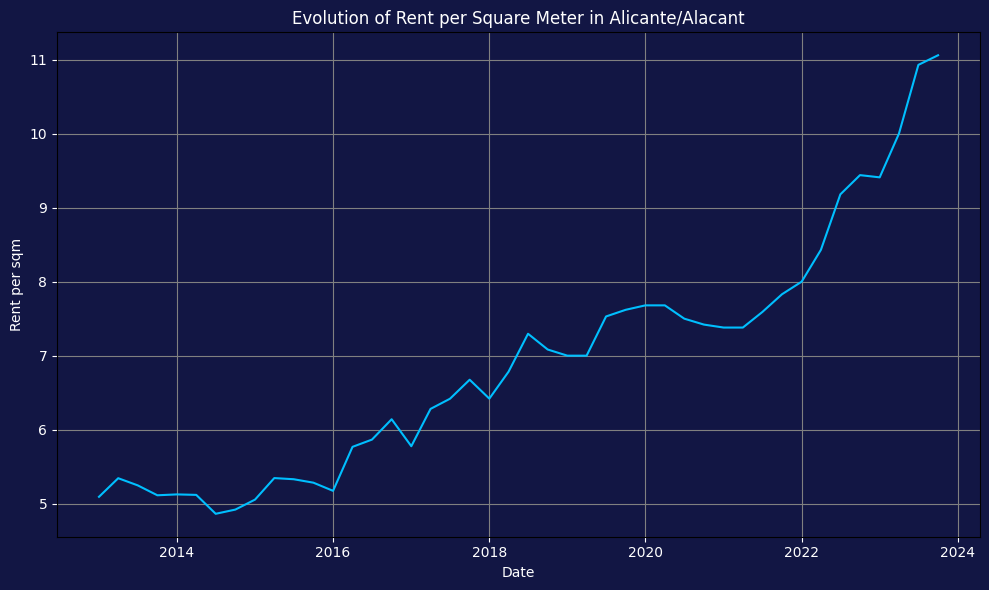

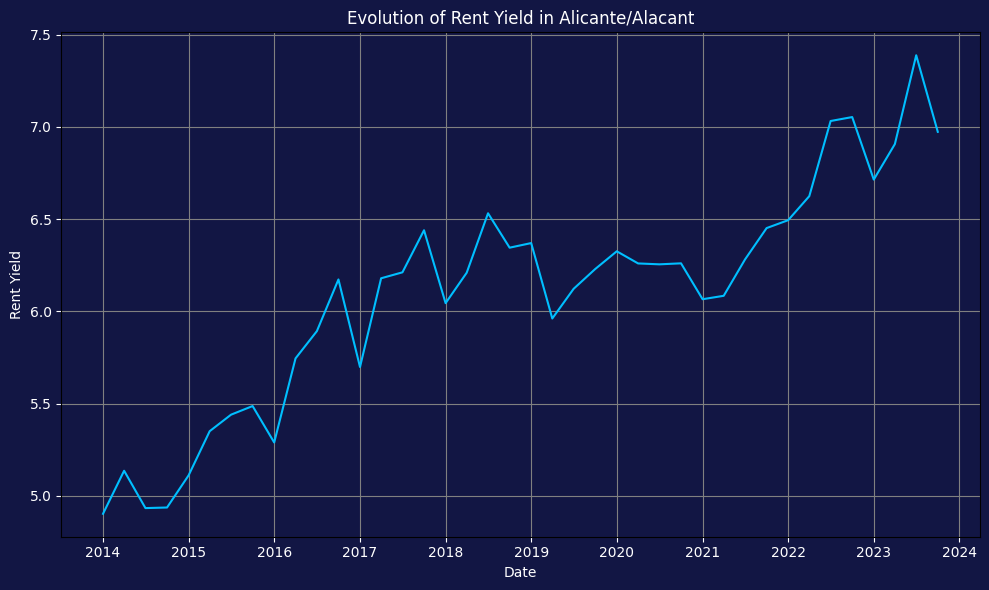

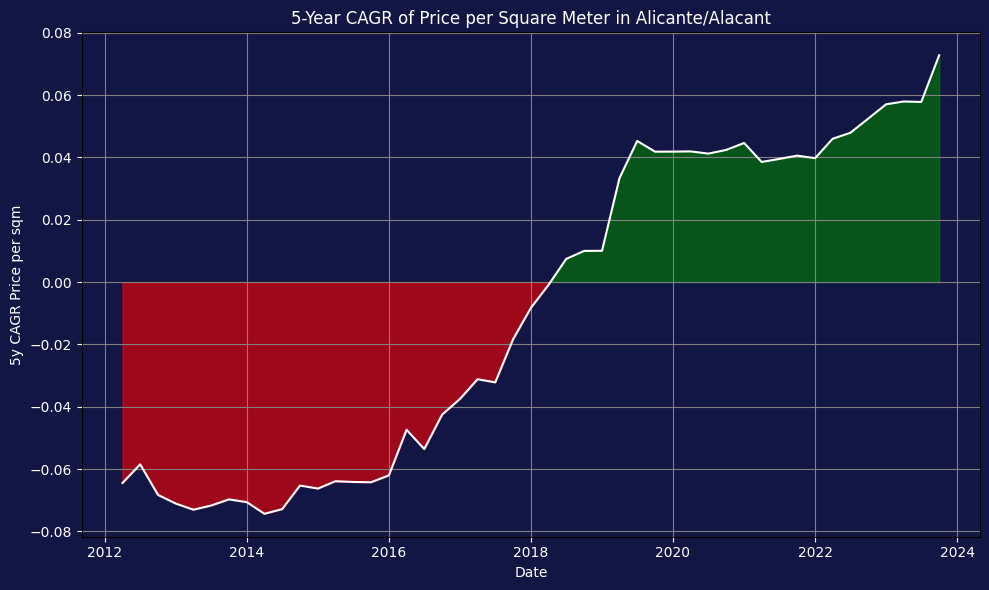

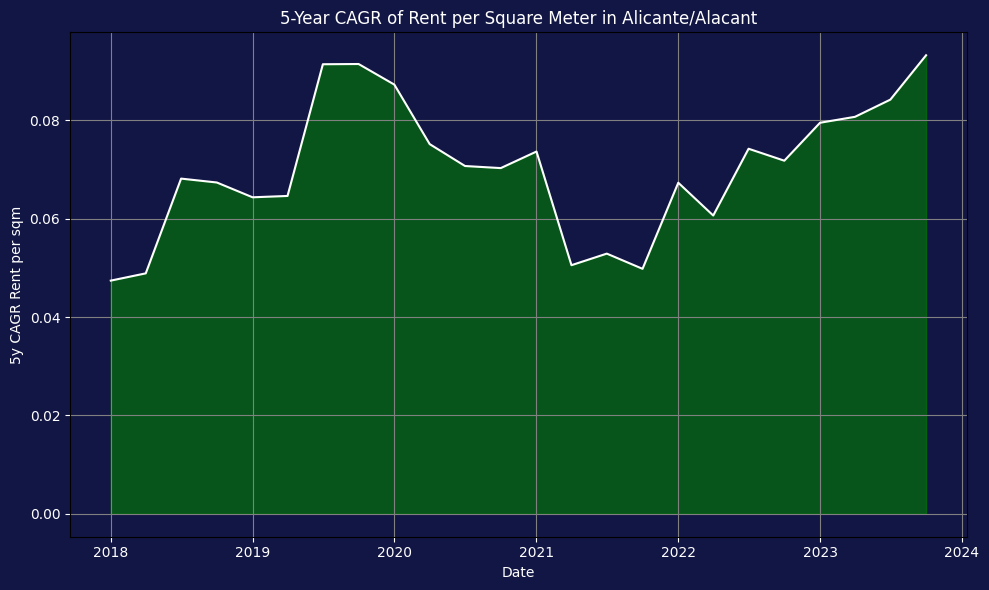

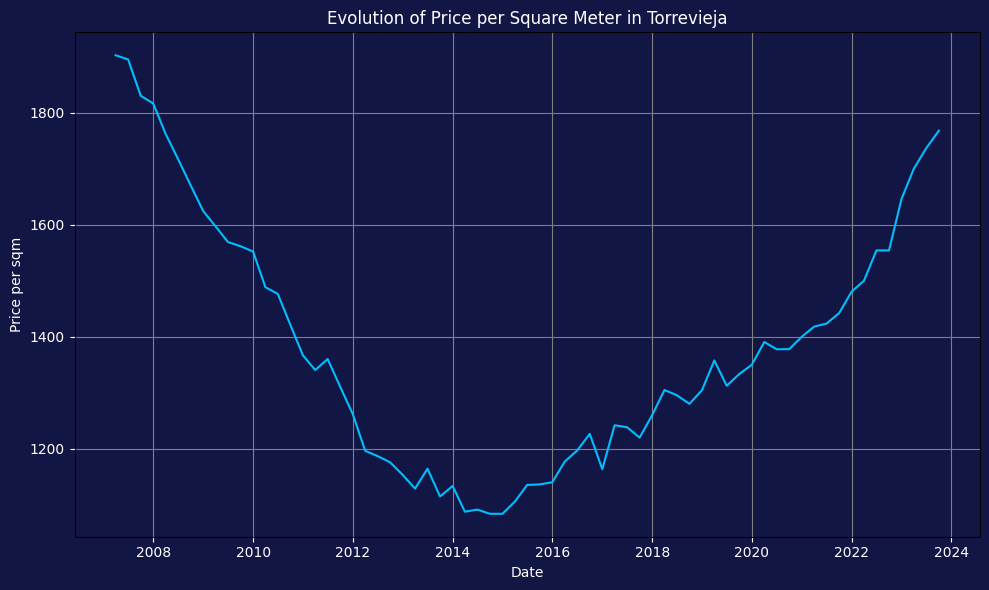

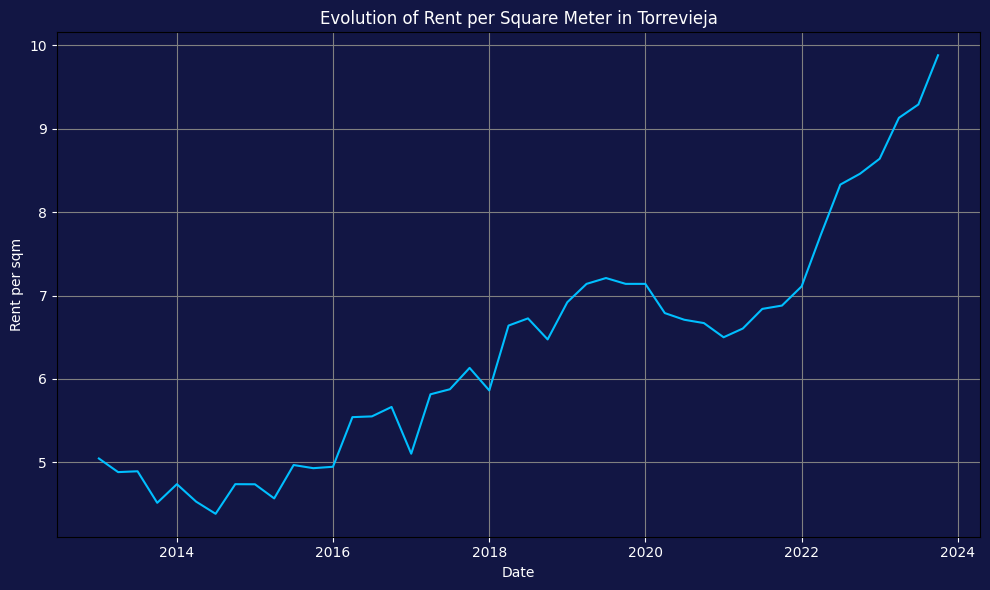

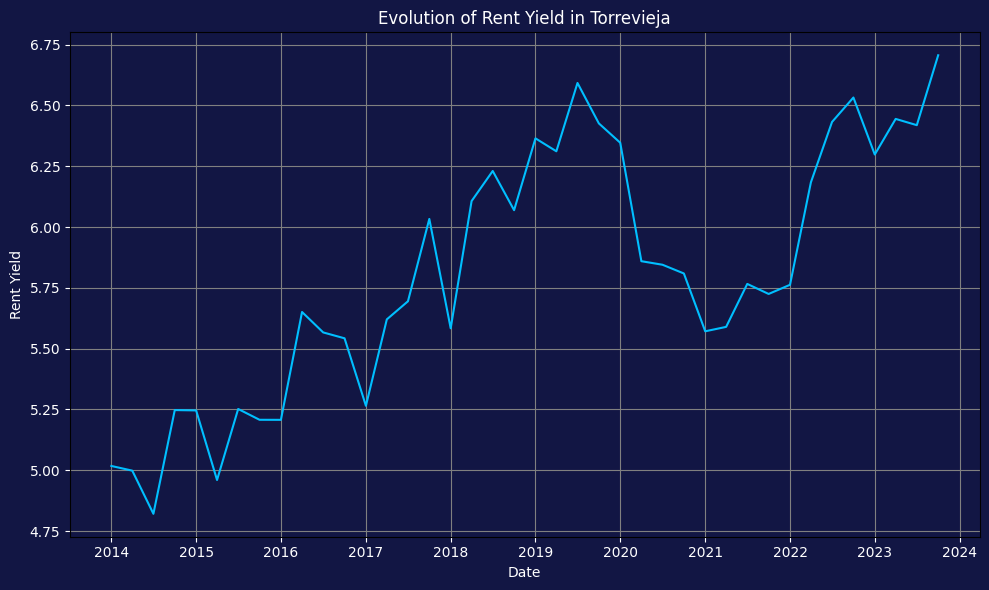

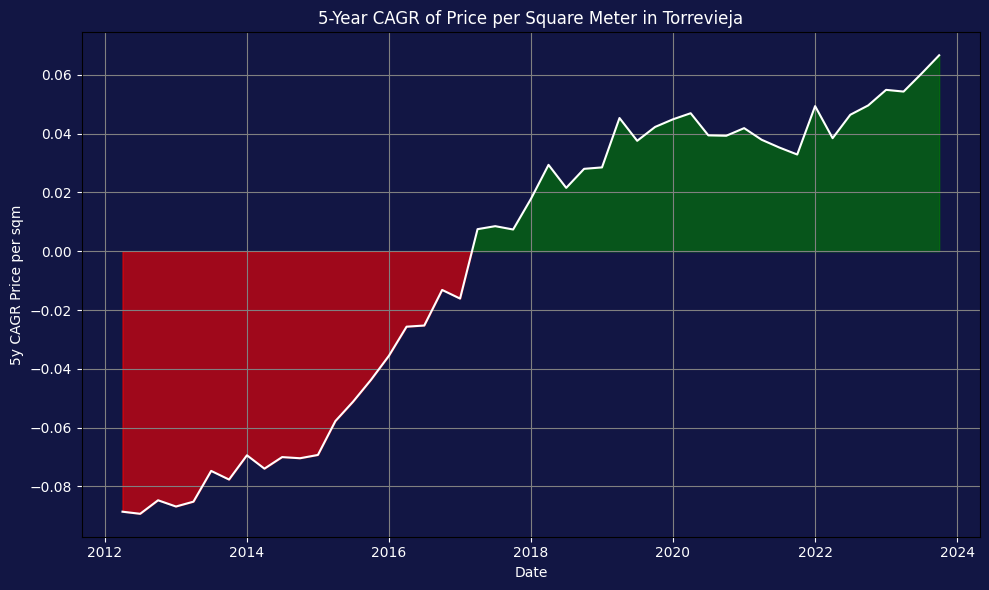

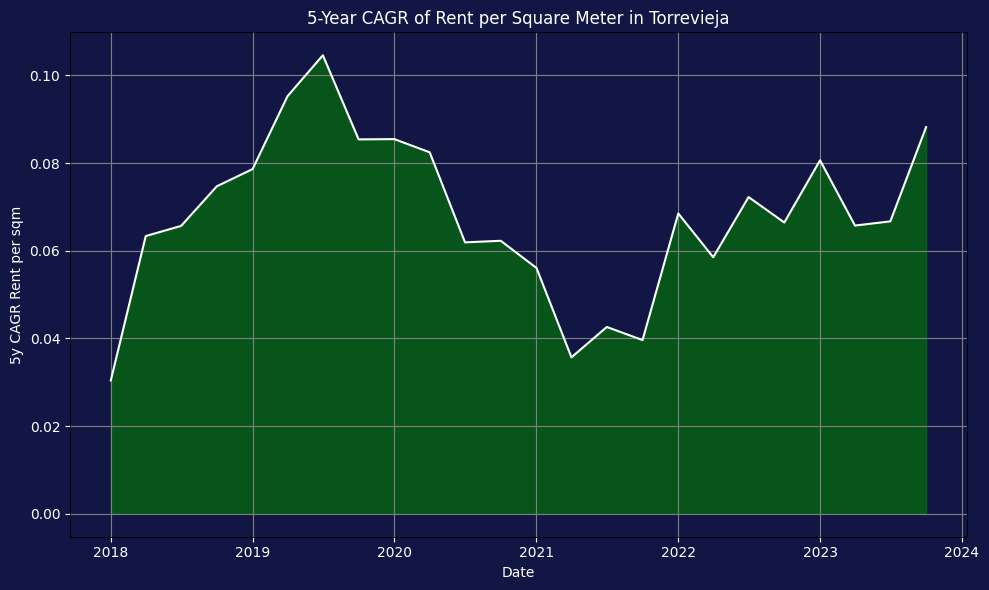

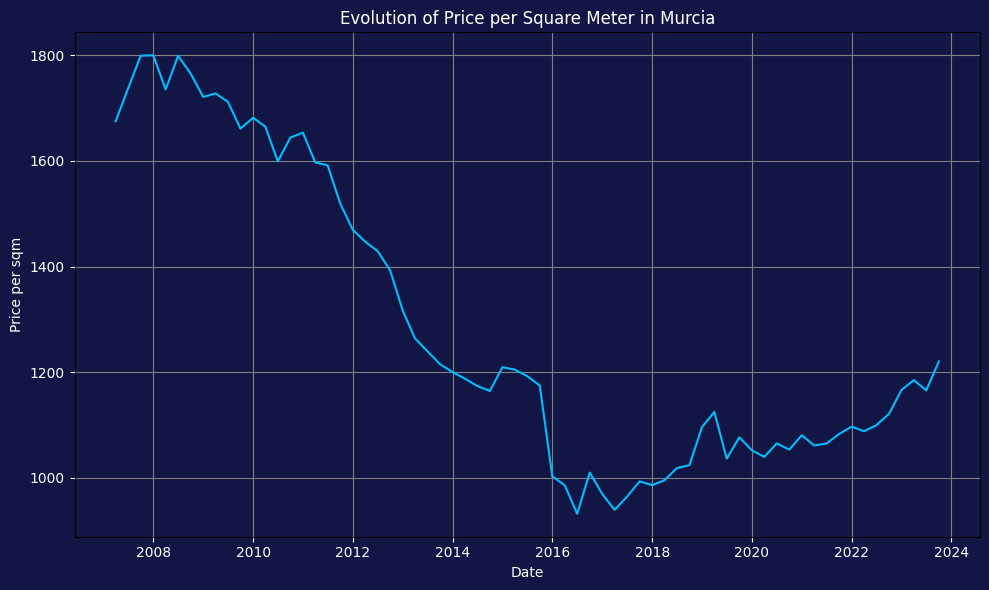

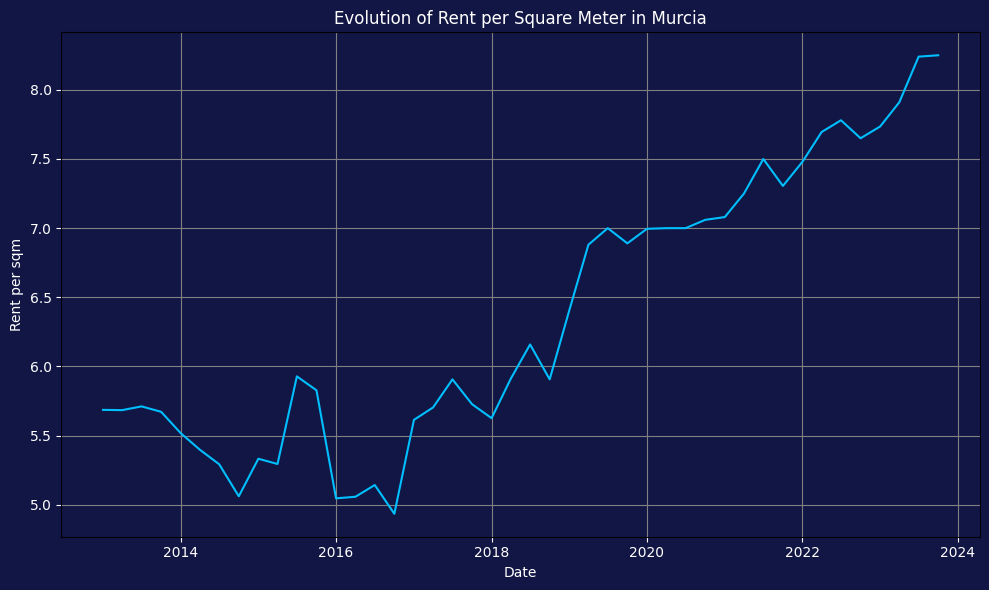

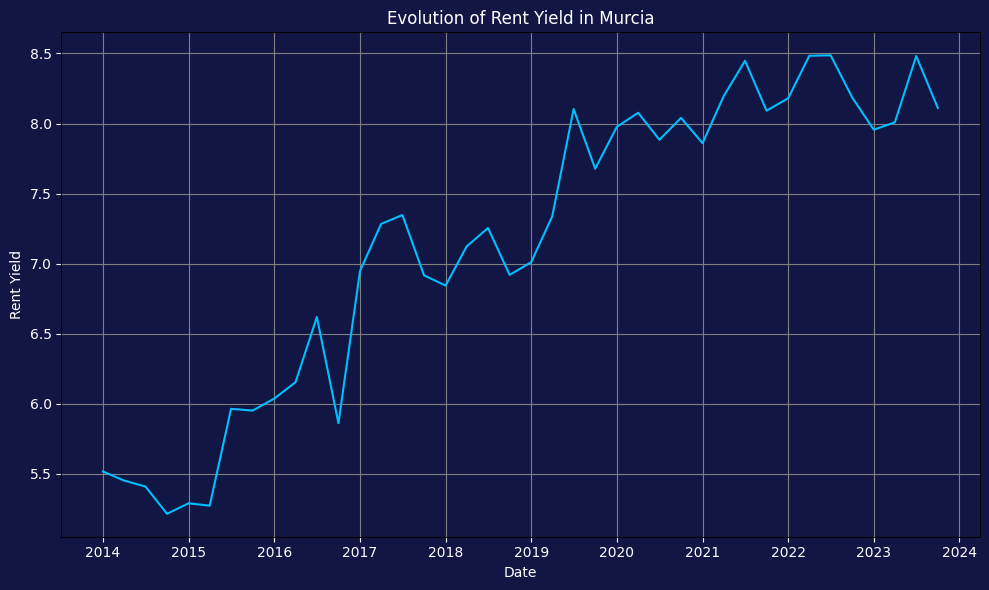

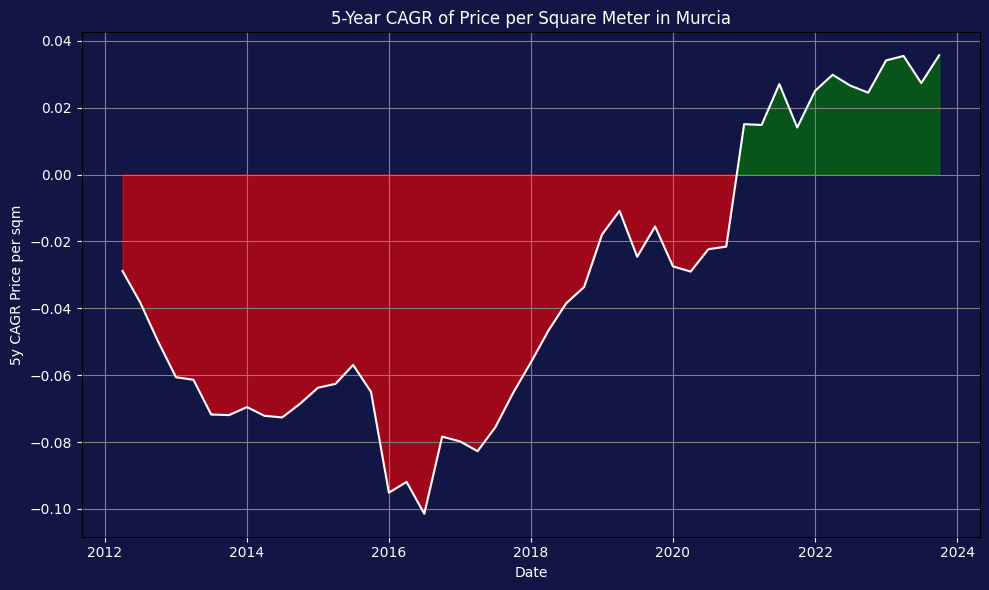

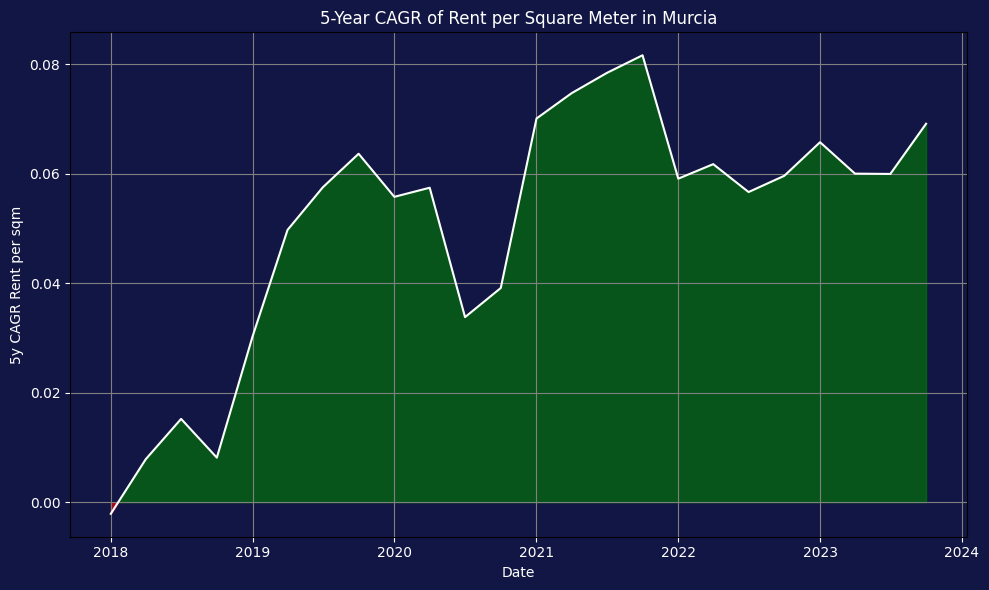

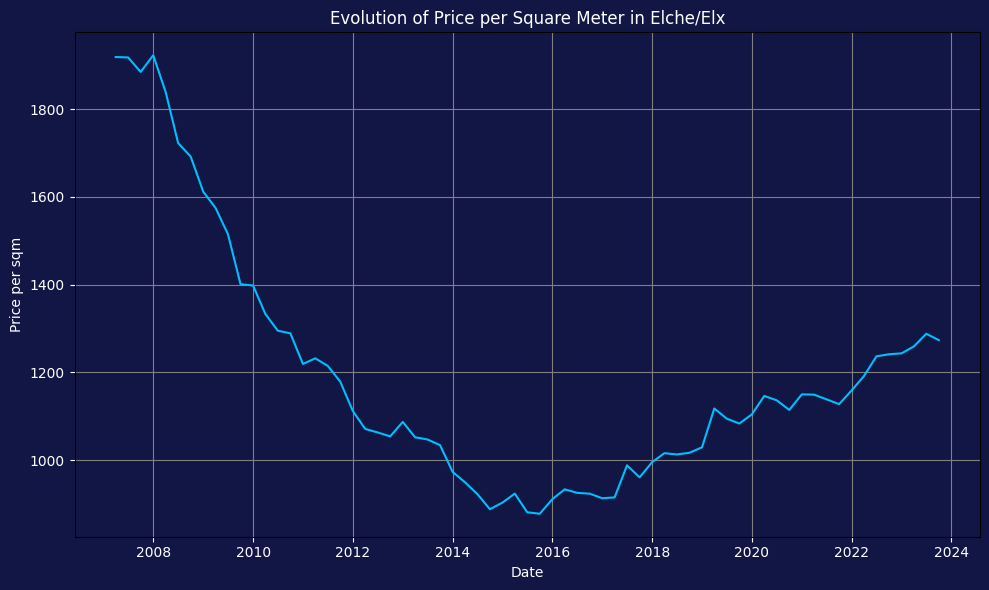

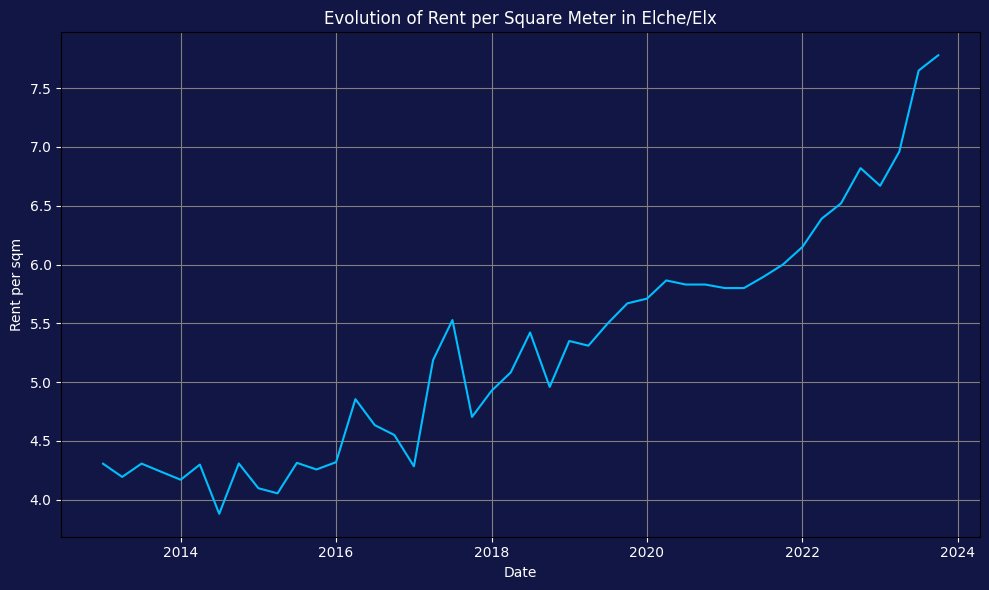

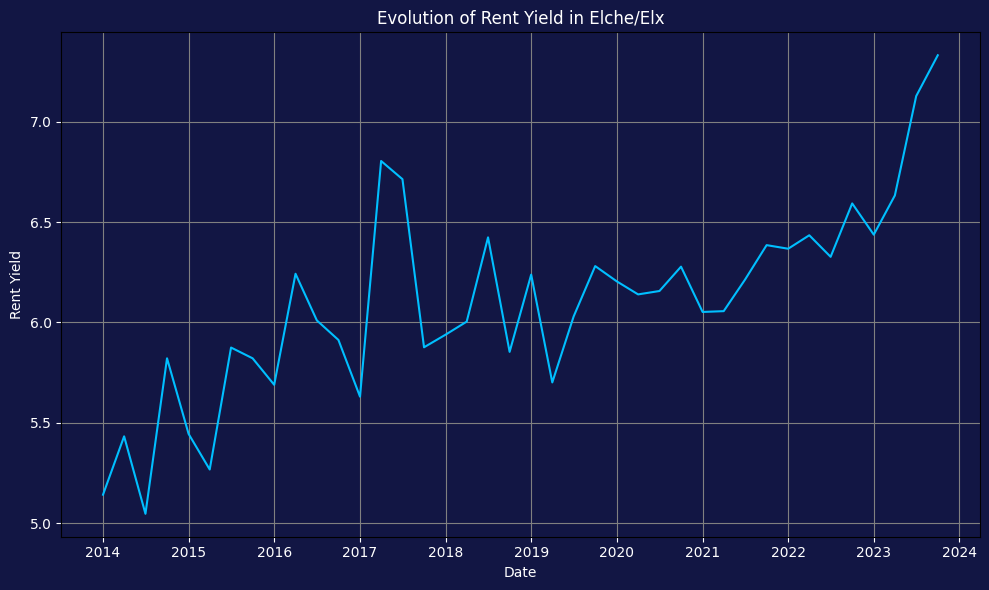

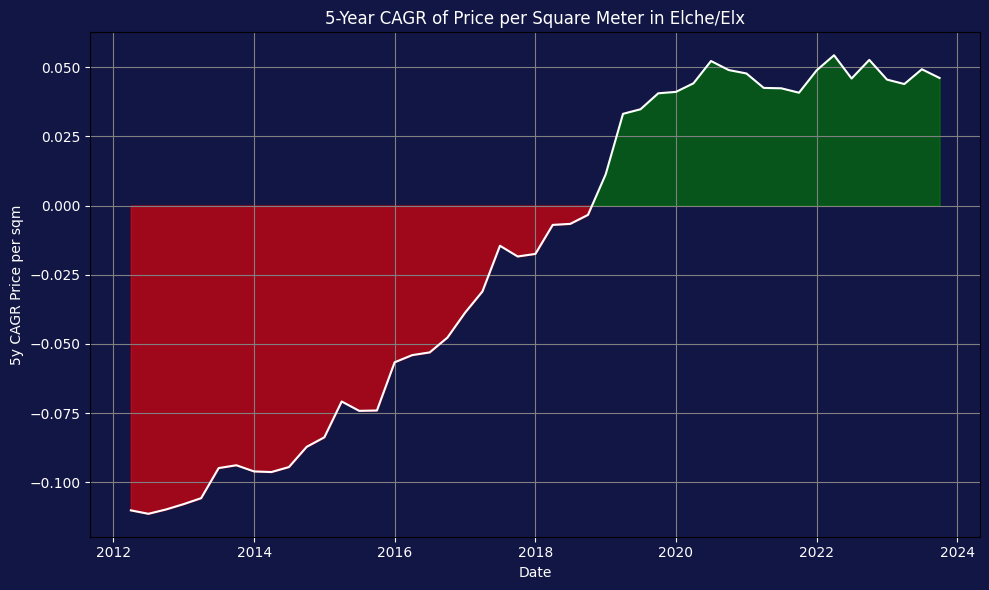

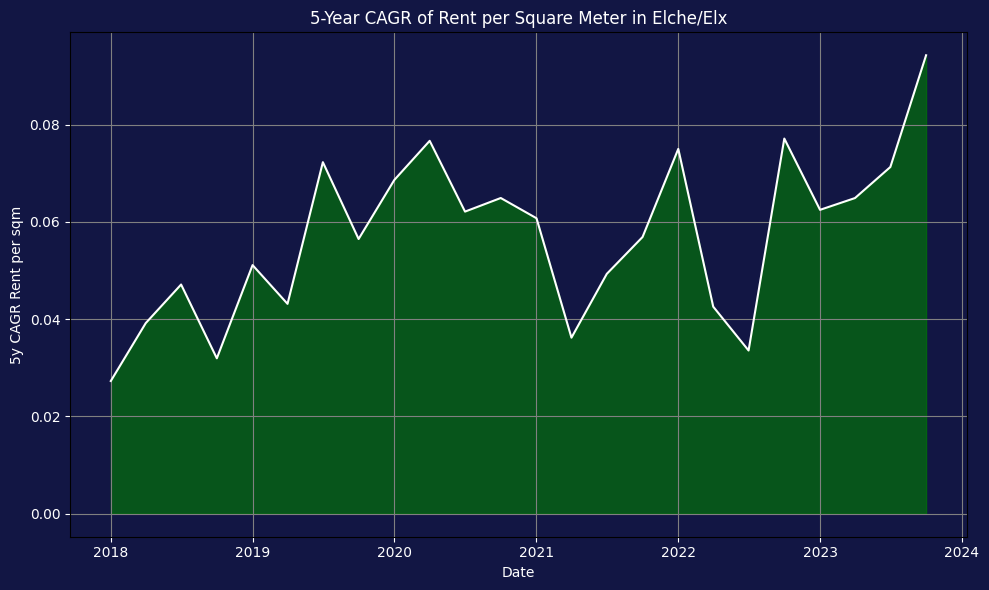

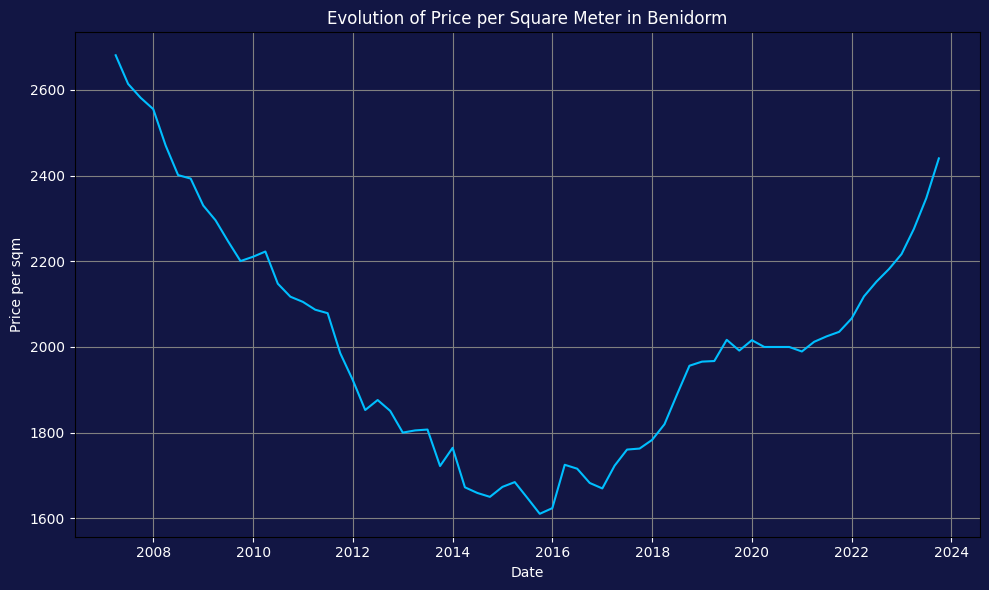

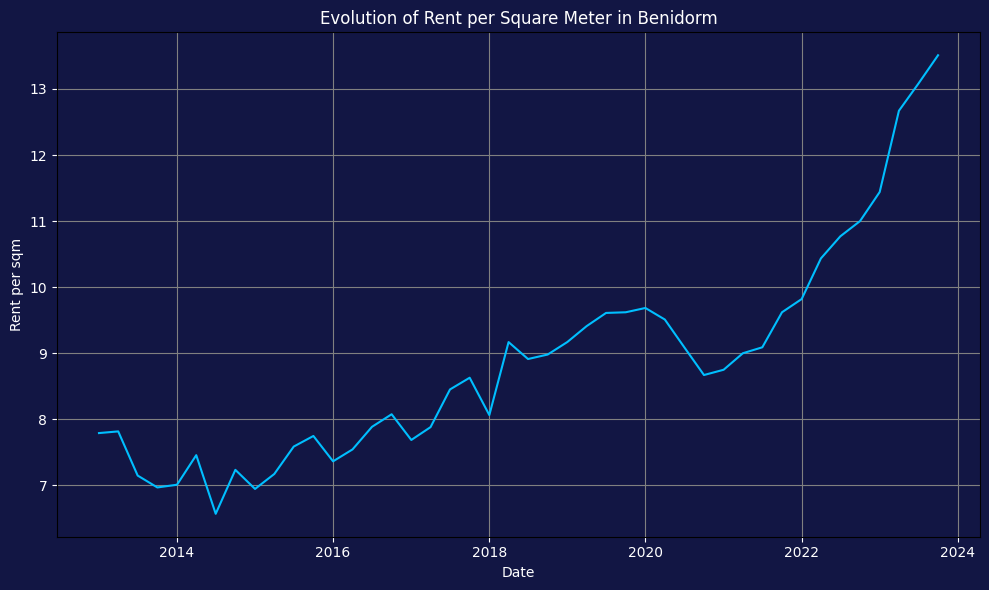

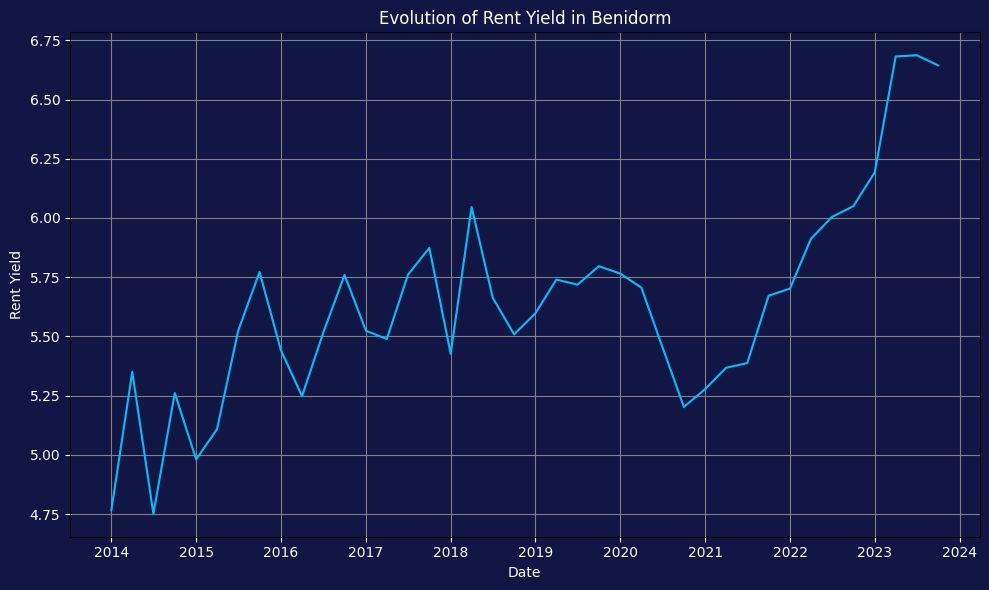

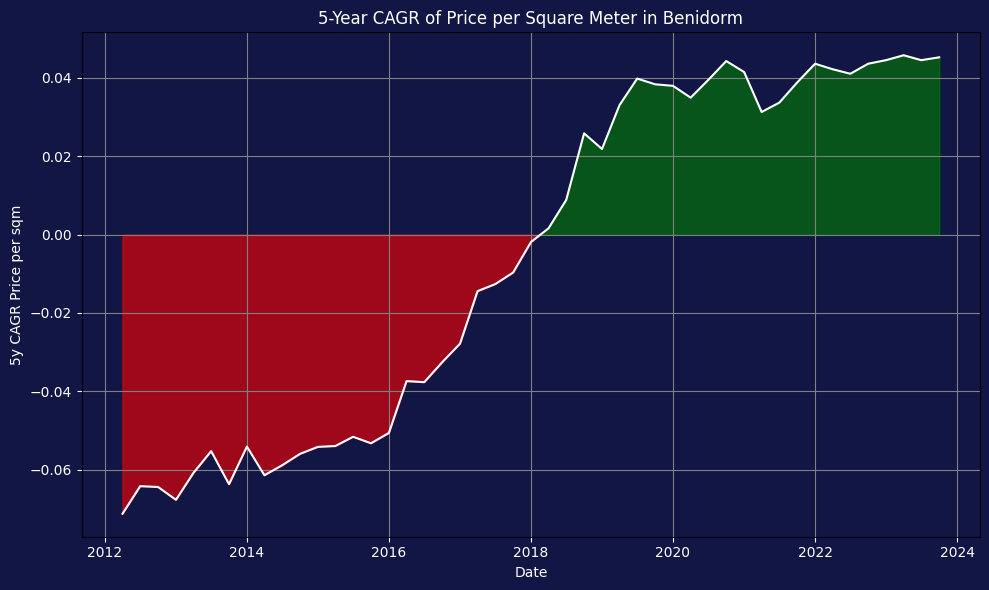

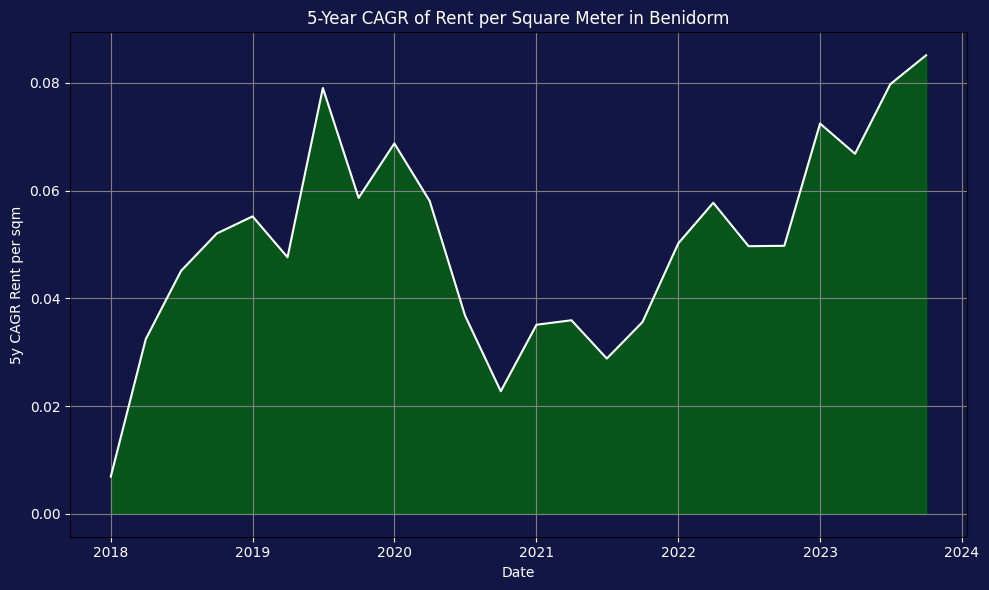

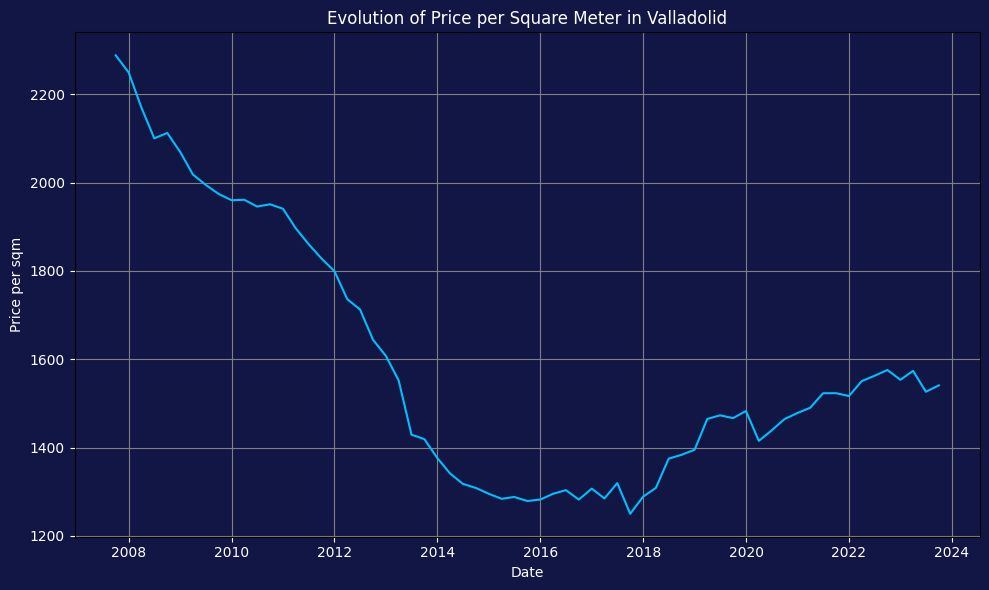

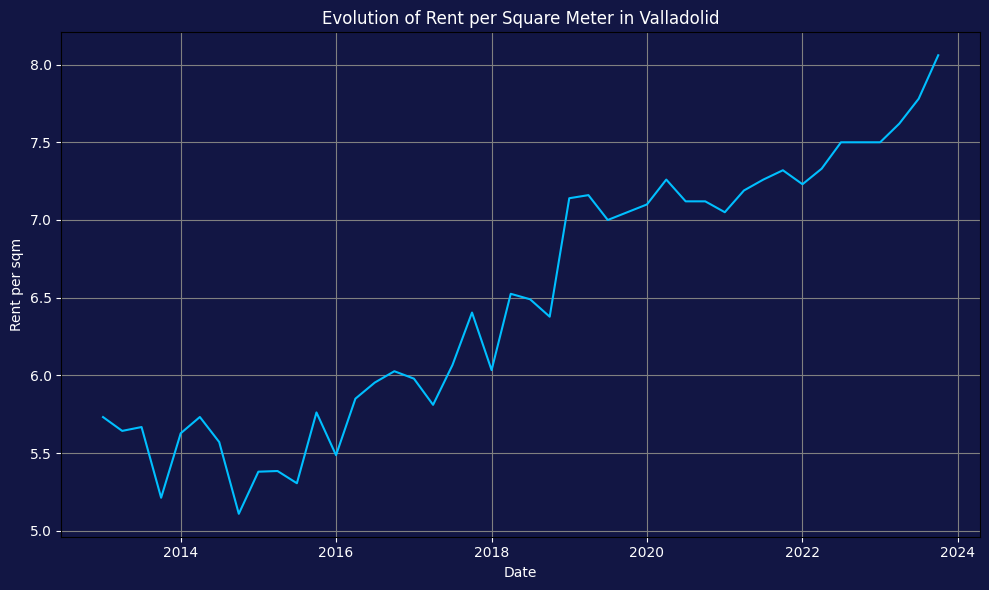

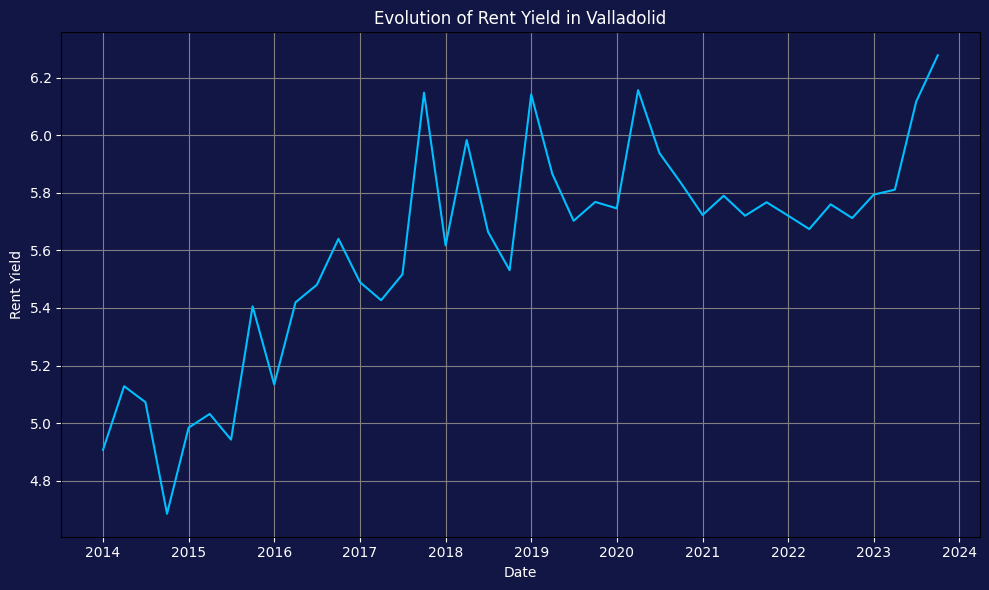

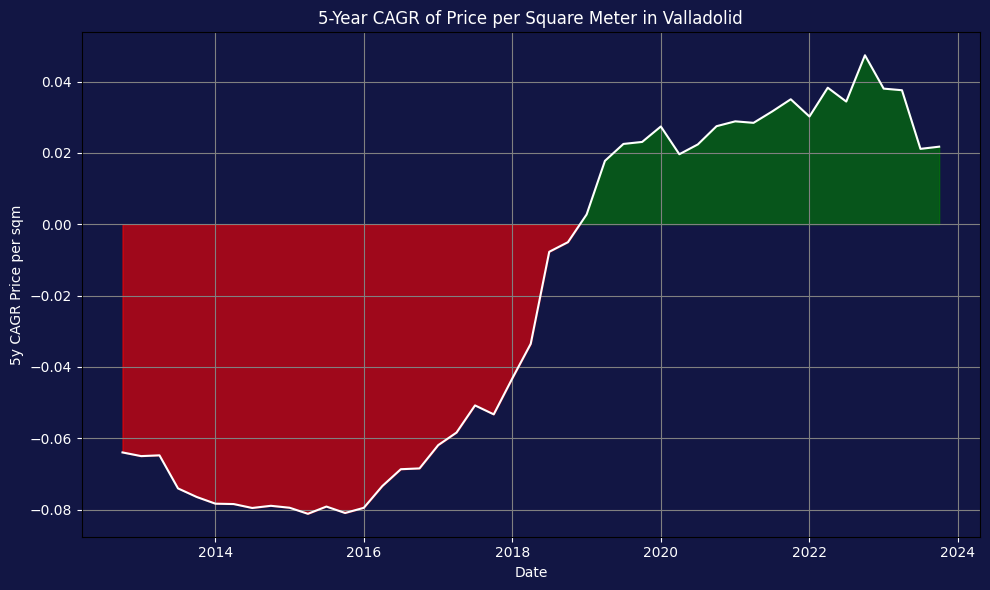

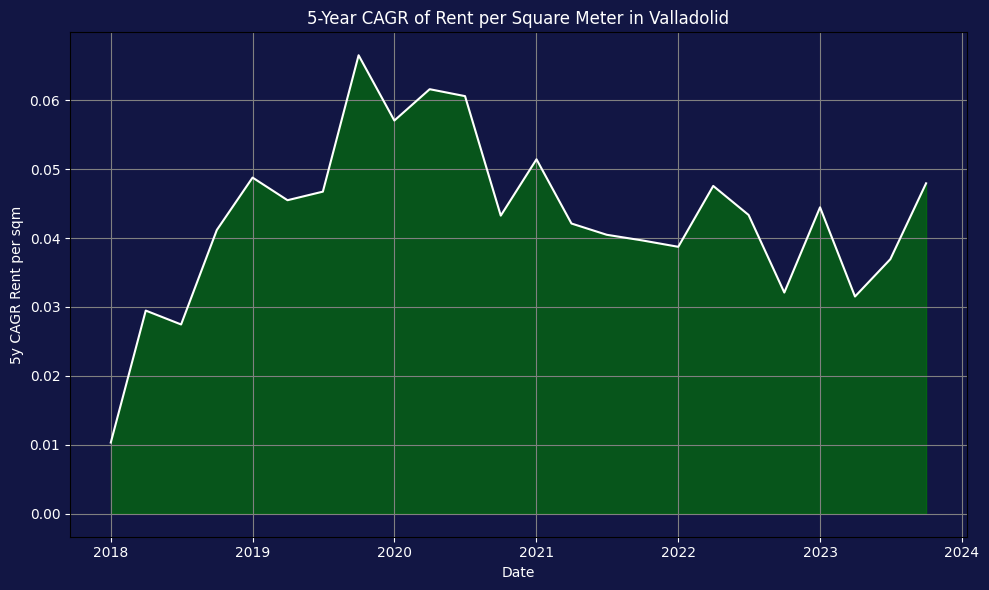

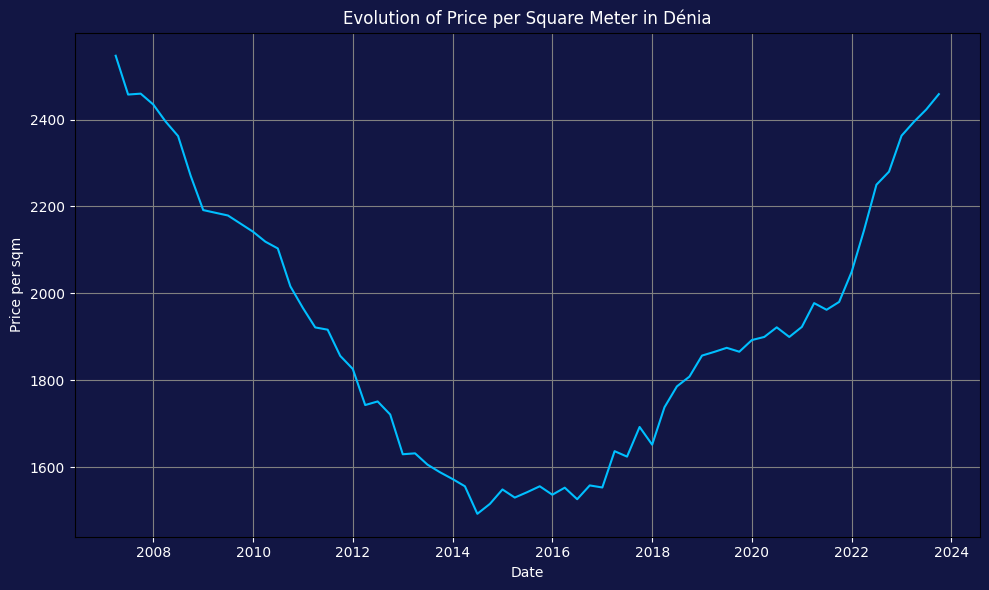

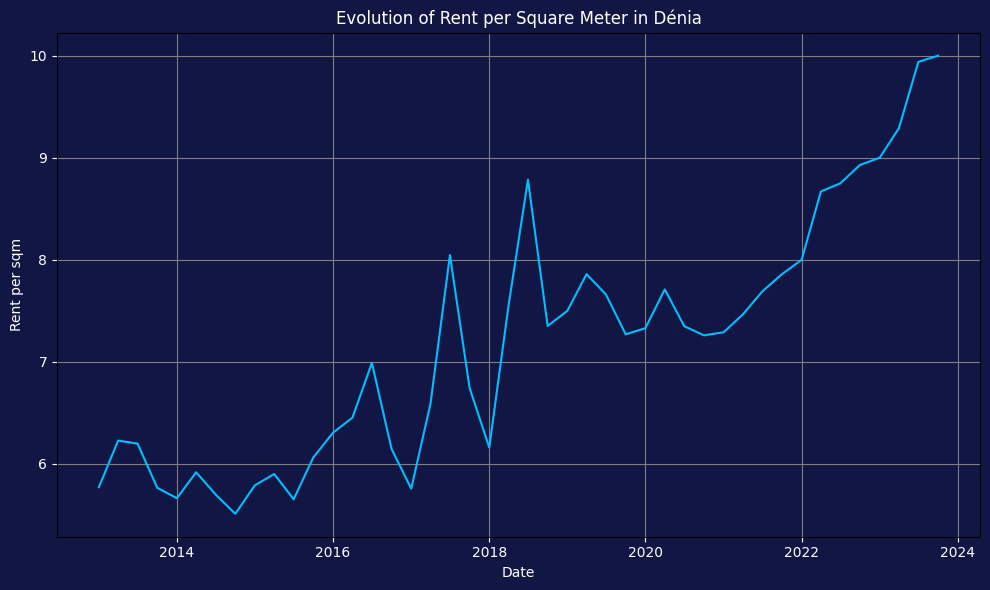

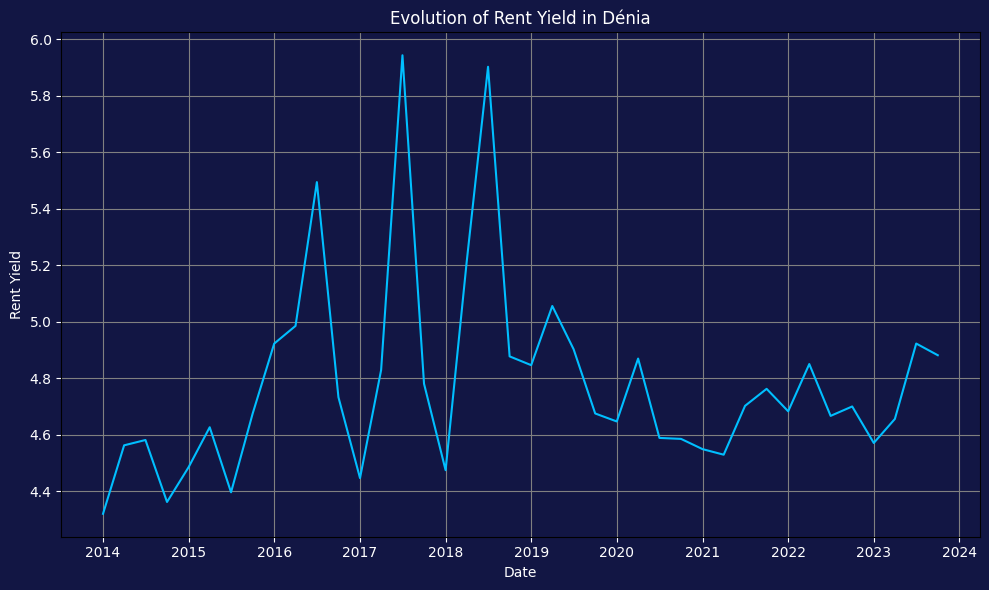

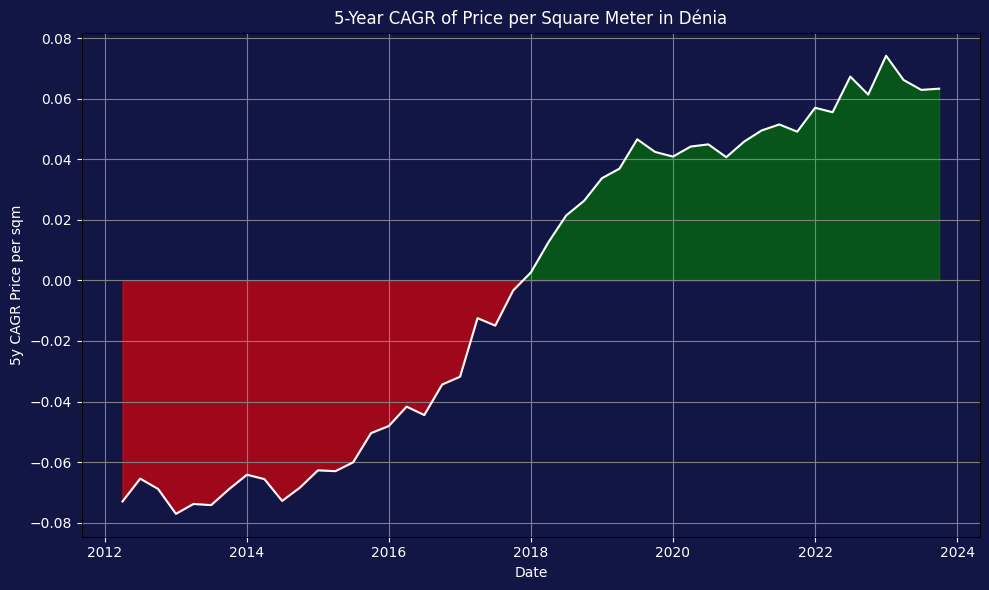

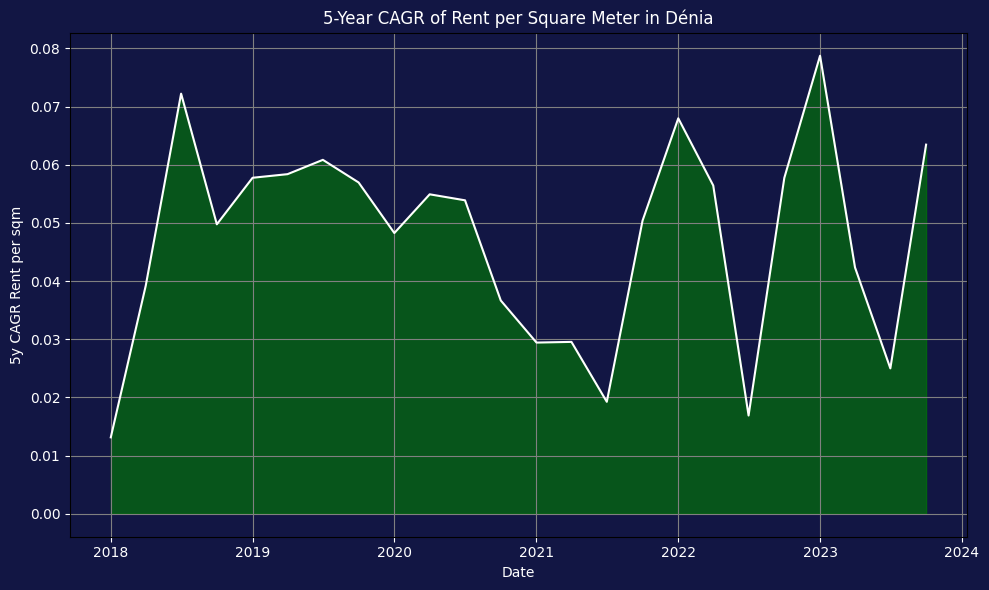

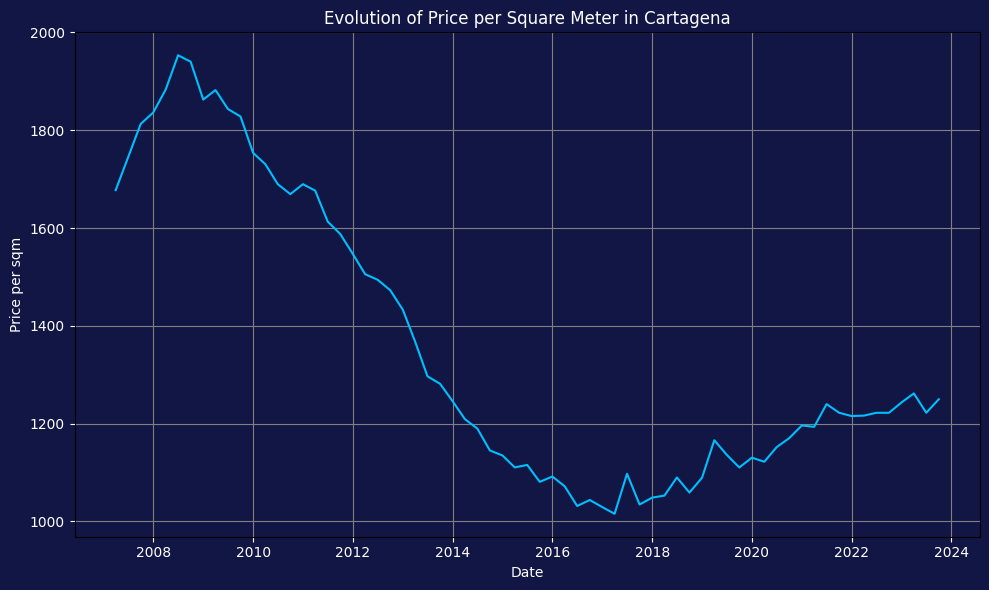

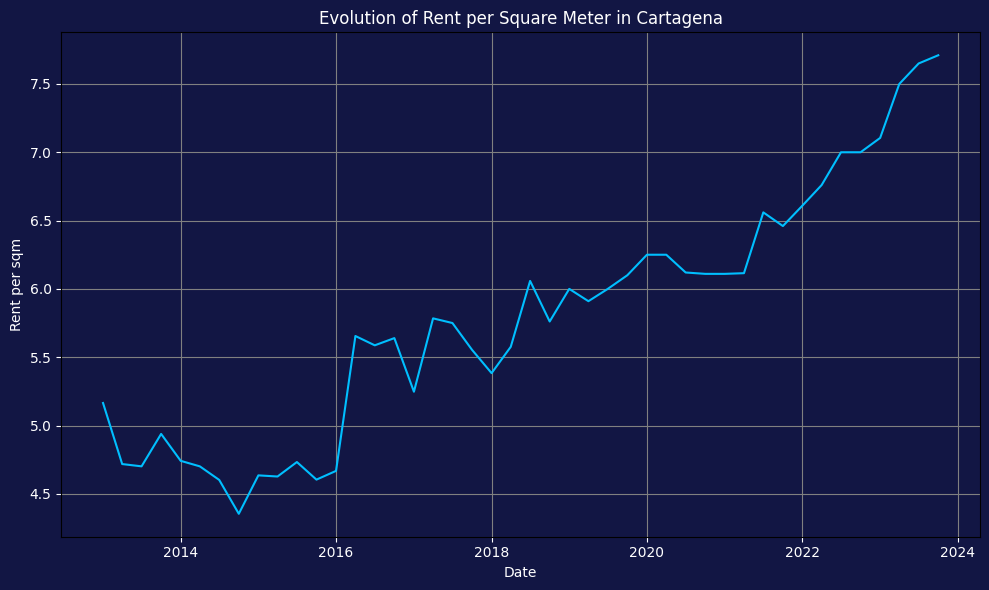

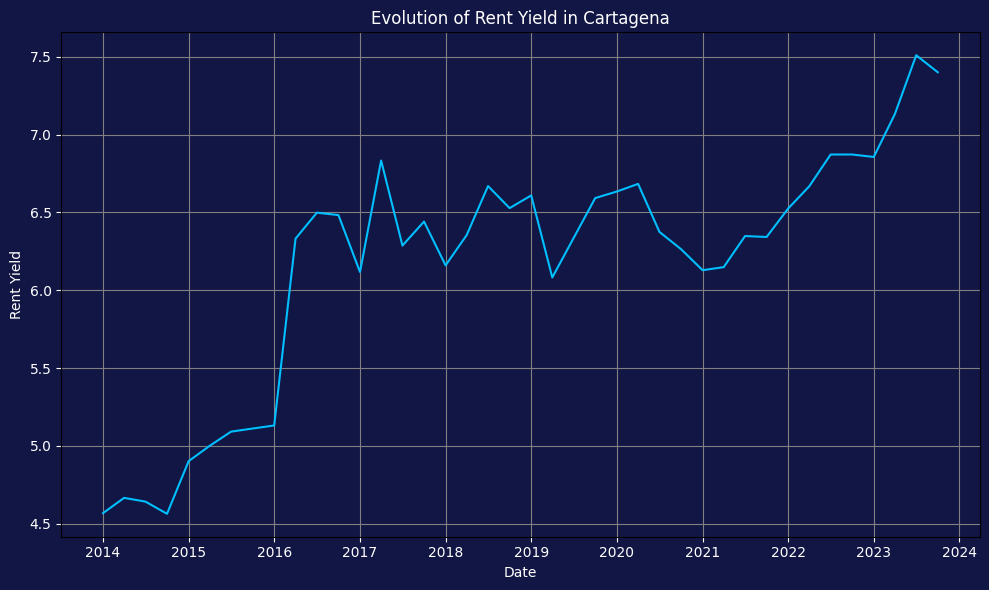

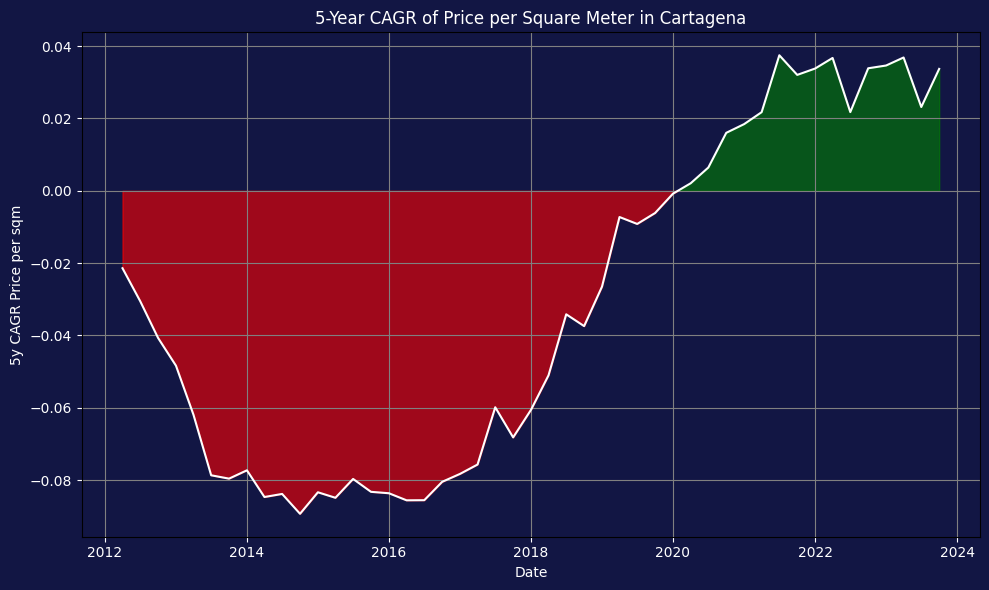

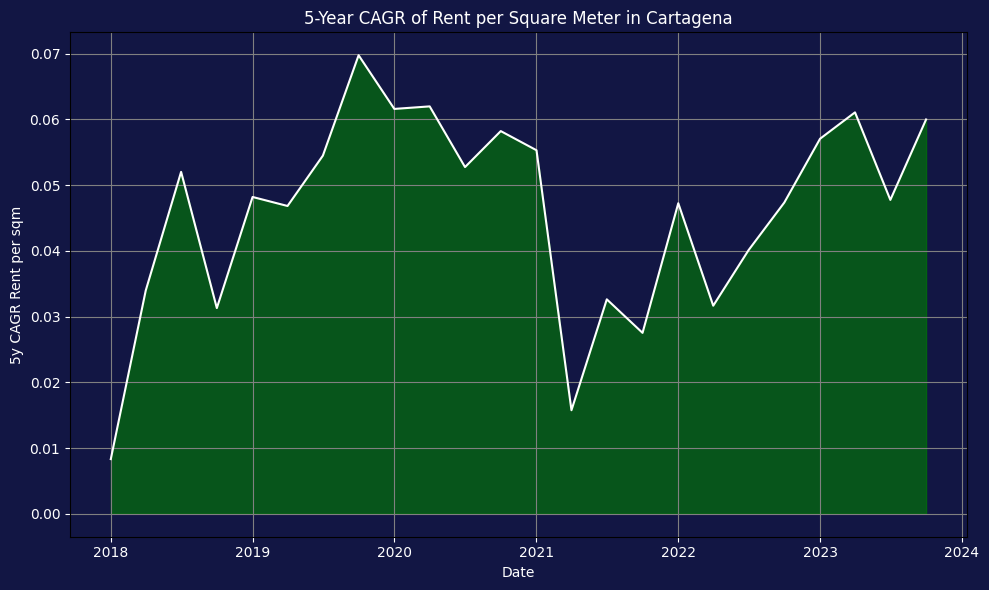

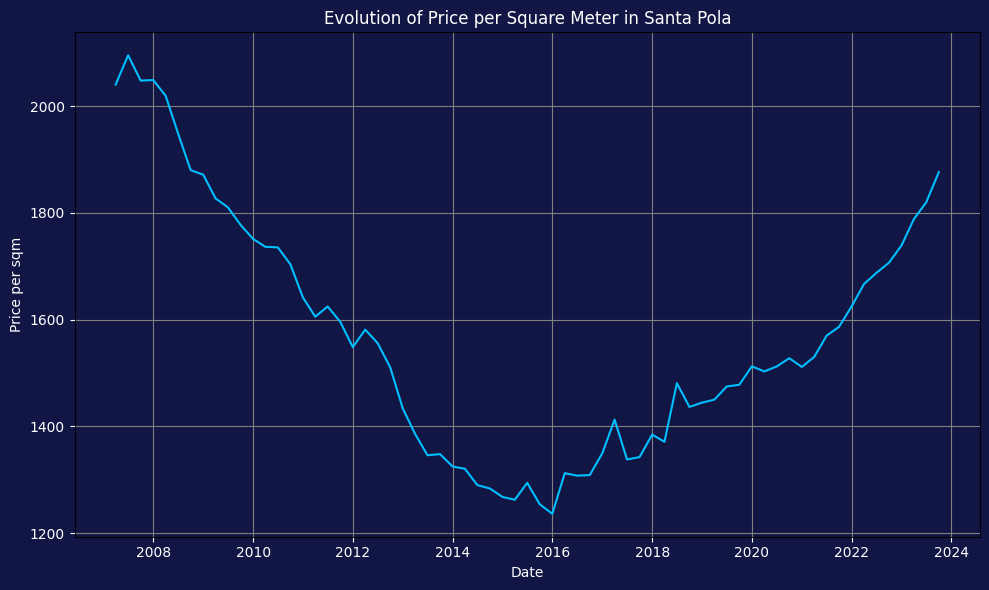

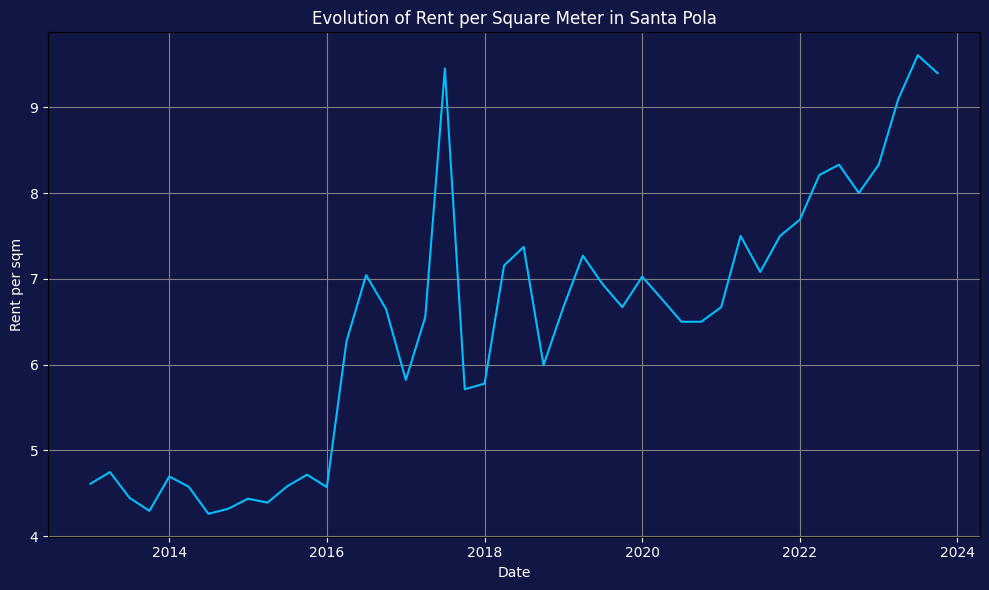

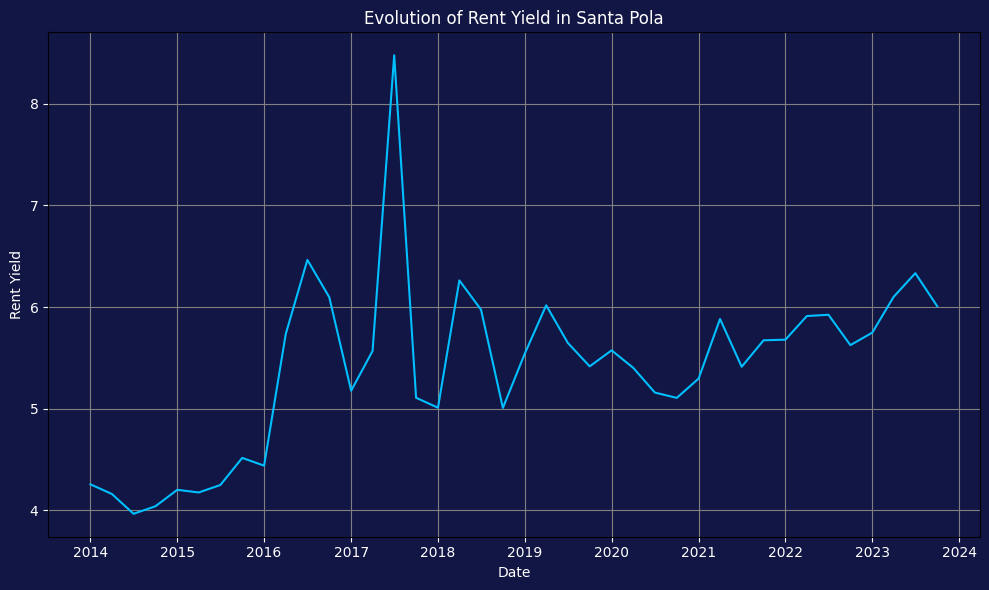

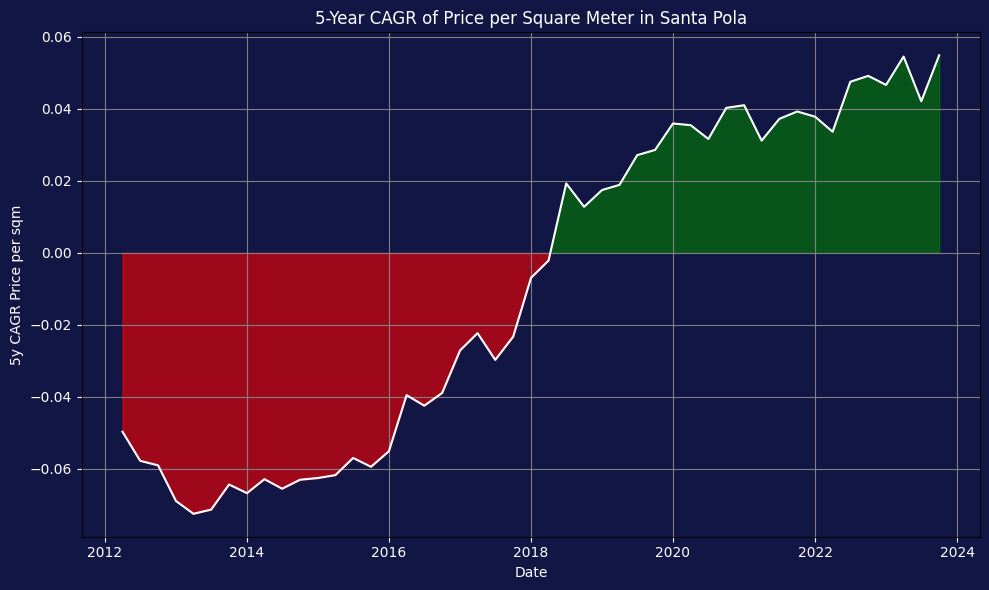

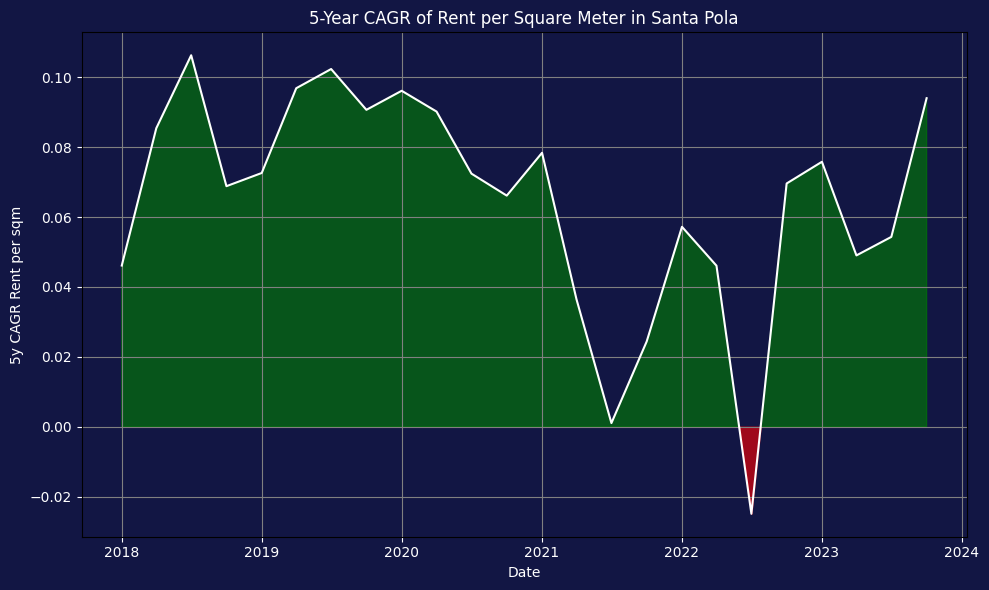

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create visualizations for each city
def create_visualizations(top_10_cities_values):
    for city in top_10_cities_values:
        # Filter data for the specific city (index level 3 is 'Town_name')
        filtered_df = top_provinces.loc[top_provinces.index.get_level_values(3) == city]

        # Plotting Price_per_sqm as a line chart
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(filtered_df.index.get_level_values(0), filtered_df['Price_per_sqm'], color='#00BFFF', label='Price per sqm')
        fig.patch.set_facecolor('#121644')
        ax.set_facecolor('#121644')
        ax.set_xlabel('Date', color='white')
        ax.set_ylabel('Price per sqm', color='white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(True, color='gray')
        ax.set_title(f'Evolution of Price per Square Meter in {city}', color='white')
        plt.tight_layout()
        plt.show()

        # Plotting Rent_per_sqm as a line chart
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(filtered_df.index.get_level_values(0), filtered_df['Rent_per_sqm'], color='#00BFFF', label='Rent per sqm')
        fig.patch.set_facecolor('#121644')
        ax.set_facecolor('#121644')
        ax.set_xlabel('Date', color='white')
        ax.set_ylabel('Rent per sqm', color='white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(True, color='gray')
        ax.set_title(f'Evolution of Rent per Square Meter in {city}', color='white')
        plt.tight_layout()
        plt.show()

        # Filter data to start from 2014
        yield_filtered_df = filtered_df[filtered_df.index.get_level_values(0) >= '2014']

        # Plotting Rent_Yield as a line chart starting from 2014
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(yield_filtered_df.index.get_level_values(0), yield_filtered_df['Rent_Yield'], color='#00BFFF', label='Rent Yield')
        fig.patch.set_facecolor('#121644')
        ax.set_facecolor('#121644')
        ax.set_xlabel('Date', color='white')
        ax.set_ylabel('Rent Yield', color='white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(True, color='gray')
        ax.set_title(f'Evolution of Rent Yield in {city}', color='white')
        plt.tight_layout()
        plt.show()

        # Plotting 5y_CAGR_price_sqm as an area chart (green for positive, red for negative)
        fig, ax = plt.subplots(figsize=(10, 6))
        cagr_price = filtered_df['5y_CAGR_price_sqm']
        dates = filtered_df.index.get_level_values(0)

        # Fill green for positive values
        ax.fill_between(dates, cagr_price, where=(cagr_price > 0), interpolate=True, color='green', alpha=0.6)
        # Fill red for negative values
        ax.fill_between(dates, cagr_price, where=(cagr_price < 0), interpolate=True, color='red', alpha=0.6)
        ax.plot(dates, cagr_price, color='white')

        fig.patch.set_facecolor('#121644')
        ax.set_facecolor('#121644')
        ax.set_xlabel('Date', color='white')
        ax.set_ylabel('5y CAGR Price per sqm', color='white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(True, color='gray')
        ax.set_title(f'5-Year CAGR of Price per Square Meter in {city}', color='white')
        plt.tight_layout()
        plt.show()

        # Plotting 5y_CAGR_rent_sqm as an area chart (green for positive, red for negative)
        fig, ax = plt.subplots(figsize=(10, 6))
        cagr_rent = filtered_df['5y_CAGR_rent_sqm']
        
        # Fill green for positive values
        ax.fill_between(dates, cagr_rent, where=(cagr_rent > 0), interpolate=True, color='green', alpha=0.6)
        # Fill red for negative values
        ax.fill_between(dates, cagr_rent, where=(cagr_rent < 0), interpolate=True, color='red', alpha=0.6)
        ax.plot(dates, cagr_rent, color='white')

        fig.patch.set_facecolor('#121644')
        ax.set_facecolor('#121644')
        ax.set_xlabel('Date', color='white')
        ax.set_ylabel('5y CAGR Rent per sqm', color='white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(True, color='gray')
        ax.set_title(f'5-Year CAGR of Rent per Square Meter in {city}', color='white')
        plt.tight_layout()
        plt.show()

# Call the function for the top 10 cities
create_visualizations(top_10_cities_values)


In [104]:
top_10_cities

Price_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                         
2023-10-01 Comunidad Valenciana     Valencia      Valencia               2231.370   
                                    Alicante      Alicante/Alacant       1903.400   
                                                  Torrevieja             1767.860   
           Región de Murcia         Murcia        Murcia                 1220.395   
           Comunidad Valenciana     Alicante      Elche/Elx              1273.580   
                                                  Benidorm               2439.990   
           Castilla y León          Valladolid    Valladolid             1540.725   
           Comunidad Valenciana     Alicante      Dénia                  2458.330   
           Región de Murcia         Murcia        Cartagena              1250.000   
           Comunidad Valenciana     Alicante      Santa Pola             1876.400   

                                                                    1y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                             
2023-10-01 Comunidad Valenciana     Valencia      Valencia                   0.095549   
                                    Alicante      Alicante/Alacant           0.080462   
                                                  Torrevieja                 0.077622   
           Región de Murcia         Murcia        Murcia                     0.035100   
           Comunidad Valenciana     Alicante      Elche/Elx                  0.025939   
                                                  Benidorm                   0.071995   
           Castilla y León          Valladolid    Valladolid                -0.022103   
           Comunidad Valenciana     Alicante      Dénia                      0.078215   
           Región de Murcia         Murcia        Cartagena                  0.022729   
           Comunidad Valenciana     Alicante      Santa Pola                 0.072882   

                                                                    5y_CAGR_price_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                             
2023-10-01 Comunidad Valenciana     Valencia      Valencia                   0.070275   
                                    Alicante      Alicante/Alacant           0.072779   
                                                  Torrevieja                 0.066701   
           Región de Murcia         Murcia        Murcia                     0.035666   
           Comunidad Valenciana     Alicante      Elche/Elx                  0.046078   
                                                  Benidorm                   0.045185   
           Castilla y León          Valladolid    Valladolid                 0.021737   
           Comunidad Valenciana     Alicante      Dénia                      0.063286   
           Región de Murcia         Murcia        Cartagena                  0.033708   
           Comunidad Valenciana     Alicante      Santa Pola                 0.054898   

                                                                    Rent_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                        
2023-10-01 Comunidad Valenciana     Valencia      Valencia                13.875   
                                    Alicante      Alicante/Alacant        11.060   
                                                  Torrevieja               9.880   
           Región de Murcia         Murcia        Murcia                   8.250   
           Comunidad Valenciana     Alicante      Elche/Elx                7.780   
                                                  Benidorm                13.510   
           Castilla y León          Valladolid    Valladolid               8.060   
           Comunidad Valenciana     Alicante      Dénia                   10.000   
           Región de Murcia         Murcia        Cartagena          

In [112]:
top = top_10_cities.sort_values(by='Rent_Yield', ascending=False)

print(top['Rent_Yield'])

Date        Autonomus_Community_Name  Province_Name  Town_name       
2023-10-01  Región de Murcia          Murcia         Murcia              8.112128
            Comunidad Valenciana      Valencia       Valencia            7.461784
            Región de Murcia          Murcia         Cartagena           7.401600
            Comunidad Valenciana      Alicante       Elche/Elx           7.330517
                                                     Alicante/Alacant    6.972786
                                                     Torrevieja          6.706413
                                                     Benidorm            6.644290
            Castilla y León           Valladolid     Valladolid          6.277564
            Comunidad Valenciana      Alicante       Santa Pola          6.008314
                                                     Dénia               4.881363
Name: Rent_Yield, dtype: float64


In [107]:
top = top_10_cities.sort_values(by=['Rent_Yield'], ascending=False)

In [113]:
# Debugging: Print data for each city in the bubble chart
for city in top_10_cities_values:
    filtered_df = top_provinces.loc[top_provinces.index.get_level_values(3) == city]
    
    # Check what data is being used for each city
    print(f"City: {city}")
    print(filtered_df[['Rent_Yield', 'Price_per_sqm', 'Rent_per_sqm', 'Housing_Transactions']].tail(1))


City: Valencia
                                                             Rent_Yield  \
Date       Autonomus_Community_Name Province_Name Town_name               
2023-10-01 Comunidad Valenciana     Valencia      Valencia     7.461784   

                                                             Price_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                  
2023-10-01 Comunidad Valenciana     Valencia      Valencia         2231.37   

                                                             Rent_per_sqm  \
Date       Autonomus_Community_Name Province_Name Town_name                 
2023-10-01 Comunidad Valenciana     Valencia      Valencia         13.875   

                                                             Housing_Transactions  
Date       Autonomus_Community_Name Province_Name Town_name                        
2023-10-01 Comunidad Valenciana     Valencia      Valencia                 3204.0  
City: Alicante/Alacant
                 

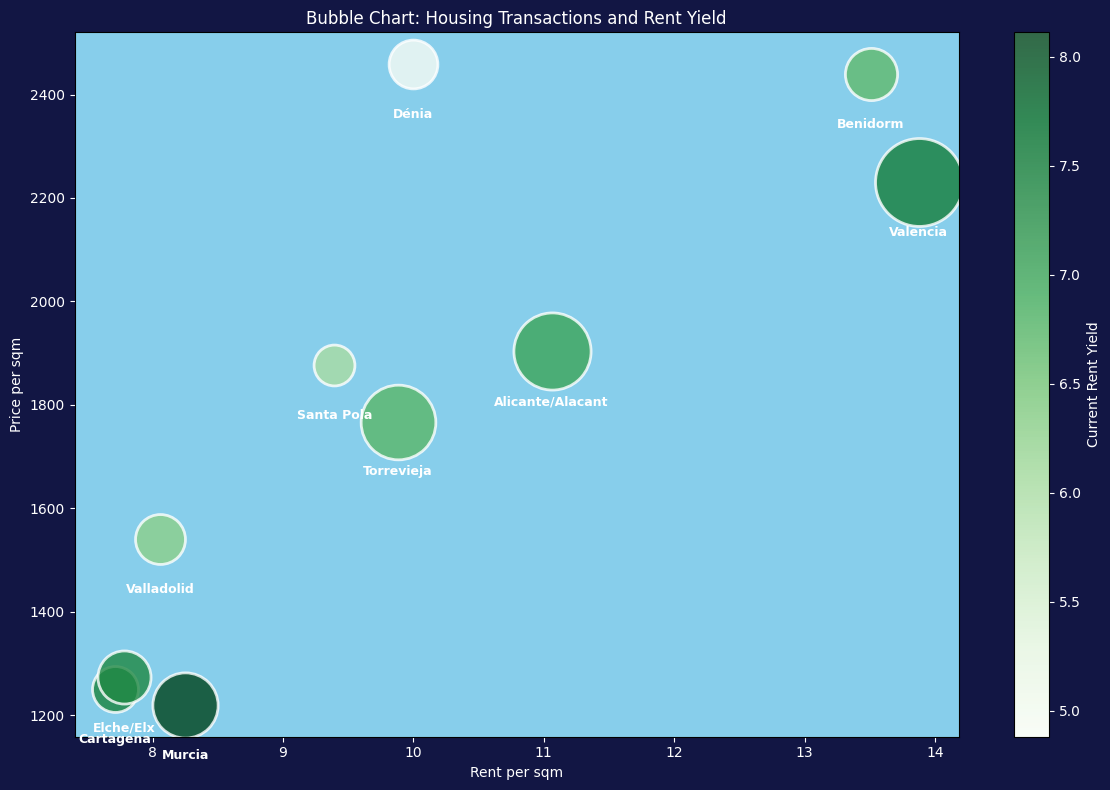

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure top_10_cities is sorted correctly by Rent Yield (as you did in the bar chart)
top = top_10_cities.sort_values(by='Rent_Yield', ascending=False)

# Function to create the Bubble Chart with Rent Yield
def create_bubble_chart_with_rent_yield():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set the vmin and vmax based on the min and max Rent Yield in the dataset
    vmin = top['Rent_Yield'].min()
    vmax = top['Rent_Yield'].max()

    # Iterate over the sorted cities based on Rent Yield
    for index, row in top.iterrows():
        # Extract necessary values for the bubble chart
        rent_per_sqm = row['Rent_per_sqm']
        price_per_sqm = row['Price_per_sqm']
        housing_transactions = row['Housing_Transactions']
        rent_yield = row['Rent_Yield']
        city_name = index[3]  # Extract city name from index level 3
        
        # Bubble chart where:
        # x-axis: Rent per sqm
        # y-axis: Price per sqm
        # Size of bubbles: Housing Transactions
        # Color of bubbles: Rent Yield
        scatter = ax.scatter(
            rent_per_sqm,
            price_per_sqm,
            s=housing_transactions * 1.25,  # Scale down the bubble size
            c=rent_yield,  # Use Rent Yield for color
            cmap='Greens',  # Green for high yield
            alpha=0.8,
            edgecolors='w',
            linewidth=2,
            vmin=vmin,  # Set min value for the color scale
            vmax=vmax   # Set max value for the color scale
        )

        # Adding city names below the respective bubbles
        ax.text(rent_per_sqm, 
                price_per_sqm - 85,  # Offset by 50 units below the bubble
                city_name, 
                color='white', 
                ha='center', 
                va='top', 
                fontsize=9, 
                weight='bold')

    # Add colorbar to represent the Rent Yield
    cbar = plt.colorbar(scatter)
    cbar.set_label('Current Rent Yield', color='white')  # Change the label color to white
    cbar.ax.yaxis.set_tick_params(color='white')  # Change tick colors to white
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')  # Change tick labels to white

    # Add labels and title
    ax.set_xlabel('Rent per sqm', color='white')
    ax.set_ylabel('Price per sqm', color='white')
    ax.set_title('Bubble Chart: Housing Transactions and Rent Yield', color='white')

    # Set background color and customize ticks and grid
    fig.patch.set_facecolor('#121644')
    ax.set_facecolor('skyblue')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    #ax.grid(True, color='skyblue')

    plt.tight_layout()
    plt.show()

# Call the function to create the bubble chart
create_bubble_chart_with_rent_yield()



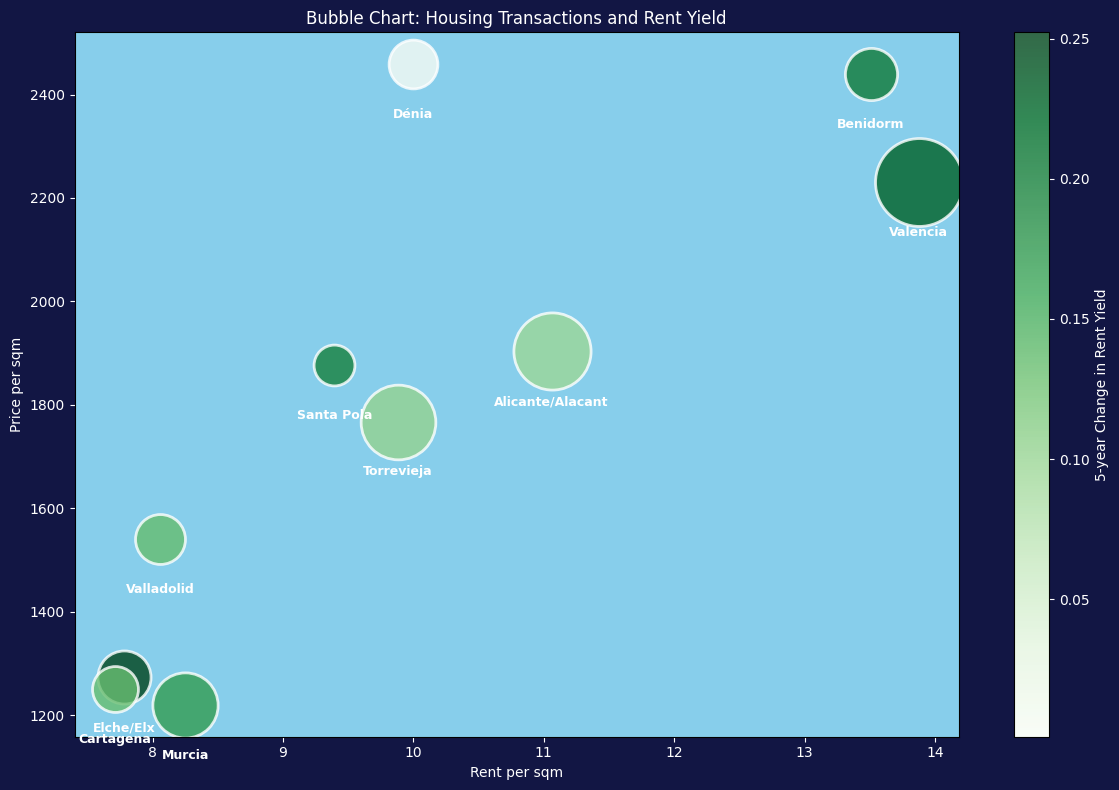

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure top_10_cities is sorted correctly by Rent Yield (as you did in the bar chart)
top = top_10_cities.sort_values(by='5y_Change_Rent_Yield', ascending=False)

# Function to create the Bubble Chart with Rent Yield
def create_bubble_chart_with_rent_yield():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set the vmin and vmax based on the min and max Rent Yield in the dataset
    vmin = top['5y_Change_Rent_Yield'].min()
    vmax = top['5y_Change_Rent_Yield'].max()

    # Iterate over the sorted cities based on Rent Yield
    for index, row in top.iterrows():
        # Extract necessary values for the bubble chart
        rent_per_sqm = row['Rent_per_sqm']
        price_per_sqm = row['Price_per_sqm']
        housing_transactions = row['Housing_Transactions']
        rent_yield = row['5y_Change_Rent_Yield']
        city_name = index[3]  # Extract city name from index level 3
        
        # Bubble chart where:
        # x-axis: Rent per sqm
        # y-axis: Price per sqm
        # Size of bubbles: Housing Transactions
        # Color of bubbles: Rent Yield
        scatter = ax.scatter(
            rent_per_sqm,
            price_per_sqm,
            s=housing_transactions * 1.25,  # Scale down the bubble size
            c=rent_yield,  # Use Rent Yield for color
            cmap='Greens',  # Green for high yield
            alpha=0.8,
            edgecolors='w',
            linewidth=2,
            vmin=vmin,  # Set min value for the color scale
            vmax=vmax   # Set max value for the color scale
        )

        # Adding city names below the respective bubbles
        ax.text(rent_per_sqm, 
                price_per_sqm - 85,  # Offset by 50 units below the bubble
                city_name, 
                color='white', 
                ha='center', 
                va='top', 
                fontsize=9, 
                weight='bold')

    # Add colorbar to represent the Rent Yield
    cbar = plt.colorbar(scatter)
    cbar.set_label('5-year Change in Rent Yield', color='white')  # Change the label color to white
    cbar.ax.yaxis.set_tick_params(color='white')  # Change tick colors to white
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')  # Change tick labels to white

    # Add labels and title
    ax.set_xlabel('Rent per sqm', color='white')
    ax.set_ylabel('Price per sqm', color='white')
    ax.set_title('Bubble Chart: Housing Transactions and Rent Yield', color='white')

    # Set background color and customize ticks and grid
    fig.patch.set_facecolor('#121644')
    ax.set_facecolor('skyblue')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    #ax.grid(True, color='skyblue')

    plt.tight_layout()
    plt.show()

# Call the function to create the bubble chart
create_bubble_chart_with_rent_yield()


In [ ]:
top_regions.to_excel('1.Top_10_regions.xlsx')

top_provinces.to_excel('1.Top_10_provinces.xlsx')